# Teil 2 - Explorative Analyse

# 1. Vorstellung der Daten - deskriptiver Teil

Die vorliegenden Datensätze sind Spotify-Songs, 
Datensatz 1 sind die 10 000 erfolgreichsten Songs von Spotify, ausgewählt anhand der Billboard Charts und der australischen ARIA Charts, um eine gewisse gesellschaftliche Relevanz zu repräsentieren. 
(Quelle: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now)

Datensatz 2 beinhaltete ursprünglich fast eine Millionen Songs inklusive der Spotify-Daten und der Songtexte - durch die Größe dieses Datensatzes ergibt sich eine repräsentative Auswahl an Musik, die ich der Hit-Auswahl entgegenstellen kann. Im ersten Teil konnte ich schon viele Duplikate entfernen, weswegen es noch etwas mehr als 700.000 Songs sind. Diese Songs wurden anhand verschiedener Kaggle-Datensätze zusammengestellt. 
(Quelle: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics)

Datensatz 3 habe ich im ersten Teil dieser Analyse erstellt, indem der erste und zweite Datensatz miteinander vereint wurden und die Lyrics-Spalte der gemeinsamen Songs an den Datensatz der 10.000 Hits angehängt haben. Dabei herausgekommen sind 5315 Songs mit Songtexten, die in beiden Datensätzen identifizierbar waren. Diese werden im dritten Teil, der Textanalyse, weiter behandelt.

Erstmal schaue ich mir die Daten im Allgemeinen an. Neben den essentiellen Daten, wie Songtitel und Künstlername beinhalten die Datensätze noch die Attribute, die Spotify mitliefert, ich nenne sie hier die "Spotify-Attribute", nach denen die Songs bewertet und kategorisiert wurden. Teilweise sind das schon verarbeitete Werte wie "Danceability" oder "Speechiness", die mehrere Faktoren zusammenfassen. Ein Song ist zum Beispiel tanzbar, wenn er einen stabilen Rhythmus hat, das Tempo eher schneller ist und der Rhythmus einheitlich und gut hörbar ist. Das findet sich im Wert "Danceability" wieder. "Speechiness" gibt zum Beispiel an, ob und wie viel Sprache in einem Stück vorkommt, wobei Werte unter 0.33 eher ohne Sprache und Werte über 0.66 eher nur Sprache, kaum bis keine Musik, beschreiben. 
Es gibt aber auch direkter messbare Werte wie Länge (in Millisekunden) und Tempo des Songs, Tonart ("key"), sowie Metadaten wie Release-Termin und Track Nummer auf dem Album.

In Datensatz 2 haben wir ähnliche Daten, weniger Metadaten, dafür aber noch die Songtexte. 

Schauen wir uns die Daten an:

In [1]:
import pandas as pd

df1 = pd.read_parquet('df1_save.parquet')
df2 = pd.read_parquet('df2_save.parquet')

print("Erfolgreich geladen: df1, df2, df3")

Erfolgreich geladen: df1, df2, df3


In [2]:
df2 = df2.rename(columns={
    'name': 'Track Name', 
    'album_name': 'Album Name',
    'artists': 'Artist Name(s)',
    'danceability': 'Danceability',
    'energy': 'Energy',
    'key': 'Key', 
    'loudness': 'Loudness', 
    'mode': 'Mode',
    'speechiness': 'Speechiness',
    'acousticness': 'Acousticness',
    'instrumentalness': 'Instrumentalness',
    'liveness': 'Liveness',
    'valence': 'Valence',
    'tempo': 'Tempo',
    'duration_ms': 'Track Duration (ms)'})

# Überblick über die Datensätze

##  DF1 Überblick - 8902 Einträge

| Index | Spaltenname                     | Beschreibung                                                                | Datentyp   | Anzahl der Einträge |
|-------|---------------------------------|-----------------------------------------------------------------------------|------------|---------------------|
| 00    | Track URI                       | Die Track ID bei Spotify                                                    | object     | 8902                |
| 01    | Track Name                      | Der Songtitel                                                               | object     | 8902                |
| 02    | Artist URI(s)                   | Die Artist-ID von Spotify                                                   | object     | 8902                |
| 03    | Artist Name(s)                  | Die Namen der Künstler                                                      | object     | 8902                |
| 04    | Album URI                       | Die Album-ID von Spotify                                                    | object     | 8902                |
| 05    | Album Name                      | Der Name des Albums                                                         | object     | 8902                |
| 06    | Album Artist URI(s)             | Die Album Artist ID bei Spotify                                             | object     | 8902                |
| 07    | Album Artist Name(s)            | Der Name des Album-Künstlers                                                | object     | 8902                |
| 08    | Album Release Date              | Das Veröffentlichungsdatum des Albums                                       | object     | 8902                |
| 09    | Album Image URL                 | Die URL zum Albumcover                                                      | object     | 8902                |
| 10    | Disc Number                     | Anzahl der Discs des Albums                                                 | object     | 8902                |
| 11    | Track Number                    | Die Nummer des Songs auf dem Album                                          | int64      | 8902                |
| 12    | Track Duration (ms)             | Die Dauer des Titels in Millisekunden                                       | int64      | 8902                |
| 13    | Track Preview URL               | Die URL zum reinhören in den Titel                                          | object     | 8844                |
| 14    | Explicit                        | Beinhaltet der Text explizite Ausdrücke?                                    | bool       | 8902                |
| 15    | Popularity                      | Der Popularity-Grad, wie erfolgreich ist der Song von 1-100                 | int64      | 8902                |
| 16    | ISRC                            | Die ISRC-Bestellnummer des Albums                                           | object     | 8902                |
| 17    | Added By                        | Wer hat diesen Titel dieser Liste hinzugefügt?                              | object     | 8902                |
| 18    | Added At                        | Wann wurde dieser Titel dieser Liste hinzugefügt?                           | object     | 8902                |
| 19    | Artist Genres                   | Genreauflistung, die passend zum Künstler sind                              | object     | 8363                |
| 20    | Danceability                    | Wie tanzbar ist der Song? Bewertet nach Tempo, Rhythmus-Stabilität Rhythmusstärke, Wert zwischen 0 und 1                             | float64    | 9993                |
| 21    | Energy                          | Wie viel Energie hat der Song, Laustärke, Intensität und Aktivität. Zwischen 0 und 1   | float64    | 9993                |
| 22    | Key                             | Tonart als Ganzzahl zwischen 0 und 11                                       | float64    | 8902                |
| 23    | Loudness                        | Durchschnittlicher Wert der Lautheit eines Songs                            | float64    | 8902                |
| 24    | Mode                            | Gibt an, ob ein Song eher Dur oder Moll ist                                 | float64    | 8902                |
| 25    | Speechiness                     | Gibt an, wie hoch der Anteil an gesprochenem Wort in einem Stück ist        | float64    | 8902                |
| 26    | Acousticness                    | Ein Vertrauensmaß, wie akustisch (oder elektronisch) ist der Song           | float64    | 8902                |
| 27    | Instrumentalness                | Ein Wahrscheinlichkeitswert dafür, dass der Song instrumental ist           | float64    | 8902                |
| 28    | Liveness                        | Wie wahrscheinlich ist dieser Song live aufgenommen wurden?                 | float64    | 8902                |
| 29    | Valence                         | Wie positiv ist ein Song                                                    | float64    | 8902                |
| 30    | Tempo                           | Geschätztes Tempo des Songs in bpm                                          | float64    | 8902                |
| 31    | Time Signature                  | Die Taktart eines Songs                                                     | float64    | 8902                |
| 32    | Label                           | Das Plattenlabel, das die Veröffentlichung herausgebracht hat               | object     | 8900                |
| 33    | Label                           | Das Plattenlabel, das sie Veröffentlichung herausgebracht hat               | object     | 9990                |
| 33    | Copyrights                      | Der Copyright-Status des Songs                                              | object     | 8902                |
| 34    | Release Year                    | Das Jahr der Veröffentlichung                                               | int64      | 9993                |
| 35    | Release Month                   | Der Monat der Veröffentlichung (wenn nicht vorhanden: n/a)                  | int64      | 7721                |
| 36    | Release Day                     | Der Tag der Veröffentlichung (wenn nicht vorhanden: n/a)                    | int64      | 7762                |
| 37    | artists_normalized              | Normalisierte Namen der Künstler                                            | object     | 8902                |
| 38    | name_normalized                 | Normalisierte Songtitel                                                     | object     | 8902                |

In [3]:
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             8892 non-null   object 
 1   Track Name            8892 non-null   object 
 2   Artist URI(s)         8892 non-null   object 
 3   Artist Name(s)        8892 non-null   object 
 4   Album URI             8892 non-null   object 
 5   Album Name            8892 non-null   object 
 6   Album Artist URI(s)   8892 non-null   object 
 7   Album Artist Name(s)  8892 non-null   object 
 8   Album Release Date    8892 non-null   object 
 9   Album Image URL       8892 non-null   object 
 10  Disc Number           8892 non-null   int64  
 11  Track Number          8892 non-null   int64  
 12  Track Duration (ms)   8892 non-null   int64  
 13  Track Preview URL     8835 non-null   object 
 14  Explicit              8892 non-null   bool   
 15  Popularity           

##  DF2 Überblick - 728975 Einträge

| Index | Spaltenname                     | Beschreibung                                                                | Datentyp   | Anzahl der Einträge |
|-------|---------------------------------|-----------------------------------------------------------------------------|------------|---------------------|
| 00    | id                              | Die Track ID bei Spotify                                                    | object     | 728975              |
| 01    | name                            | Der Songtitel                                                               | object     | 728968              |
| 02    | album_name                      | Der Name des Albums                                                         | object     | 284544              |
| 03    | artists                         | Die Namen der Künstler                                                      | object     | 728975              |
| 04    | Danceability                    | Wie tanzbar ist der Song? Wert zwischen 0 und 1                             | float64    | 728975              |
| 05    | Energy                          | Wie viel Energie hat der Song, Intensität und Aktivität. Zwischen 0 und 1   | float64    | 728975              |
| 06    | Key                             | Tonart als Ganzzahl zwischen 0 und 11                                       | object     | 728975              |
| 07    | Loudness                        | Durchschnittlicher Wert der Lautheit eines Songs                            | float64    | 728975              |
| 08    | Mode                            | Gibt an, ob ein Song eher Dur oder Moll ist                                 | object     | 728975              |
| 09    | Speechiness                     | Gibt an, wie hoch der Anteil an gesprochenem Wort in einem Stück ist        | float64    | 728975              |
| 10    | Acousticness                    | Ein Vertrauensmaß, wie akustisch (oder elektronisch) ist der Song           | float64    | 728975              |
| 11    | Instrumentalness                | Ein Wahrscheinlichkeitswert dafür, dass der Song instrumental ist           | float64    | 728975              |
| 12    | Liveness                        | Wie wahrscheinlich ist dieser Song live aufgenommen wurden?                 | float64    | 728975              |
| 13    | Valence                         | Wie positiv ist ein Song                                                    | float64    | 728975              |
| 14    | Tempo                           | Geschätztes Tempo des Songs in bpm                                          | float64    | 728975              |
| 15    | duration_ms                     | Die Dauer des Titels in Millisekunden                                       | float64    | 728975              |  
| 16    | lyrics                          | Die Songtexte                                                               | object     | 728962              |
| 17    | artists_normalized              | Die normalisierten Künstlernamen                                            | object     | 728975              |
| 18    | name_normalized                 | Die normalisierten Songtitel                                                | object     | 728968              |
| 19    | lyrics_normalized               | Die normalisierten Songtexte                                                | object     | 728962              |

In [4]:
print(df2.info())
print("\n")
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725068 entries, 0 to 725067
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   725068 non-null  object 
 1   Track Name           725061 non-null  object 
 2   Album Name           283475 non-null  object 
 3   Artist Name(s)       725068 non-null  object 
 4   Danceability         725068 non-null  float64
 5   Energy               725068 non-null  float64
 6   Key                  725068 non-null  Int8   
 7   Loudness             725068 non-null  float64
 8   Mode                 725068 non-null  Int8   
 9   Speechiness          725068 non-null  float64
 10  Acousticness         725068 non-null  float64
 11  Instrumentalness     725068 non-null  float64
 12  Liveness             725068 non-null  float64
 13  Valence              725068 non-null  float64
 14  Tempo                725068 non-null  float64
 15  Track Duration (m

# DF1 Analyse

## 1. Betrachtung der univariaten Verteilungen

Sehen wir uns den Datensatz an. Es geht hier um die 10000 erfolgreichsten Songs bei Spotify, Stand Ende 2024. Von ihnen sind nach Duplikatentfernung noch 8902 übrig geblieben. 

Erstmal ein Überblick: 

In [5]:
df1.describe()

Disc Number  Track Number  Track Duration (ms)   Popularity  \
count  8892.000000   8892.000000         8.892000e+03  8892.000000   
mean      1.034975      4.984256         2.234835e+05    32.157782   
std       0.323093      5.555760         5.491778e+04    27.042616   
min       1.000000      1.000000         6.009300e+04     0.000000   
25%       1.000000      1.000000         1.906960e+05     0.000000   
50%       1.000000      3.000000         2.183590e+05    33.500000   
75%       1.000000      7.000000         2.494832e+05    56.000000   
max      15.000000     93.000000         1.561133e+06    94.000000   

       Danceability       Energy          Key     Loudness         Mode  \
count   8892.000000  8892.000000  8892.000000  8892.000000  8892.000000   
mean       0.605957     0.681209     5.183761    -7.339142     0.698605   
std        0.145956     0.193785     3.576717     3.323187     0.458889   
min        0.000000     0.000020     0.000000   -29.368000     0.000000   
25%        0.513000     0.554000     2.000000    -9.184500     0.000000   
50%        0.615000     0.710000     5.000000    -6.577000     1.000000   
75%        0.708000     0.836000     8.000000    -4.919000     1.000000   
max        0.988000     0.997000    11.000000     2.769000     1.000000   

       Speechiness  Acousticness  Instrumentalness     Liveness      Valence  \
count  8892.000000   8892.000000       8892.000000  8892.000000  8892.000000   
mean      0.064433      0.213593          0.030914     0.185976     0.586963   
std       0.060240      0.253028          0.127884     0.149422     0.239363   
min       0.000000      0.000003          0.000000     0.012000     0.000000   
25%       0.033000      0.018300          0.000000     0.089100     0.399000   
50%       0.042700      0.098500          0.000006     0.128000     0.599000   
75%       0.066600      0.332000          0.000650     0.246000     0.785000   
max       0.711000      0.991000          0.985000     0.989000     0.995000   

             Tempo  Time Signature  Release Year  Release Month  Release Day  
count  8892.000000     8892.000000   8892.000000    7713.000000  7754.000000  
mean    121.547076        3.958952   2001.671502       5.695449    12.226722  
std      26.371123        0.247361     15.475602       3.782151     9.811781  
min       0.000000        0.000000   1955.000000       1.000000     1.000000  
25%     102.729500        4.000000   1993.000000       2.000000     1.000000  
50%     120.795500        4.000000   2006.000000       6.000000    11.000000  
75%     134.519750        4.000000   2014.000000       9.000000    21.000000  
max     217.913000        5.000000   2024.000000      12.000000    31.000000

### Ansicht der Daten
- Disc Number: Die meisten (über 75%) Veröffentlichungen bestehen nur aus einer CD. 
- Track Number: Die Songs sind auf dem Album sehr unterschiedlich verteilt, aber der Durchschnitt ist etwa bei Track 5 - das schaue ich später noch mal näher an
- Track Duration: Die durchschnittliche Tracklänge ist 223.500ms, das sind ca 3 Minuten und 44 Sekunden, wobei die Ausreißer sehr groß sind. Auch das schaue ich mir noch mal an.
- Popularity: Die Popularity basiert auf den Abspielzahlen der Songs, gekoppelt an die Aktualität. Dieser Wert verändert sich regelmäßig und ist eher eine Momentaufnahme. Man sollte aber davon ausgehen, dass die 10.000 Top Hits auf Spotify auch alle eine überdurchschnittliche Popularity haben, das werde ich später zwischen den Datensätzen vergleichen. Es sieht aber erstmal aus, als ob die Popularity eher im unteren Bereich verteilt ist.
- Danceability: Der größte Teil der Songs aus der Auswahl ist tanzbar, das untere Quartil liegt schon bei 0.513. Ruhige Songs wie Balladen sind bei den Hits also weniger stark vertreten.
- Energy: Wenn ein Song tanzbar ist, hat er auch mehr wahrgenommene Energie, hier also nicht verwunderlich, dass das untere Quartil auch hier schon bei 0.554 liegt.
- Key: Die Tonarten sind nicht sinnvoll mit einem Durchschnittswert zu erfassen, da sie nicht linear aufeinander aufbauen. Hier ist eine genauere Betrachtung angebracht
- Loudness: Modernere Songs sind lauter aufgenommen und gemischt, was aufgrund digitaler Aufnahmen und digitaler Wiedergabemedien (CD, MP3) erst seit den 1980er Jahren möglich ist. Viele Jahre versuchten sich Produzenten gegenseitig in der empfundenen Lautstärke der Songs zu übertreffen, in den letzten 10-15 Jahren hat dieser Trend wieder etwas nachgelassen. Es wäre also interessant, sich diese Entwicklung mal im Bezug zum Release-Jahr anzuschauen. Was hier weiterhin auffällt: Den Maximalwert von 2.769 sollte es eigentlich nicht geben, da sich die Werte von etwa -60 (was ungefähr Stille bei einer CD entspricht) bis 0 bewegen sollten.
- Mode: Die Dur (1) - Moll (0) - Verteilung der Songs. Erwartbar gibt es mehr Songs in Dur, da Dur meist häufiger in Songs vorkommt. In unserer europäischen musikalischen Prägung wird Dur als positiver wahrgenommen. Das schaue ich mir später noch mal an, auch in Bezug auf die Verteilung der Tonarten.
- Speechiness: Die meisten Songs haben einen sehr geringen Speechiness-Wert. Das sagt in erster Linie aus, dass der Anteil von gesprochenem Wort eher niedrig ist.
- Acousticness: Nicht ganz so niedrig wie Speechiness - das obere Quartil hat einen Durchschittswert von 0.331, die meisten Songs werden also nicht als akustische Songs, also Song mit "natürlichen Instrumenten" erkannt.
- Instrumentalness: Die allerwenigsten Songs sind instrumental, in fast allen wird gesungen.
- Liveness: Auch hier erwartbar niedrige Werte - die meisten bekannten Songs sind eher Studioproduktionen und keine Liveaufnahmen. Hier kommt weiterhin eine zeitlichze Komponente hinzu, viele bekannte Live-Songs sind bei Spotify inzwischen von Remastern der Original-Songs abgelöst worden.
- Valence: Die durchschnittliche Stimmung ist eher positiv. Obwohl die Werteverteilung voll ausgeschöpft ist (von 0.0 bis 0.995), befindet sich das untere Quartil schon im Bereich von 0.39. Es gibt also relativ wenige Songs mit wirklich negativer Stimmung unter der Auswahl.
- Tempo: Das Durchchnittstempo liegt bei 121.55, was insoweit nicht weiter verwunderlich ist, da Tempi zwischen 120 und 140 von vielen Menschen als besonders tanzbar empfunden werden. Das hängt wahrscheinlich mit der Wechselwirkung zwischen Musik und Herzschlag zusammen. Da wir ja schon gesehen haben, dass die meisten Songs in dieser Auswahl eher als tanzbar bewertet werden, passt die Tempoverteilung dazu.
- Time Signature: Auch hier wenig überraschend sind die allermeisten meisten Songs in einem 4/4 Takt. Das ist die am stärksten verbreitete Taktart in unserer Musikkultur. Einen nicht zu vernachlässigenden Anteil an 3/4-Takt-Stücken gibt es auch.
- Release Year: Es sind Songs von 1955 bis 2024 vertreten, die meisten aber in den 2000ern veröffentlicht. Das liegt wahrscheinlich an der Songauswahl, kann aber teilweise auch auf Angaben bei Spotify zurückgehen, wenn zum Beispiel das Remaster eines alten Songs ein neues Releasedatum bei Spotify erhält. Diese Werte schauen wir uns später noch genauer an.
- Release Month: Da hier etwa 13% der Werte fehlen, ist diese Spalte natürlich nicht ganz so aussagekräftig. Dass das untere Quartil bei 2.0 ist, könnte darauf hindeuten, dass viele Release-Dates einfach als "Year-01-01" eingetragen wurden. Behält man das im Hinterkopf, scheinen die Releases sich über das ganze Jahr relativ gleichmäßig zu verteilen.
- Release Day: Auch hier gibt es eine leichte Verschiebung zum ersten Tag des Monats, wenn man die mit einbezieht, scheinen die Releases sich relativ gleichmäßig über den ganzen Monat zu verteilen.

## Häufige Künstler
Hier eine Liste der 50 meistgehörten Künstler

In [6]:
artist_count = df1['Artist Name(s)'].value_counts().head(50)
for idx, (artist, count) in enumerate (artist_count.items(), start=1):
    print(f"{idx} - {artist}: {count}")

1 - Elvis Presley: 41
2 - The Beatles: 38
3 - P!nk: 37
4 - Taylor Swift: 37
5 - Ed Sheeran: 34
6 - Madonna: 34
7 - The Rolling Stones: 32
8 - Kylie Minogue: 28
9 - Elton John: 27
10 - Bee Gees: 26
11 - U2: 25
12 - Katy Perry: 24
13 - Britney Spears: 23
14 - Maroon 5: 22
15 - Adele: 21
16 - Michael Jackson: 21
17 - Guy Sebastian: 21
18 - Rihanna: 20
19 - Jessica Mauboy: 20
20 - Coldplay: 20
21 - Cold Chisel: 20
22 - Jason Derulo: 19
23 - Roy Orbison: 19
24 - John Farnham: 18
25 - Black Eyed Peas: 18
26 - Kelly Clarkson: 18
27 - Queen: 18
28 - Red Hot Chili Peppers: 18
29 - Backstreet Boys: 18
30 - INXS: 18
31 - Powderfinger: 17
32 - Phil Collins: 17
33 - Eminem: 17
34 - Justin Bieber: 17
35 - Lady Gaga: 16
36 - Green Day: 16
37 - Bruno Mars: 16
38 - The Offspring: 16
39 - Miley Cyrus: 16
40 - John Mayer: 16
41 - One Direction: 16
42 - The Veronicas: 15
43 - Foo Fighters: 15
44 - Silverchair: 15
45 - Olivia Newton-John: 15
46 - Ariana Grande: 15
47 - ABBA: 15
48 - Midnight Oil: 15
49 - D

## 2. Visualisierung der Daten:

Zuerst eine Übersicht: Jeweils von Histogramm und ein Boxplot pro Spalte

Die grafische Darstellung der einzelnen Werte bestätigt größtenteils noch mal, was wir in den Zahlen schon gesehen haben:

In [7]:
#importiere die wichtigsten Bibliotheken

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import numpy as np
import warnings

import scipy.stats as stats
import math

warnings.filterwarnings("ignore")  # optional

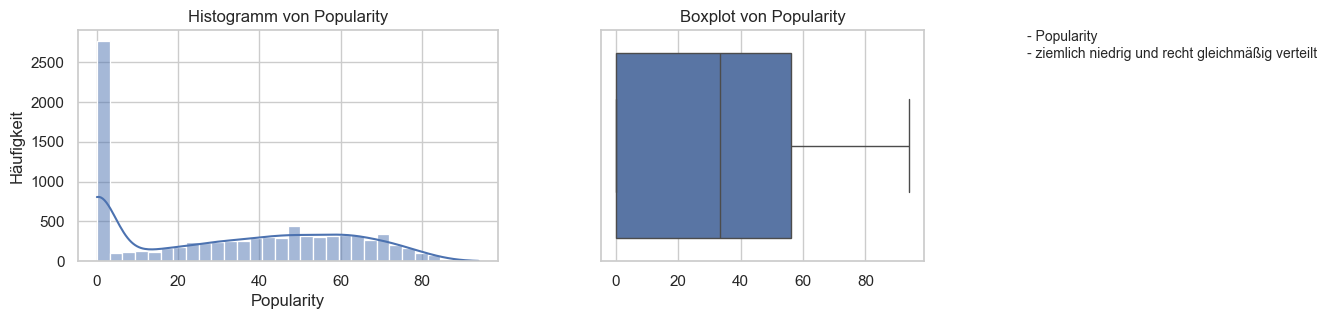

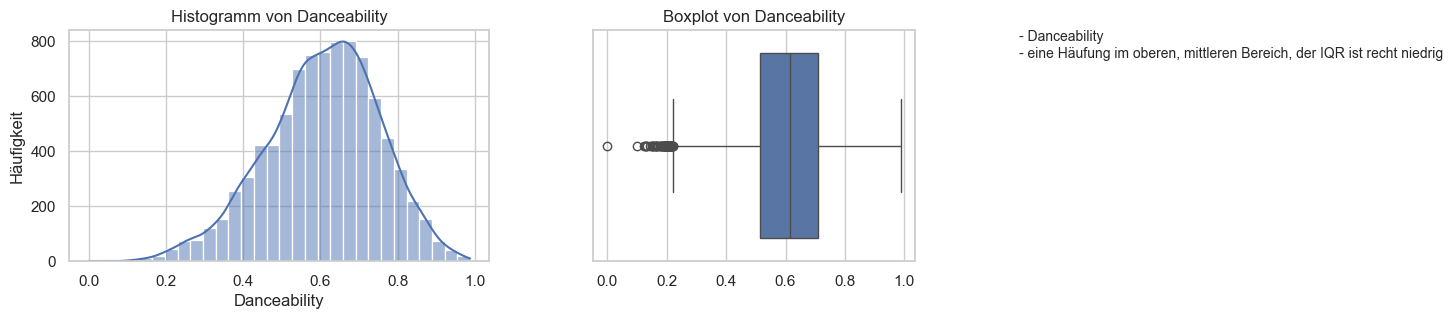

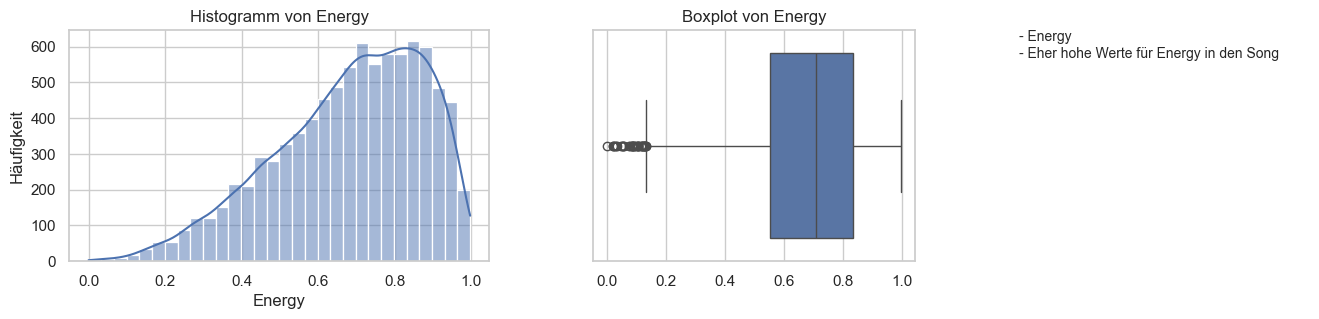

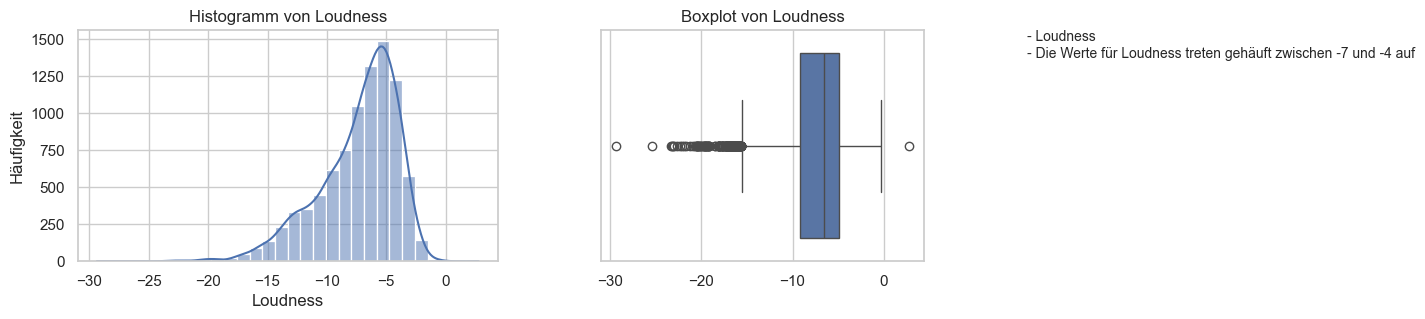

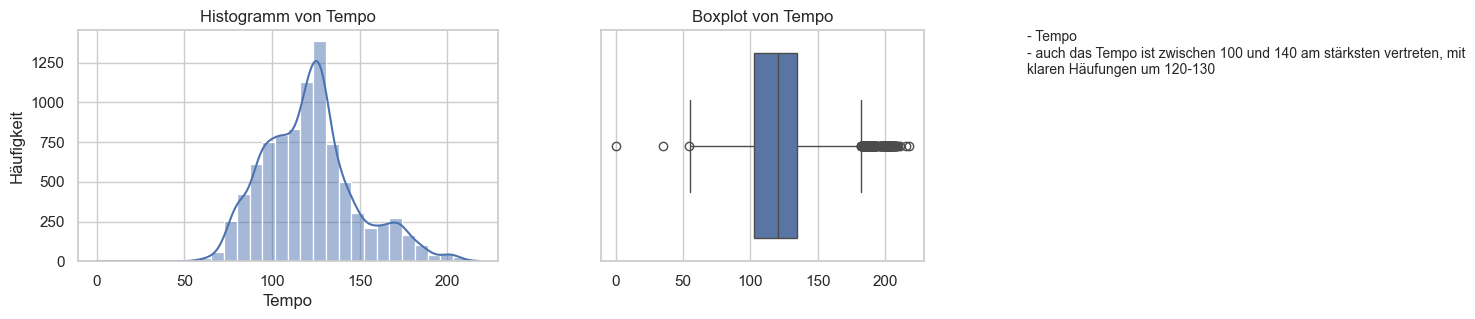

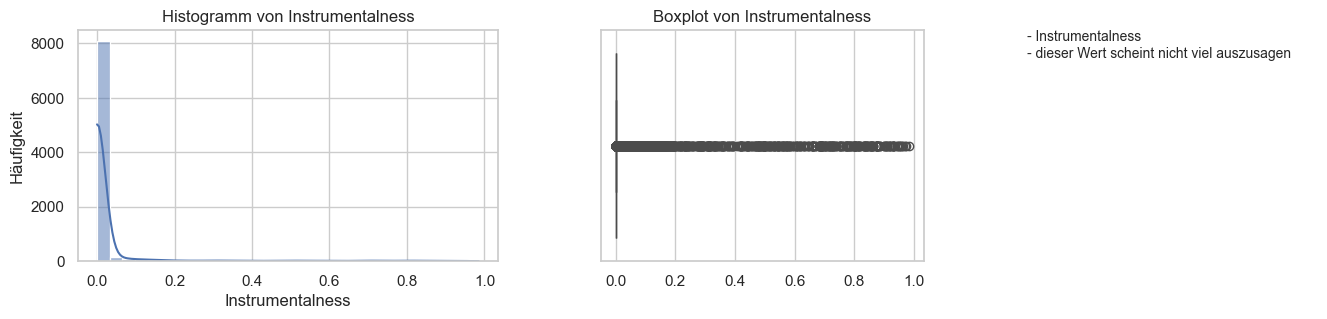

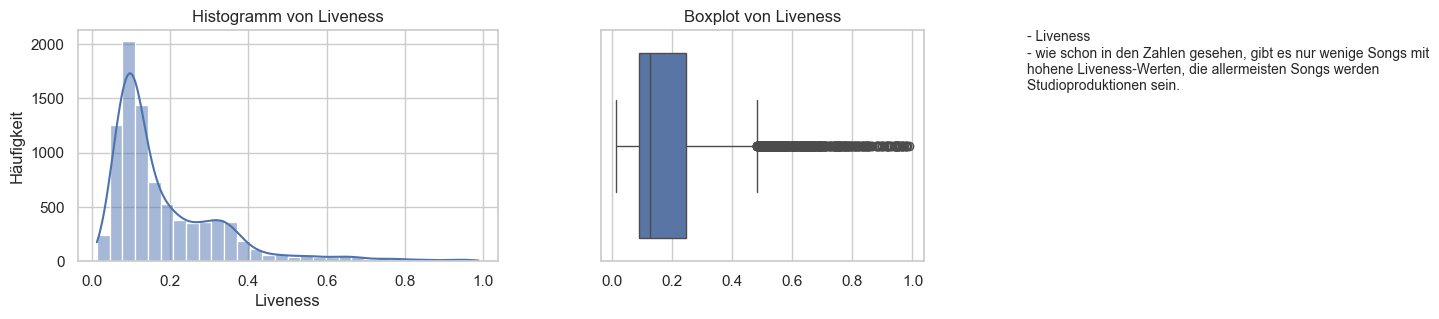

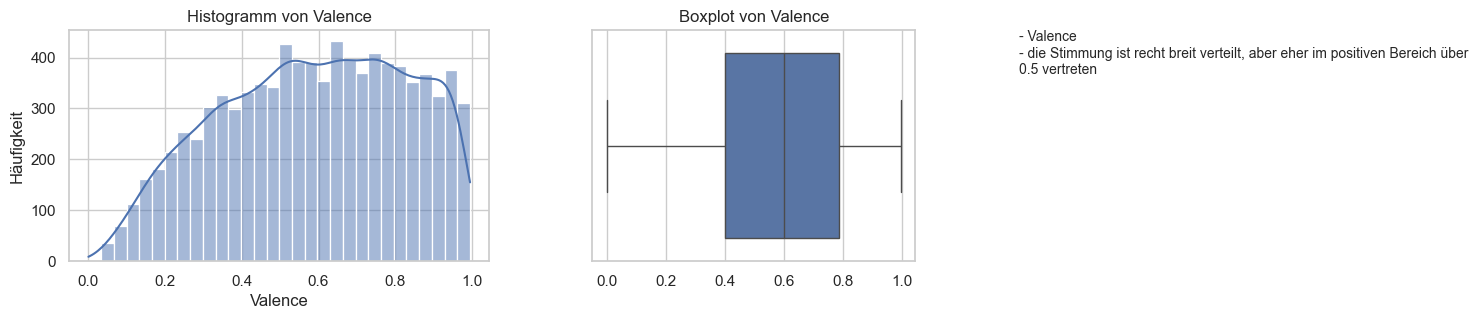

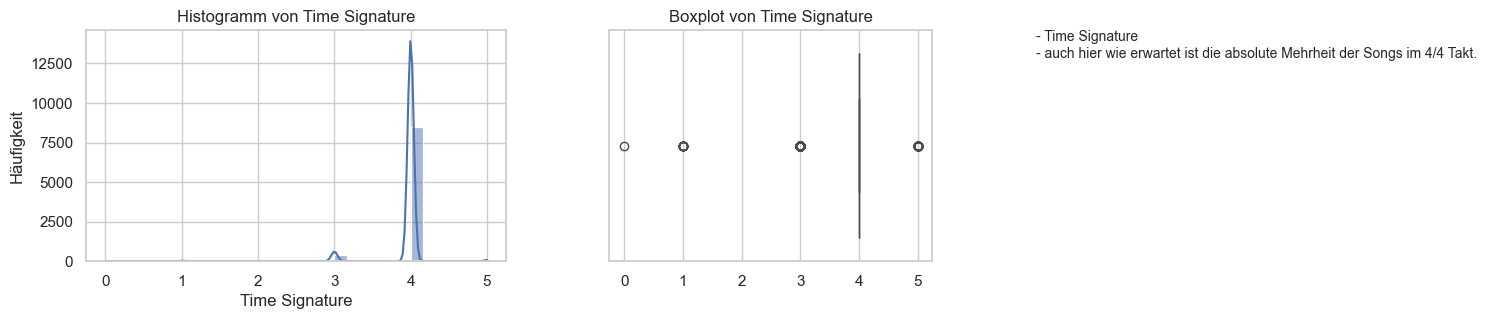

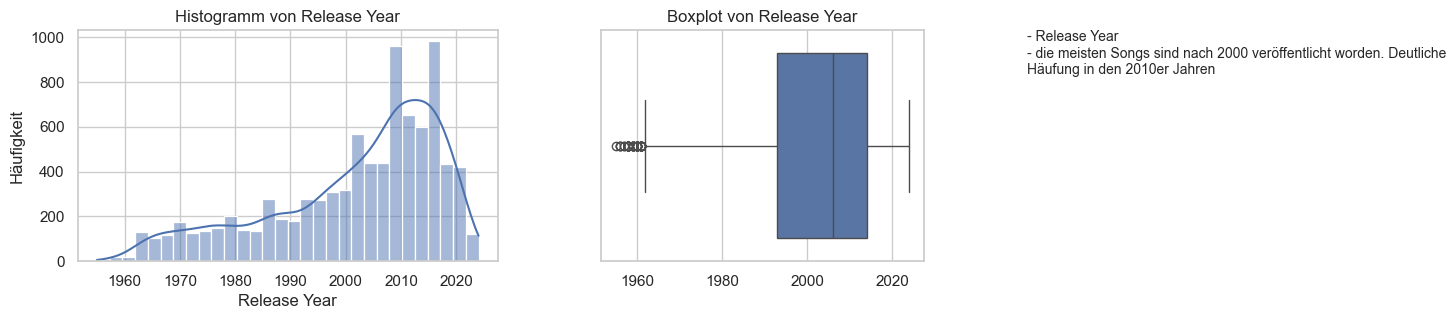

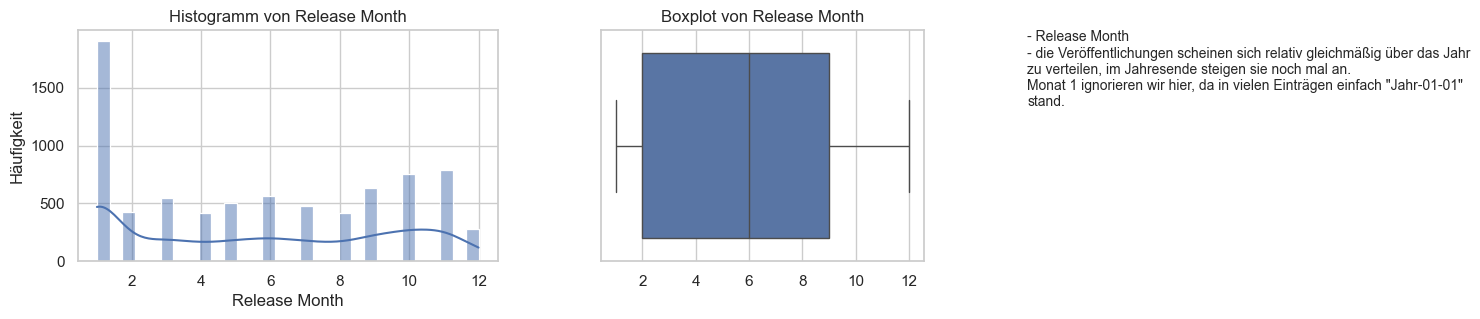

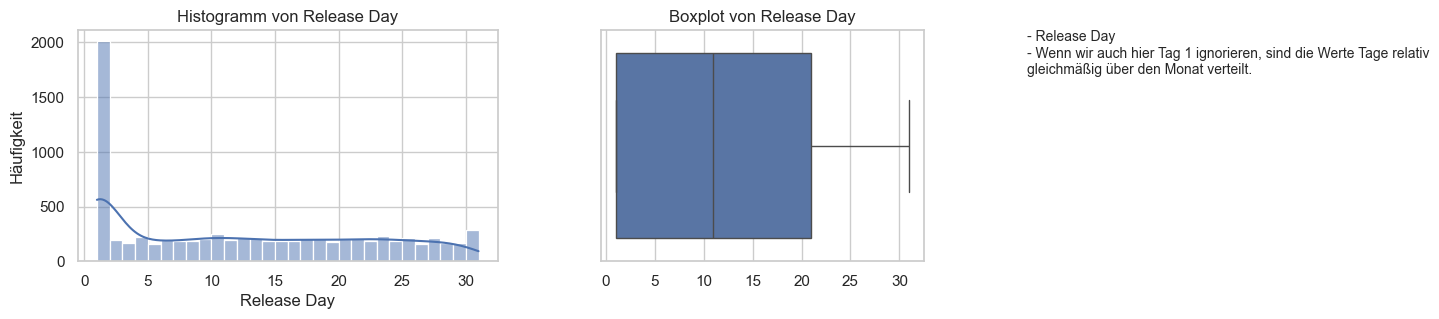

In [8]:
sns.set(style="whitegrid")

variables = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Tempo',
             'Instrumentalness', 'Liveness', 'Valence', 'Time Signature',
             'Release Year', 'Release Month', 'Release Day']

# Map von Spalte zu deinem Beschreibungstext
descriptions = {
    'Popularity': "- Popularity \n- ziemlich niedrig und recht gleichmäßig verteilt",
    'Danceability': "- Danceability \n- eine Häufung im oberen, mittleren Bereich, der IQR ist recht niedrig",
    'Energy': "- Energy \n- Eher hohe Werte für Energy in den Song",
    'Loudness': "- Loudness \n- Die Werte für Loudness treten gehäuft zwischen -7 und -4 auf",
    'Tempo': "- Tempo \n- auch das Tempo ist zwischen 100 und 140 am stärksten vertreten, mit klaren Häufungen um 120-130",
    'Valence': "- Valence \n- die Stimmung ist recht breit verteilt, aber eher im positiven Bereich über 0.5 vertreten",
    'Instrumentalness': "- Instrumentalness \n- dieser Wert scheint nicht viel auszusagen",
    'Liveness': "- Liveness \n- wie schon in den Zahlen gesehen, gibt es nur wenige Songs mit hohene Liveness-Werten, die allermeisten Songs werden Studioproduktionen sein.",
    'Time Signature': "- Time Signature \n- auch hier wie erwartet ist die absolute Mehrheit der Songs im 4/4 Takt.",
    'Release Year': "- Release Year \n- die meisten Songs sind nach 2000 veröffentlicht worden. Deutliche Häufung in den 2010er Jahren",
    'Release Month': "- Release Month \n- die Veröffentlichungen scheinen sich relativ gleichmäßig über das Jahr zu verteilen, im Jahresende steigen sie noch mal an. \nMonat 1 ignorieren wir hier, da in vielen Einträgen einfach \"Jahr-01-01\" stand.",
    'Release Day': "- Release Day \n- Wenn wir auch hier Tag 1 ignorieren, sind die Werte Tage relativ gleichmäßig über den Monat verteilt."
}

def plot_with_description(df, var, figsize=(16,3)):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 3, width_ratios=[1.3, 1, 0.9], wspace=0.3)

    ax_hist = fig.add_subplot(gs[0, 0])
    sns.histplot(df[var].dropna(), bins=30, kde=True, ax=ax_hist)
    ax_hist.set_title(f'Histogramm von {var}')
    ax_hist.set_xlabel(var)
    ax_hist.set_ylabel('Häufigkeit')

    ax_box = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=df[var].dropna(), ax=ax_box, orient='h')
    ax_box.set_title(f'Boxplot von {var}')
    ax_box.set_xlabel('')

    ax_text = fig.add_subplot(gs[0, 2])
    ax_text.axis('off')
    text = descriptions.get(var, "")
    # Text linksbündig, mit Zeilenumbruch erhalten
    ax_text.text(0, 1, text, fontsize=10, va='top', ha='left', wrap=True, family='sans-serif')

    plt.tight_layout()
    plt.show()

for var in variables:
    plot_with_description(df1, var)

### 1.1 Tracknummer auf dem Album

Die Verteilung der Songs auf einem Album folgt hauptsächlich psychologischen Gesichtspunkten: Wenn die Zuhörer_innen in ein Album reinhören, soll es sie hineinziehen, sie sollen mitbekommen, was sie erwartet und Lust auf mehr bekommen. Trotzdem sollte man nicht das ganze "Pulver verschießen" und muss die guten Songs etwas auf das ganze Album verteilen. Viele Alben folgen auch einem dramaturgischen Aufbau. 

Spannend wäre hier noch die Kennzahl, wie viele Songs es pro Album gibt, um die Titelnummer ins Gesamtgefüge einordnen zu können.

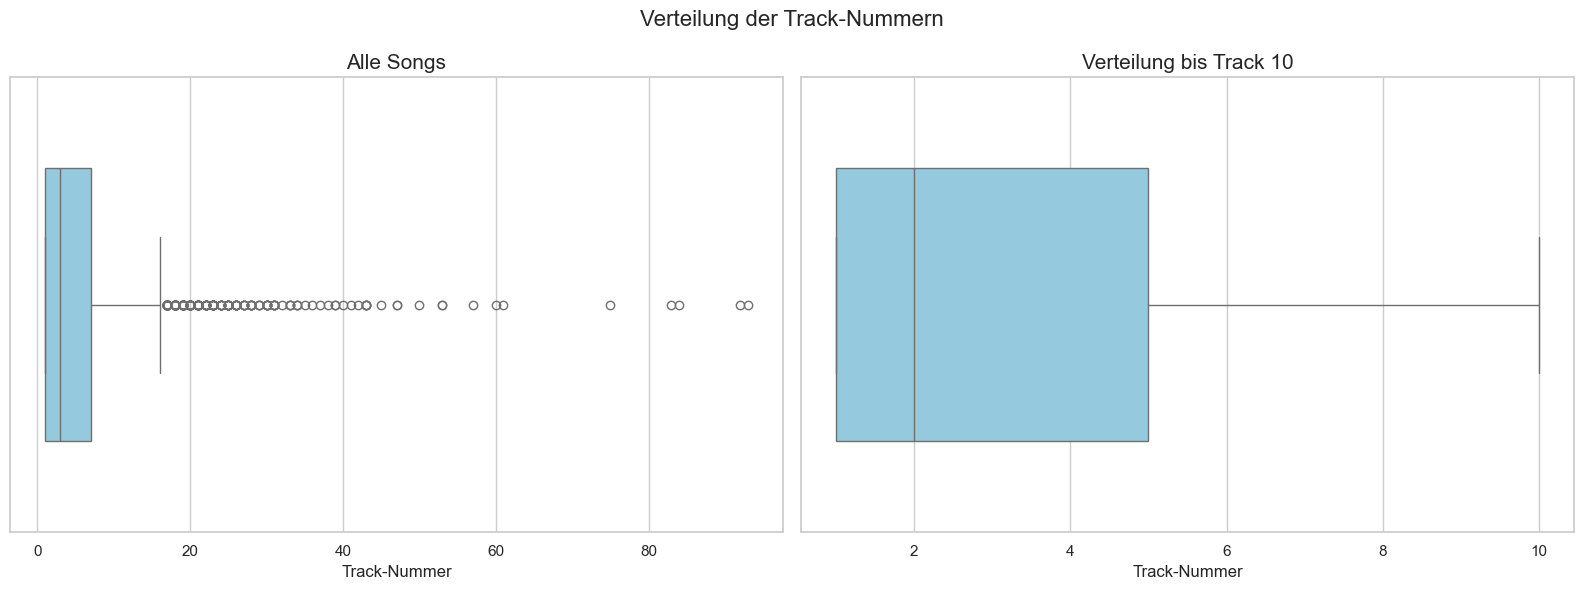

In [9]:
# Erstelle Figure mit zwei Subplots nebeneinander
plt.figure(figsize=(16,6))
plt.suptitle('Verteilung der Track-Nummern', fontsize=16)
sns.set_style("whitegrid")

# Erster Subplot - Alle Track-Nummern
plt.subplot(1,2,1)
sns.boxplot(x=df1['Track Number'], color='skyblue', width=0.6)
plt.title('Alle Songs', fontsize=15)
plt.xlabel('Track-Nummer', fontsize=12)

# Zweiter Subplot - Track-Nummern bis 10
plt.subplot(1,2,2)
df_filtered = df1[df1['Track Number'] <= 10]
sns.boxplot(x=df_filtered['Track Number'], color='skyblue', width=0.6)
plt.title('Verteilung bis Track 10', fontsize=15)
plt.xlabel('Track-Nummer', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
print(f"Songs gesamt: {df1['Track Number'].shape[0]}")
print(f"Ausreißer: {df1['Track Number'].shape[0] - df_filtered.shape[0]}")
print(f"Songs ohne Ausreißer: {df_filtered.shape[0]}")

Songs gesamt: 8892
Ausreißer: 1140
Songs ohne Ausreißer: 7752


Die Tracknummern haben sehr große Ausreißer, Der IQR liegt zwischen Track 1 und 7. 

Es gibt also erstaunlich viele Songs in den Hits, die auf dem Album eine Tracknummer über 10 haben. Es sind 1141 Songs, das sind 12,8%. 

Nimmt man diese heraus und betrachtet die anderen 87%, liegen die allermeisten Stücke allerdings zwischen 1 und 5 und der Median ist bei 2. Die meisten, Stücke sind also gleich am Anfang des Albums vertreten, zwischen Track 1 und 3, zu finden.

### 1.2 Länge der Songs

Bekannte Songs haben oft eine "Radiolänge", die irgendwo um die 3-4 Minuten liegt. Es gibt natürlich Ausreißer und auch viele sehr bekannte Songs gingen fünf Minuten und länger. Nur wenige kürzer. So sieht das grafisch aus:

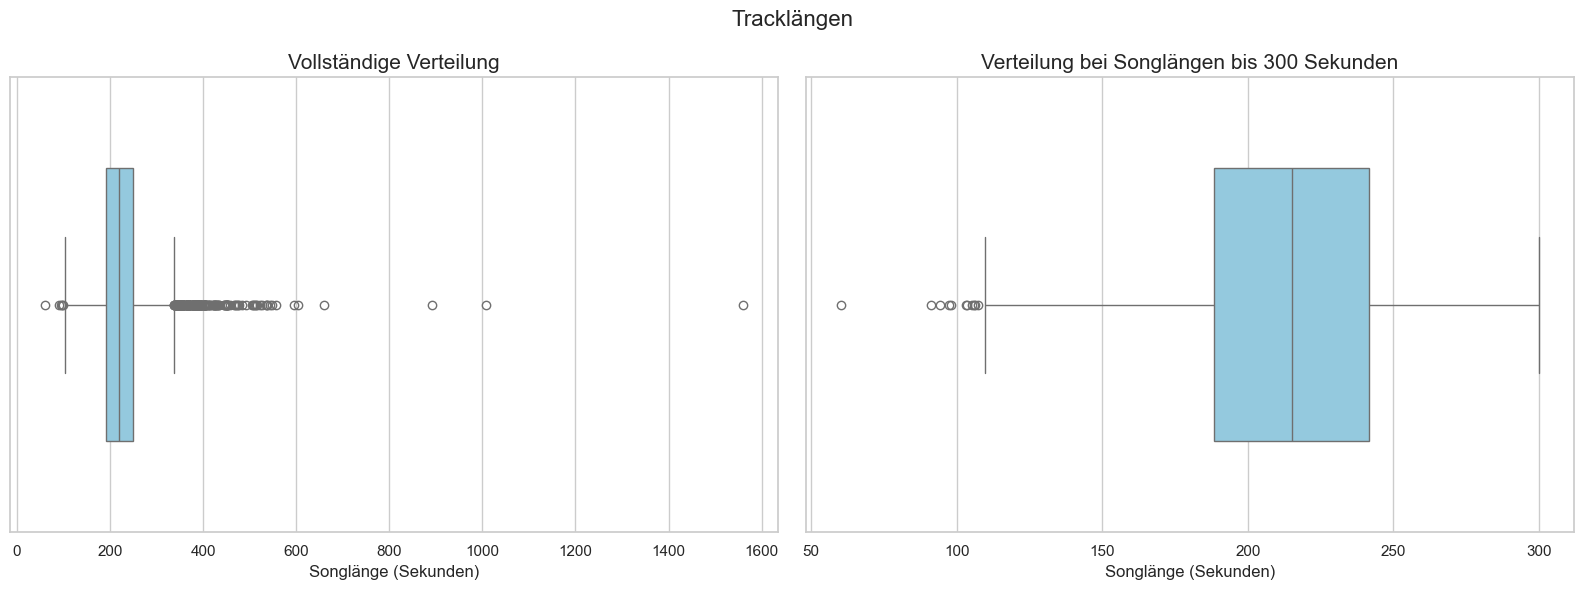

In [11]:
# Millisekunden zu Sekunden konvertieren
df1['Track Duration (s)'] = df1['Track Duration (ms)'] / 1000

plt.figure(figsize=(16,6))
plt.suptitle('Tracklängen', fontsize=16)
sns.set_style("whitegrid")

# Erster Subplot - Alle Tracklängen
plt.subplot(1,2,1)
sns.boxplot(x=df1['Track Duration (s)'], color='skyblue', width=0.6)
plt.title('Vollständige Verteilung', fontsize=15)
plt.xlabel('Songlänge (Sekunden)', fontsize=12)

# Zweiter Subplot - Tracklängen bis 300 Sekunden
plt.subplot(1,2,2)
df_filtered = df1[df1['Track Duration (s)'] <= 300]
sns.boxplot(x=df_filtered['Track Duration (s)'], color='skyblue', width=0.6)
plt.title('Verteilung bei Songlängen bis 300 Sekunden', fontsize=15)
plt.xlabel('Songlänge (Sekunden)', fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
print(f"Songs gesamt: {df1['Track Duration (s)'].shape[0]}")
print(f"Ausreißer: {df1['Track Duration (s)'].shape[0] - df_filtered.shape[0]}")
print(f"Songs ohne Ausreißer: {df_filtered.shape[0]}")

Songs gesamt: 8892
Ausreißer: 586
Songs ohne Ausreißer: 8306


Auch hier sind die Ausreißer wieder sehr groß. Es gibt einige Songs, die zwischen 300 und 600 Sekunden liegen, also zwischen fünf und sechs Minuten. 
Das betrifft jedoch nur  sind hier jedoch 6,5% der Fälle, weswegen sich das nicht stark auf die Gesamtverteilung niederschlägt.

Der Interquartielsabstand insgesamt reicht von 3 Minuten und 12 Sekunden bis 4 Minuten und 9 Sekunden. Der Durchschnittswert von 224 Sekunden, also etwa 3m44s, liegt damit fast in der Mitte der Quartile. Diese liegen bei:
- 25. Perzentil: 192.103 Millisekunden (3 Minuten und 12 Sekunden) – 25 % der Songs sind kürzer als dieser Wert.
- 50. Perzentil: 219.426 Millisekunden (3 Minuten und 39 Sekunden) – die Hälfte der Songs ist kürzer als dieser Wert.
- 75. Perzentil: 249.826 Millisekunden (4 Minuten und 9 Sekunden) – 75 % der Songs sind kürzer als dieser Wert.
 
Die meisten Songs haben also über drei und unter vier Minuten Lauflänge. Das war etwa erwartbar. Die Streuung ist ziemlich groß, aber der größte Teil ist doch in diesem recht kleinen Bereich zusammengefasst.

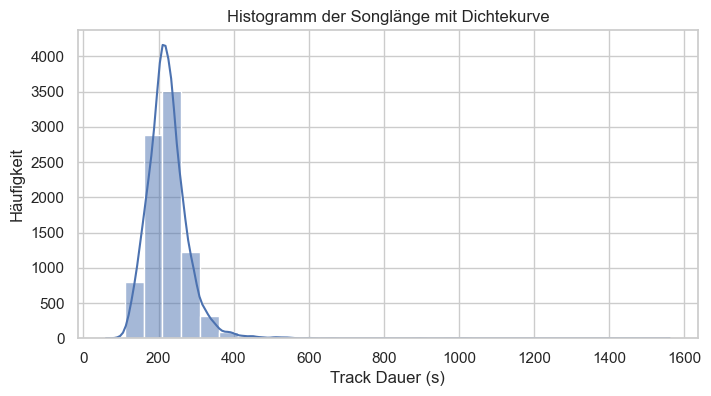

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df1['Track Duration (ms)']/1000, bins=30, kde=True)
plt.title('Histogramm der Songlänge mit Dichtekurve')
plt.xlabel('Track Dauer (s)')
plt.ylabel('Häufigkeit')
plt.show()

Die Form sieht glockenförmig, aber sehr spitz aus. Ich teste einmal auf Normalverteilung:

In [14]:
#Shapiro-Wilk-Test
shapiro_test = stats.shapiro(df1['Track Duration (ms)'])
print('Shapiro-Wilk Test:', shapiro_test.statistic)
print('p-Wert:', shapiro_test.pvalue)

print()

# Kolmogorov-Smirnov-Test
ks_test = stats.kstest(df1['Track Duration (ms)'], 'norm', args=(df1['Track Duration (ms)'].mean(), df1['Track Duration (ms)'].std()))
print('KS-Test:', ks_test.statistic)
print('p-Wert:', ks_test.pvalue)

Shapiro-Wilk Test: 0.8783380462192356
p-Wert: 8.072868239907373e-64

KS-Test: 0.07472779375416383
p-Wert: 1.2499480950172738e-43


Obwohl eine glockenförmige Verteilung der Songlängen zu beobachten ist, belegen die statistischen Tests (Shapiro-Wilk und Kolmogorov-Smirnov) eine signifikante Abweichung von einer Normalverteilung. Die extrem niedrigen p-Werte geben an, dass die Verteilung trotz ähnlicher Form statistisch nicht als normalverteilt klassifiziert werden kann. 
Ich probiere noch eine logarithmische Transformation, um die schiefe Verteilung zu neutralisieren und teste noch einmal:

Shapiro-Wilk Teststatistik: 0.987652651683671
Shapiro-Wilk p-Wert: 4.125769180000696e-27
Schiefe nach Log-Transformation: 0.15833156680190025


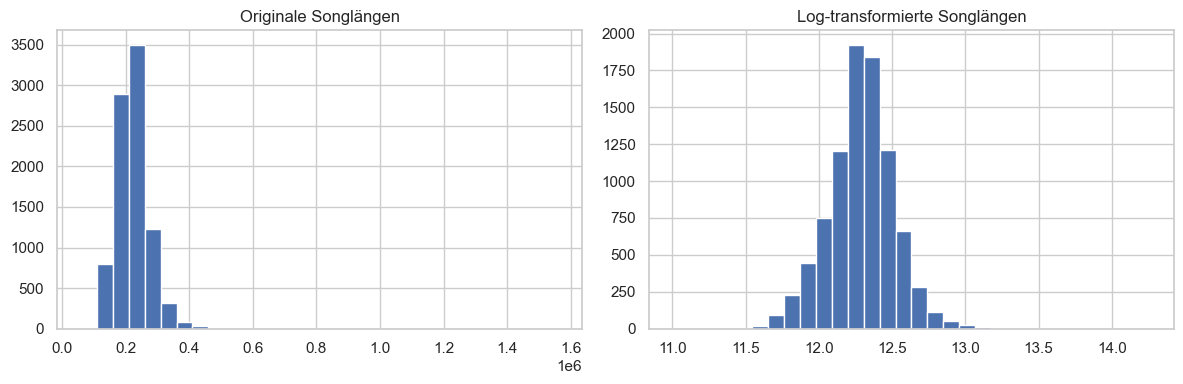

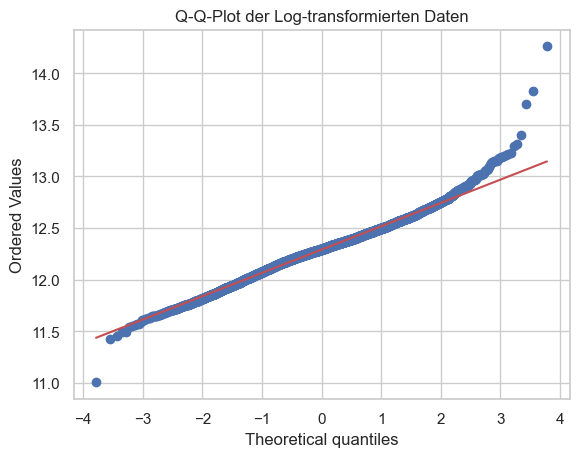

In [15]:
# Logarithmische Transformation
df1_log = df1
df1_log['Log_Track_Duration'] = np.log(df1['Track Duration (ms)'])

# Neue Normalverteilungstests
log_shapiro_test = stats.shapiro(df1_log['Log_Track_Duration'])
log_ks_test = stats.kstest(df1_log['Log_Track_Duration'], 'norm', 
                           args=(df1_log['Log_Track_Duration'].mean(), 
                                 df1_log['Log_Track_Duration'].std()))

# Schiefe der transformierten Daten
log_skewness = df1['Log_Track_Duration'].skew()

print('Shapiro-Wilk Teststatistik:', log_shapiro_test.statistic)
print('Shapiro-Wilk p-Wert:', log_shapiro_test.pvalue)
print('Schiefe nach Log-Transformation:', log_skewness)

# Optional: Visualisierung
plt.figure(figsize=(12,4))
plt.subplot(121)
df1['Track Duration (ms)'].hist(bins=30)
plt.title('Originale Songlängen')
plt.subplot(122)
df1['Log_Track_Duration'].hist(bins=30)
plt.title('Log-transformierte Songlängen')
plt.tight_layout()
plt.show()

# Q-Q-Plot für Log-transformierte Daten
stats.probplot(df1['Log_Track_Duration'], plot=plt)
plt.title('Q-Q-Plot der Log-transformierten Daten')
plt.show()

del df1_log

### 1.3 Release Daten

Interessant ist natürlich auch anzuschauen, wie die Songs verteilt sind, also wann welches Lied rauskam. Dabei muss man aber bedenken, dass einige Songs, wenn sie bei Spotify hochgeladen werden, nicht mit ihrem ursprünglichen "analogen" Releasetermin eingestellt werden, auch wenn das durchaus möglich ist. Dementsprechend wird die Verteilung der Song-Releasedaten sich wohl in den 2010ern häufen, also in der Zeit, in der viele Releases auf Spotify geladen wurden.

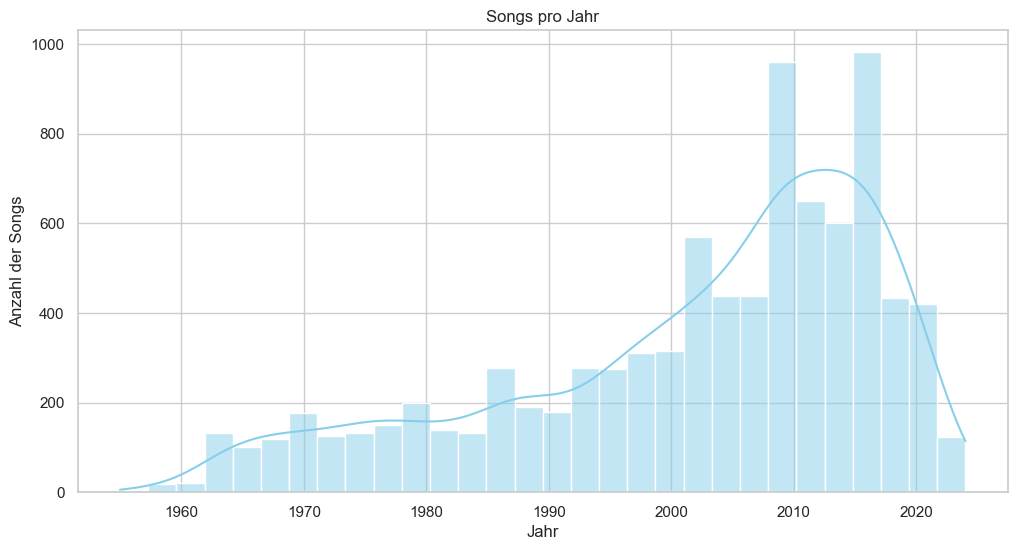

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Release Year', bins=30, kde=True, color='skyblue')
plt.title('Songs pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Songs')
plt.grid(True)
plt.show()

In [17]:
release_year_stats = df1['Release Year'].describe()
print(release_year_stats)


count    8892.000000
mean     2001.671502
std        15.475602
min      1955.000000
25%      1993.000000
50%      2006.000000
75%      2014.000000
max      2024.000000
Name: Release Year, dtype: float64


Es zeigt sich, wie erwartet, dass die meisten Songs aus dieser Auswahl nach 2000 veröffentlicht worden sind. Doch bis 1990 sind die meisten Jahre mit über 100 Releases vertreten. 

Spannend ist hier dier Verteilung: Das erste Perzentil der Songs deckt fast 40 Jahre ab, das zweite dann nur noch 13 Jahre, das dritte acht und das vierte 10. Etwa 50% der Songs sind also zwischen 1993 und 2014 herausgekommen. Und auch wenn die Aussagekraft der Releasedaten etwas in Zweifel zu ziehen ist, kann man wohl festhalten, dass über die Hälfte die Top-Songs aus Spotify, Stand 2024, nach dem Jahr 2000 erschienen sind.

Man darf natürlich nicht vergessen, dass hier eine zeitliche Komponente ins Spiel kommt - wenn ein Song seit den Anfängen von Spotify gehört wurde, konnte er viel mehr Klicks sammeln und somit eine dauerhaftere Popularity aufbauen, als ein Song, der zum Beispiel erst 2022 erschien und dafür sehr erfolgreich war. 

Spotify versucht über den Popularity-Wert die absoluten Klickzahlen mit der Aktualität der Klicks in Verbindung zu setzen. Diese schaue ich mir in Kombination mit den Releasedaten in der bivariaten Analyse an.

### 1.4 Verteilung der Tonarten

In [18]:
# Anzahl der Songs pro Tonart
key_counts = df1['Key'].value_counts().sort_index()

# Erstelle DataFrame
df_plot = pd.DataFrame({
    'Tonart': key_counts.index,
    'Anzahl der Songs': key_counts.values
})

# Definiere die Zuordnung von Zahlen zu Tonarten
key_mapping = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'H'}
df_plot['Tonart'] = df_plot['Tonart'].map(key_mapping)

# Balkendiagramm mit Plotly erstellen
fig = px.bar(df_plot, x='Tonart', y='Anzahl der Songs',
             title='Verteilung der Tonarten (Keys)',
             labels={'Tonart': 'Tonart', 'Anzahl der Songs': 'Anzahl der Songs'},
             text='Anzahl der Songs',
             color='Tonart',  # Färbe die Balken nach Tonart
             color_discrete_sequence=px.colors.qualitative.Set2)  # Verwende eine kategorische Farbpalette

# Mouseover-Informationen
fig.update_traces(texttemplate='%{text}', textposition='outside')

# y-Achse auf Maximalwert von 1500 setzen
fig.update_layout(yaxis=dict(range=[0, 1500]), 
                 width=1200, height=400)

fig.update_layout(showlegend=False)

# Diagramm anzeigen
fig.show()


Am häufigsten kommen die Tonarten C, G, A und D vor. Mit Abstand am seltensten nutzen Songs D#. Der Rest pendelt sich um 550-800 Songs ein. 

Im Quintenzirkel liegen C und G sowie A und D sehr eng zusammen, sie haben gemeinsame Töne und passen gut zueinander. Häufig wird auch in die Paralleltonarten (also a-Moll statt A-Dur) gewechselt, zuers schaue ich mir aber mal die allgemeine Verteilung von Dur und Moll an.

### 1.5 Globale Verteilung von Dur und Moll

Jetzt gucke ich noch die Gesamtverteilung von Dur und Moll an. 

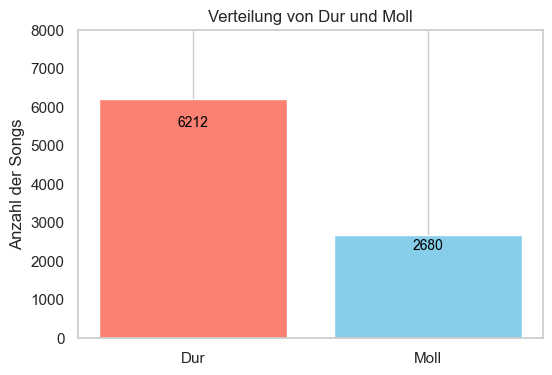

Dur: 69.86%
Moll: 30.14%


In [19]:
counts = df1['Mode'].value_counts().reindex([1, 0])  # 1=Dur, 0=Moll in dieser Reihenfolge

plt.figure(figsize=(6, 4))
bars = plt.bar(['Dur', 'Moll'], counts, color=['salmon', 'skyblue'])
plt.title('Verteilung von Dur und Moll')
plt.ylabel('Anzahl der Songs')
plt.ylim(0, 8000)
plt.grid(axis='y')

for bar in bars:
    h = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, h-h*0.1, f'{h}', ha='center', va='center', color='black', fontsize=10)

plt.show()

# Verteilung printen
for name, count in zip(["Dur","Moll"], counts/df1.shape[0]*100):
    print(f"{name}: {count:.2f}%")

Mehr als 2/3 der Songs sind in Dur. 

Dur wird als Tonart eher positiv wahrgenommen und mit einer positiven Grundstimmung verbunden. Die Übersicht hat ja schon gezeigt, dass die Stimmung der Songs zu positiv, tanzbar und energetisch tendiert. Da passt dieses Ergebnis gut ins Bild.
Als Nächstes untersuche ich die Verteilung zwischen Dur/Moll in Zusammenhang mit den Tonarten.

## 3. Bivariate Analysen

In diesem Teil untersuch ich die Zusammenhänge zwischen den univariaten Variablen. Mein besonderes Interesse liegt hier bei der Entwicklung der Werte über die Zeit, sowie den impliziten Zusammenhängen unterschiedlicher Spotify-Attribute.

Auch hier ist die Hauptfrage: Gibt es Zusammenhänge und Auffälligkeiten bei den erfolgreichsten Songs?

Zuerst betrachte ich die Verteilung von Dur und Moll in der zeitlichen Entwicklung und im Zusammenhang mit den Tonarten.


### 3.1 Verteilung von Moll und Dur über die Tonarten

In [20]:
# Erstelle einen neuen DataFrame mit den benötigten Spalten
df_temp = df1[['Key', 'Mode']].copy()

# Umbenennen der Key-Werte
df_temp['Key'] = df_temp['Key'].map({
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 
    4: 'E', 5: 'F', 6: 'F#', 7: 'G', 
    8: 'G#', 9: 'A', 10: 'A#', 11: 'H'
})

# Umbenennen der Modus-Werte
df_temp['Mode'] = df_temp['Mode'].map({0: 'Moll', 1: 'Dur'})  # Umbenennen der Modus-Werte

# Zähle die Anzahl der Songs für jede Tonart und deren Modus (Dur/Moll)
key_mode_counts = df_temp.groupby(['Key', 'Mode']).size().reset_index(name='Count')

# Berechne die Gesamtanzahl der Songs pro Tonart
total_counts = key_mode_counts.groupby('Key')['Count'].transform('sum')
key_mode_counts['Percentage'] = (key_mode_counts['Count'] / total_counts) * 100

# Erstelle den Plotly-Balkendiagramm mit benutzerdefinierten Farben
fig = px.bar(key_mode_counts, 
             x='Key', 
             y='Count', 
             color='Mode', 
             text='Percentage',
             labels={'Count': 'Anzahl der Songs', 'Key': 'Tonart'},
             title='Verteilung der Tonarten (Keys) in Dur und Moll',
             hover_data={'Percentage': ':.2f'},
             color_discrete_map={'Dur': 'salmon', 'Moll': 'skyblue'})  # Benutzerdefinierte Farben

# Anpassungen für das Layout
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(barmode='stack', xaxis_title='Tonart', yaxis_title='Anzahl der Songs',
                  yaxis=dict(range=[0, 1500]),
                 width=1200, height=400)  # Setze den Bereich der Y-Achse

# Diagramm anzeigen
fig.show()

# Lösche den temporären DataFrame
del df_temp

Dur ist fast überall am stärksten vertreten, nur bei der Tonart h dominiert Moll mit 55%. f#-Moll schafft es immerhin auf 46%. 

Die häufigsten Dur-Tonarten C, G, A und D.
Die häufigsten Moll-Tonarten sind h, f, a, e und f#. 

Interessanterweise sind das jeweils die Paralleltonarten voneinander. 

Die Paralleltonart eines Dur-Akkordes ist der Moll-Akkord drei Halbtöne tiefer und umgekehrt. Die Akkorde haben zwei gemeinsame Töne und passen deshalb gut zusammen. Beispielsweise ist die Paralleltonart von C-Dur (Töne: C-E-G) : a-Moll (Töne: a-c-e). 

Wenn man also die Tonarten der Songs betrachtet: 
C->a-Moll, 
G->e-Moll, 
A->f#-Moll, 
D->h-Moll, 

Das passt also sehr gut zusammen und bestätigt die starke Verbreitung der "Haupttonarten" C, G, A und D

#### 3.1.2 zeitliche Entwicklung von Dur und Moll

Als nächstes untersuche ich die zeitliche Entwicklung: Wie ist die Verteilung von Dur und Moll über die Jahre?

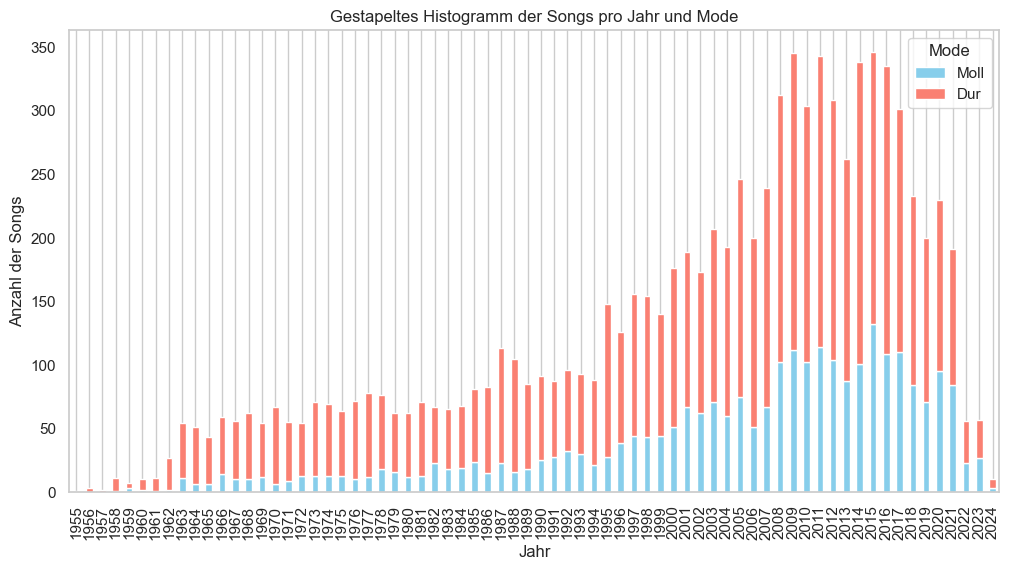

In [21]:
# Zähle die Anzahl der Songs pro Jahr und Mode
hist_data = df1.groupby(['Release Year', 'Mode']).size().unstack(fill_value=0)

# Erstelle das gestapelte Histogramm
hist_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 6))

plt.title('Gestapeltes Histogramm der Songs pro Jahr und Mode')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Songs')
plt.xticks(rotation=90)
plt.legend(title='Mode', labels=['Moll', 'Dur'])
plt.grid(axis='y')
plt.show()

Hier sieht man wieder, dass die meisten Stücke in Dur geschrieben sind. Moll scheint aber im Laufe der Zeit zuzunehmen, das schaue ich mir in der relativen Verteilung an.

In [22]:
# Zähle die Anzahl der Songs pro Jahr und Mode
hist_data = df1.groupby(['Release Year', 'Mode']).size().unstack(fill_value=0)

# Berechne die relativen Werte
relative_data = hist_data.div(hist_data.sum(axis=1), axis=0)

# Erstelle das gestapelte Histogramm
fig = go.Figure()

# Füge die Spuren für jeden Modus hinzu
for mode in relative_data.columns:
    fig.add_trace(go.Bar(
        x=relative_data.index,
        y=relative_data[mode],
        name='Dur' if mode == 1 else 'Moll',
        hoverinfo='y+text',
        text=relative_data[mode].apply(lambda x: f'{x:.2%}'),  # Zeige relative Werte in Prozent an
        marker=dict(color='skyblue' if mode == 0 else 'salmon')
    ))

# Aktualisiere das Layout
fig.update_layout(
    title='Gestapeltes Histogramm der Songs pro Jahr und Mode',
    xaxis_title='Jahr',
    yaxis_title='Relative Anzahl der Songs',
    barmode='stack',
    legend_title='Mode',
    xaxis=dict(tickmode='linear'),
)

# Zeige die Grafik an
fig.update_layout(height=600,width=1400,  # Höhe auf 1200 Pixel setzen
                  plot_bgcolor='white')
fig.show()

Hier sieht man, dass Moll in den Songs bis 1978 eher weniger stark vertreten ist (Ausnahme: 1959, aber das sind auch 7 Songs). Danach kommt Moll häufiger vor und stabilisiert sich ab 1990 bei etwa 30%. Ab 2015 steigt die Anzahl der Songs in Moll noch mal ein bisschen. 

Man kann also einen ansteigenden Trend über die Jahre erkennen. Um das noch mal genauer darzustellen, habe ich die jeweiligen Abschnitte gebündelt.

In [23]:
# Definiere die Zeitintervalle
intervals = {
    '1955-1978': (1955, 1978),
    '1978-1990': (1978, 1990),
    '1990-2014': (1990, 2014),
    '2014-2024': (2014, 2024)
}

# Erstelle eine Liste für die Ergebnisse
results_list = []

# Berechne die Verteilung für jedes Intervall
for interval, (start, end) in intervals.items():
    # Filtere die Daten für das aktuelle Intervall
    filtered_data = df1[(df1['Release Year'] >= start) & (df1['Release Year'] < end)]
    
    # Zähle die Anzahl der Songs pro Mode
    mode_counts = filtered_data['Mode'].value_counts()
    
    # Füge die Ergebnisse zur Liste hinzu
    results_list.append({
        'Interval': interval,
        'Dur': mode_counts.get(1, 0),
        'Moll': mode_counts.get(0, 0)
    })

# Erstelle ein DataFrame aus der Liste
results = pd.DataFrame(results_list)

# Berechne die relativen Werte
results['Total'] = results['Dur'] + results['Moll']
results['Dur %'] = results['Dur'] / results['Total']
results['Moll %'] = results['Moll'] / results['Total']

# Erstelle das gestapelte Histogramm
fig = go.Figure()

# Füge die Spuren für jeden Modus hinzu
fig.add_trace(go.Bar(
    x=results['Interval'],
    y=results['Moll %'],
    name='Moll ',
    hoverinfo='y+text',
    text=results['Moll %'].apply(lambda x: f'{x:.2%}'),
    marker=dict(color='lightblue')
))

fig.add_trace(go.Bar(
    x=results['Interval'],
    y=results['Dur %'],
    name='Dur',
    hoverinfo='y+text',
    text=results['Dur %'].apply(lambda x: f'{x:.2%}'),
    marker=dict(color='salmon')
))

# Aktualisiere das Layout
fig.update_layout(
    title='Verteilung von Dur und Moll in verschiedenen Zeitintervallen',
    xaxis_title='Zeitintervall',
    yaxis_title='Relative Anzahl der Songs',
    barmode='stack',
    legend_title='Mode',
)

# Zeige die Grafik an
fig.show()

In diesem Plot sieht man die Entwicklung noch mal genauer, hier habe ich die Abschnitte gebündelt.

Man sieht, dass Moll in dem Datensatz über die Jahre an Bedeutung zunimmt.

### 3.2 Zeitliche Verteilung der Tonarten

Da es schwer ist, die Verteilung der Tonarten über die Jahre zu verfolgen, hier eine Übersicht mit allen gestapelten Tonarten, mal sehen, ob es Auffälligkeiten gibt.

In [24]:
# Mapping der Tonarten
key_names = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'H'
}

# Daten vorbereiten (Annahme: df1 existiert mit 'Release Year' und 'Key')
df = df1.copy()
df['Release Year'] = df['Release Year'].astype(str)
df['Key'] = df['Key'].astype('Int64')

# Kontingenztabelle Year x Key (Counts)
counts = pd.crosstab(df['Release Year'], df['Key']).sort_index()

# Anteile in Prozent pro Jahr
shares_pct = counts.div(counts.sum(axis=1), axis=0).fillna(0) * 100

# Reihenfolge der Jahre und Keys
years = counts.index.tolist()
keys = counts.columns.tolist()

# Erstelle gestapelte Traces: für jede Key-Spalte ein Trace mit Hoverinfo für Prozent + Count
fig = go.Figure()
for k in keys:
    key_label = key_names.get(int(k), str(k)) if pd.notna(k) else str(k)
    y_vals = shares_pct[k].values
    counts_vals = counts[k].values
    hover_text = [
        f"Year: {yr}<br>Key: {key_label} ({k})<br>Share: {y:.2f}%<br>Count: {c}"
        for yr, y, c in zip(years, y_vals, counts_vals)
    ]
    fig.add_trace(go.Bar(
        name=key_label,         # Legendenlabel als Notenname
        x=years,
        y=y_vals,
        text=[f"{y:.1f}%" for y in y_vals],        # optionale Beschriftung auf Balken
        hovertext=hover_text,
        hoverinfo='text',
        marker=dict(line=dict(width=0.5, color='white'))
    ))

fig.update_layout(
    barmode='stack',
    title='Verteilung aller Keys pro Jahr (Anteil % — interaktiv)',
    xaxis=dict(title='Release Year', tickangle=-45),
    yaxis=dict(title='Anteil pro Jahr (%)'),
    legend=dict(title='Key', orientation='v', x=1.02, xanchor='left', y=1, font=dict(size=12)),
    margin=dict(l=60, r=300, t=80, b=120),  # rechtes margin für Legende
    height=800,
    width=1600  # Breite anpassen
)

fig.show()

Es ist etwas dicht, aber man sieht ganz gut, dass C meistens mit 10-20% vertreten ist, gefolgt von G, D und A, die meist knapp über 10% erreichen. Dann kommen E, F, H und C# mit meist knapp unter 10% und dann F#, G#, A# mit meist etwas über 5%. Zum Schluss folgt D# mit meist unter 5%. 

Große Entwicklungen einzelner Tonarten sehe ich nicht, A und D sind über die Jahre etwas zurückgegangen, G# und C# haben etwas zugenommen. 
Aber hier spielen natürlich die stark schwankenden Samplegrößen pro Jahr hinein, allzu aussagekräftig ist das also nicht. 

Trotzdem eine ganz interessante Übersicht.

### 3.3 Entwicklung der Songlängen

Nun untersuche ich die Entwicklung der Songlängen über die Jahre, oben haben wir ja gesehen, dass die Durchschnittslänge bei 3:44 liegt, verändert sich dieser Trend über die Jahre?

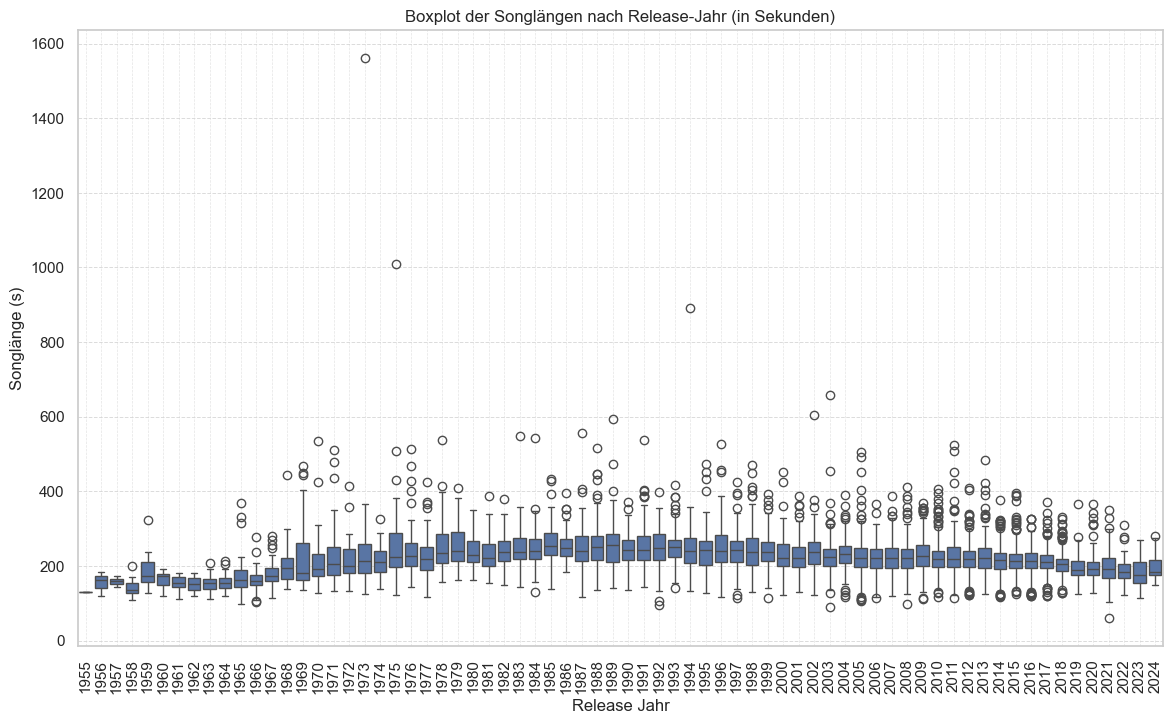

In [25]:
#Entwicklung der Songlängen über die Jahre:

df1['Track Duration (s)'] = df1['Track Duration (ms)'] / 1000

plt.figure(figsize=(14, 8))
sns.boxplot(data=df1, x='Release Year', y='Track Duration (s)')
plt.xticks(rotation=90)
plt.title('Boxplot der Songlängen nach Release-Jahr (in Sekunden)')
plt.xlabel('Release Jahr')
plt.ylabel('Songlänge (s)')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='lightgray', alpha=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.6)

plt.show()

Man sieht hier einige starke Ausreißer. Diese ignoriere ich, aufgrund ihrer geringen Anzahl und begrenze den Plot auf maximal 600 Sekunden (immerhin 10 Minuten) Songlänge.
So nähern sich die Songlängen  dem Durchschnittswert.

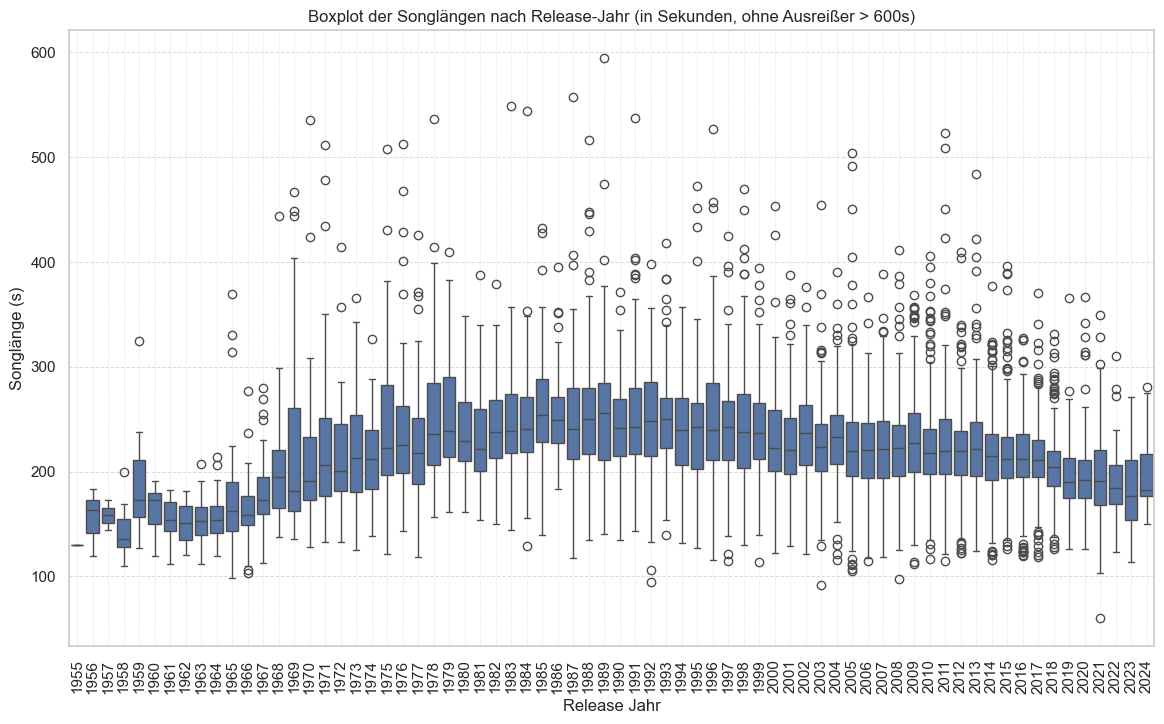

In [26]:
df_filtered = df1[df1['Track Duration (s)'] <= 600]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='Release Year', y='Track Duration (s)')
plt.xticks(rotation=90)
plt.title('Boxplot der Songlängen nach Release-Jahr (in Sekunden, ohne Ausreißer > 600s)')
plt.xlabel('Release Jahr')
plt.ylabel('Songlänge (s)')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='lightgray', alpha=0.8)
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.6)

plt.show()

Ich finde diesen Plot sehr aussagekräftig und lasse ihn deshalb stehen, aber zum selbst erkunden hier noch eine Plotly-Version mit Mouse-Over-Elementen.

In [27]:
# Filtere DataFrame
df_filtered = df1[df1['Track Duration (s)'] <= 600]

# Erstelle Boxplot
fig = px.box(df_filtered, 
              x='Release Year', 
              y='Track Duration (s)', 
              title='Boxplot der Songlängen nach Release-Jahr - ohne Ausreißer',
              labels={'Release Year': 'Release Jahr', 'Track Duration (s)': 'Songlänge (s)'})

# Füge Hover-Informationen hinzu
fig.update_traces(hovertemplate='Quartile: %{q1}<br>Median: %{median}<br>Mean: %{mean}<br>Max: %{max}<br>Min: %{min}',
                  marker_color='skyblue')  # Setze die Farbe auf skyblue
fig.update_layout(height=800,width=1200,  # Höhe auf 1200 Pixel setzen
                  plot_bgcolor='white')

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', zeroline=False)


fig.show()

Es zeichnet sich eine interessant Entwicklung ab - am Anfang, in den 1950er bis Mitte 1960er sind die Songs kürzer, ab etwa 1968 steigen die Längen bis etwa 1978.

Dann pegeln sie sich auf einem recht hohen Niveau ein, um dann ab etwa 1996 wieder zu sinken.

Zwischen 2005 und 2013 pendelt sich die Songlänge wieder auf einem mittleren Niveau ein und sackt dann 2014-2017 ein wenig und ab 2018 noch mal deutlich ab.

Nun schaue ich mir die Meridiane für die beobachteten Perioden noch mal genauer an.

Median der Songlängen für 1955-1967: 159.17 Sekunden
Median der Songlängen für 1968-1978: 213.37 Sekunden
Median der Songlängen für 1978-1996: 242.11 Sekunden
Median der Songlängen für 1996-2005: 229.08 Sekunden
Median der Songlängen für 2005-2017: 217.72 Sekunden
Median der Songlängen für 2017-2024: 199.03 Sekunden


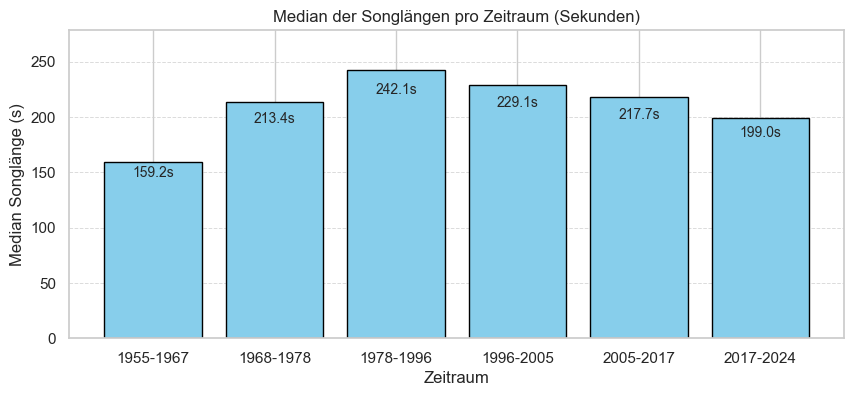

In [28]:
# Songlängen in Sekunden berechnen
df1['Track Duration (s)'] = df1['Track Duration (ms)'] / 1000

# Zeiträume definieren
time_periods = {
    '1955-1967': (1955, 1967),
    '1968-1978': (1968, 1978),
    '1978-1996': (1978, 1996),
    '1996-2005': (1996, 2005),
    '2005-2017': (2005, 2017),
    '2017-2024': (2017, 2024)
}

# Mediane der Songlängen für die Zeiträume berechnen
median_durations = {}
for period, (start, end) in time_periods.items():
    median_duration = df1[(df1['Release Year'] >= start) & (df1['Release Year'] <= end)]['Track Duration (s)'].median()
    median_durations[period] = median_duration

plt.figure(figsize=(10, 4))
medians = []

# Ergebnisse ausgeben
for period, median_duration in median_durations.items():
    print(f'Median der Songlängen für {period}: {median_duration:.2f} Sekunden')
    bars = plt.bar(period, median_duration, color='skyblue', edgecolor='black')
    medians.append(median_duration)
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h - bar.get_height()*0.1, f'{h:.1f}s', ha='center', va='bottom', fontsize=10)
        

plt.title('Median der Songlängen pro Zeitraum (Sekunden)')
plt.xlabel('Zeitraum')
plt.ylabel('Median Songlänge (s)')
plt.ylim(0, max(medians) * 1.15)
plt.grid(axis='y', linestyle='--', color='lightgray', linewidth=0.7, alpha=0.8)

plt.show()


Von 1955 bis 1967 etwa waren die Stücke ziemlich kurz, der Median liegt bei 159 Sekunden, also 2 Minuten und 39 Sekunden.
1968 bis 1978 stieg die Dauer der Songs ziemlich kontinuierlich an, der Median für diese Phase liegt schon bei 215 Sekunden, also 3 Minuten und 35 Sekunden.
1978 bis 1996 pendelt es sich auf einem recht hohen Wert von 242 Sekunden ein, das sind etwa 4 Minuten.
In der Zeit von 1996 bis 2005 sinkt die Dauer wieder, der Median liegt hier bei 229 Sekunden, also etwa 3 Minuten und 39 Sekunden.
Zwischen 2005 und 2017 pendelt es sich wieder auf einem etwas niedrigeren Wert ein, 218 Sekunden, das sind 3 Minuten und 38 Sekunden.
Um 2017 sinken die Werte plötzlich und pendeln sich auf einem niedrigeren Wert ein, jetzt haben wir 199 Sekunden als Median, das sind 3 Minuten und 19 Sekunden.

Die großen Ausreißer haben den Trend nicht stark beeinflusst.

Wir sehen, die Dauer der Songs ist im Fluss, erst kurz, dann länger, eine ganze Weile blieben sie lang und wurden dann wieder kürzer.

Eine auf der Hand liegende Erklärung dieser Entwicklung sind die technischen Entwicklungen und Trends der jeweiligen Zeit: Der Sprung von Schallplatte auf CD, die Hochzeit des modernen Radios in den 80ern und 90ern, die Zeit des Musikfernsehens, wenn man vertreten sein wollte, musste man Musikvideos drehen, die pro Minute sehr viel teurer als die reine Musik sind.
Dann die Digitalisierung der Musikindustrie, beginnend in den späten 2000ern / frühen 2010ern bis heute - Youtube, Spotify und TikTok haben ihre ganz eigenen Erfolgsformeln.

Um als Künstler erfolgreich zu sein, muss man möglichst viele Menschen ansprechen, das beeinflusst auch, wo und wie man seine Songs präsentiert.
TikTok-Videos sind heutzutage berüchtigt kurz und bieten die Möglichkeit, schnell an ein großes Publikum zu gelangen. Das wird aber auf diesem Medium eher nicht mehr mit einem sich langsam aufbauenden 70er Jahre-Song von Led Zeppelin passieren.

### 3.4 Popularity der Songs nach Releasejahr

Als Nächstes schaue ich mir die Popularity-Werte der Stücke an. Diese ist eine Mischung aus Gesamtzahl der Klicks und Aktualität der Klicks. 
Wenn ein Song viel gespielt wird, ist er populär. Wird ein Song aktuell wenig gespielt wird, wurde aber vorher sehr viel gespielt, sinkt sein Popularity-Wert, aber er bleibt erstmal noch eine Weile hoch. 

In [29]:
# Popularität pro Release Jahr berechnen
avg_popularity_per_year = df1.groupby('Release Year')['Popularity'].median().reset_index()

# Balkendiagramm mit Plotly erstellen
fig = px.bar(avg_popularity_per_year, x='Release Year', y='Popularity',
             title='Durchschnittliche Popularity pro Release Jahr',
             color_discrete_sequence=['skyblue'],
             labels={'Release Year': 'Release Jahr', 'Popularity': 'Popularität'},
             text='Popularity')  # Zeige die Popularität auf den Balken an

# Mouseover-Informationen
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Layout-Optionen
fig.update_layout(yaxis_title='Popularity',
                  xaxis_title='Release Jahr',
                  width=1200, height=600)

# Diagramm anzeigen
fig.show()

In [30]:
print(df1['Popularity'].describe())

count    8892.000000
mean       32.157782
std        27.042616
min         0.000000
25%         0.000000
50%        33.500000
75%        56.000000
max        94.000000
Name: Popularity, dtype: float64


Die durchschnittliche Popularität liegt um die 30 von 100. Wobei die untere Hälfte der Daten unter 33 liegen. 

In der Visualisierung kann man den Popularity-Wert gut erkennen - für die meisten Jahre liegt der Median 30 und 50. 
Aber es gib starke Ausreißer bei den sehr alten und den sehr neuen Stücken. Die neuen lassen sich durch die Aktualität (die einen Einfluss auf den Popularity-Wert hat) erklären, die alten Stücke sind etwas überraschend. Es sind jedoch sehr wenige Releases vor 1960 (24 Songs), die haben dafür wahrscheinlich einen so hohen popularity-Wert, weil sie sich "durchgesetzt" haben und einfach sehr regelmäßig gehört werden.

Interessant ist auch der kleine Einbruch zwischen 2005 und 2017 - den erkläre ich mir damit, dass in der Zeit besonders viele Stücke auf Spotify veröffentlicht wurden, was sich wahrscheinlich negativ auf den Durchschnitt des popularity-Werts auswirkt. Vielleicht sind Stücke aus dieser Zeit auch einfach nicht mehr so angesagt. 

### 3.5 Entwicklung Acousticness nach Releasejahr

Nun sehe ich mir die Entwicklung von Acousticness über die Zeit an - in den 50er Jahren gab es noch keine Synthesizer oder vom Computer gesampelten Instrumente. Da sollte sich etwas verändert haben.

Der Wert ist ein Wahrscheinlichkeitswert für einen akustischen Song, also ohne elektronische Effekte, elektronische Instrumente usw. 

In [31]:
# Vorbereitung: Release Year numerisch und fehlende Werte entfernen
df = df1.copy()
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
df = df.dropna(subset=['Release Year', 'Acousticness'])
df['Release Year'] = df['Release Year'].astype(int)

# Durchschnittliche Acousticness pro Jahr
avg_acousticness_per_year = df.groupby('Release Year')['Acousticness'].median().reset_index()

# Gesamtmittelwert (für horizontale Linie)
overall_median = df['Acousticness'].median()

# Balkendiagramm mit Plotly
fig = px.bar(avg_acousticness_per_year, x='Release Year', y='Acousticness',
             title='Durchschnittliche Acousticness pro Release Jahr',
             color_discrete_sequence=['skyblue'],
             labels={'Release Year': 'Release Jahr', 'Acousticness': 'Durchschnittliche Acousticness'},
             text='Acousticness')

# Gesamtmittelwert als horizontale Linie
fig.add_hline(y=overall_median, line_dash='dash', line_color='red',
              annotation_text=f'Median: {overall_median:.3f}', annotation_position='top left')

# Formatierung der Beschriftungen und Layout
fig.update_traces(selector=dict(type='bar'), texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis_title='Durchschnittliche Acousticness',
                  xaxis_title='Release Jahr',
                  width=1000, height=800,
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

Hier kann man die Verteilung der "Acousticness" also der "handgemachten" Musik über die Jahre sehen - bis in die Mitte der 1970er Jahre war der Wert für Acousticness noch sehr hoch. Ab den 1980ern pendelt er sich bei 0.1 ein, sinkt dann von 1997 bis 2004 noch mal deutlich, steigt noch mal ein wenig und geht dann zwischen 2009 und 2013 auf einen absoluten Tiefstwert. Dann kommt die Gegenbeweung, ab 2014 pendeln sich die Werte wieder um den Median von etwa 0.1 ein. 

Insgesamt bleibt der Wert aber sehr niedrig. 

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Vorbereitung
df = df1.copy()
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
df = df.dropna(subset=['Release Year', 'Acousticness'])
df['Release Year'] = df['Release Year'].astype(int)

# Counts: Total, >0.1, >0.5
counts = df.groupby('Release Year').size().rename('Total').reset_index()
high_01 = df[df['Acousticness'] > 0.1].groupby('Release Year').size().rename('High_01').reset_index()
high_05 = df[df['Acousticness'] > 0.5].groupby('Release Year').size().rename('High_05').reset_index()

# Merge und Aufteilung in drei Teile
tbl = counts.merge(high_01, on='Release Year', how='left').merge(high_05, on='Release Year', how='left').fillna(0)
tbl['High_05'] = tbl['High_05'].astype(int)
tbl['High_01'] = tbl['High_01'].astype(int)
tbl['part_high'] = tbl['High_05']                          # >0.5
tbl['part_mid'] = tbl['High_01'] - tbl['High_05']       # >0.1 & ≤0.5
tbl['part_low'] = tbl['Total'] - tbl['High_01']         # ≤0.1

# Relative Anteile (pro Jahr normiert)
tbl['part_low_pct'] = tbl['part_low'] / tbl['Total']
tbl['part_mid_pct'] = tbl['part_mid'] / tbl['Total']
tbl['part_high_pct'] = tbl['part_high'] / tbl['Total']

# Plot (gestapelt, y in 0..1)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=tbl['Release Year'],
    y=tbl['part_low_pct'],
    name='Acousticness ≤ 0.1',
    marker_color='lightgray',
    hovertemplate=('Jahr: %{x}<br>Songs (≤0.1): %{customdata[0]}<br>'
                   'Anteil (≤0.1): %{y:.2%}<extra></extra>'),
    customdata=tbl[['part_low']]
))
fig.add_trace(go.Bar(
    x=tbl['Release Year'],
    y=tbl['part_mid_pct'],
    name='Acousticness > 0.1',
    marker_color='steelblue',
    hovertemplate=('Jahr: %{x}<br>Songs (0.1–0.5): %{customdata[0]}<br>'
                   'Anteil (0.1–0.5): %{y:.2%}<extra></extra>'),
    customdata=tbl[['part_mid']]
))
fig.add_trace(go.Bar(
    x=tbl['Release Year'],
    y=tbl['part_high_pct'],
    name='Acousticness > 0.5',
    marker_color='salmon',
    hovertemplate=('Jahr: %{x}<br>Songs (>0.5): %{customdata[0]}<br>'
                   'Anteil (>0.5): %{y:.2%}<extra></extra>'),
    customdata=tbl[['part_high']]
))

fig.update_layout(
    barmode='stack',
    title='Relative Verteilung der Songs pro Jahr (drei Acousticness-Klassen)',
    xaxis_title='Release Jahr',
    yaxis_title='Anteil der Songs (relativ, 0–100%)',
    width=1200, height=600,
    yaxis=dict(tickformat='.0%', range=[0,1]),
)

fig.update_traces(texttemplate=None)
fig.show()


In diesem Diagramm sieht man schön, dass die "Acousticness", also sozusagen die "handgemachte" Musik nach den 70er Jahren stark abnahm. Seit den 80er jahren, in denen der Synthie-Pop eine wichtige Musikform war, kamen immer mal wieder kleine "akustische Wellen", in denen Songs mit höheren Acousticness-Werten vorliegen. 

Seit etwa 2013 ist es wieder etwas ausgeglichener, das könnte daran liegen, dass es eine Gegenbewegung zu mehr akustischer Musik gibt, oder dass die elektronisch erzeugte Musik sich klanglich der akustischen Musik wieder angenähert hat.

Inwiefern die modernen Hörgewohnheiten sich in diesem Datensatz niederschlagen, ist unklar. Zu bedenken ist aber, dass es sich ja um die erfolgreichsten Stücke aus einer Zeit handelt, die bis heute viel gehört werden. Da gibt es immer einen gewissen Zeitgeist-Faktor.

Es ist ein bisschen unklar, wann ein Song für Spotify ein akustischer Song ist. Der Wert scheint insgesamt sehr niedrig zu sein. Jedoch ist es interessant, dass so viele Song einen Wert von unter 0.1 haben und dass auch der Median bei etwa 0.1 liegt, die Wahrscheinlichkeit für einen akustischen Superhit ist also sehr gering.

### 3.6 Entwicklung von Speechiness nach Releasejahr

Als nächstes untersuche ich die Entwicklung von Speechiness über die Jahre.

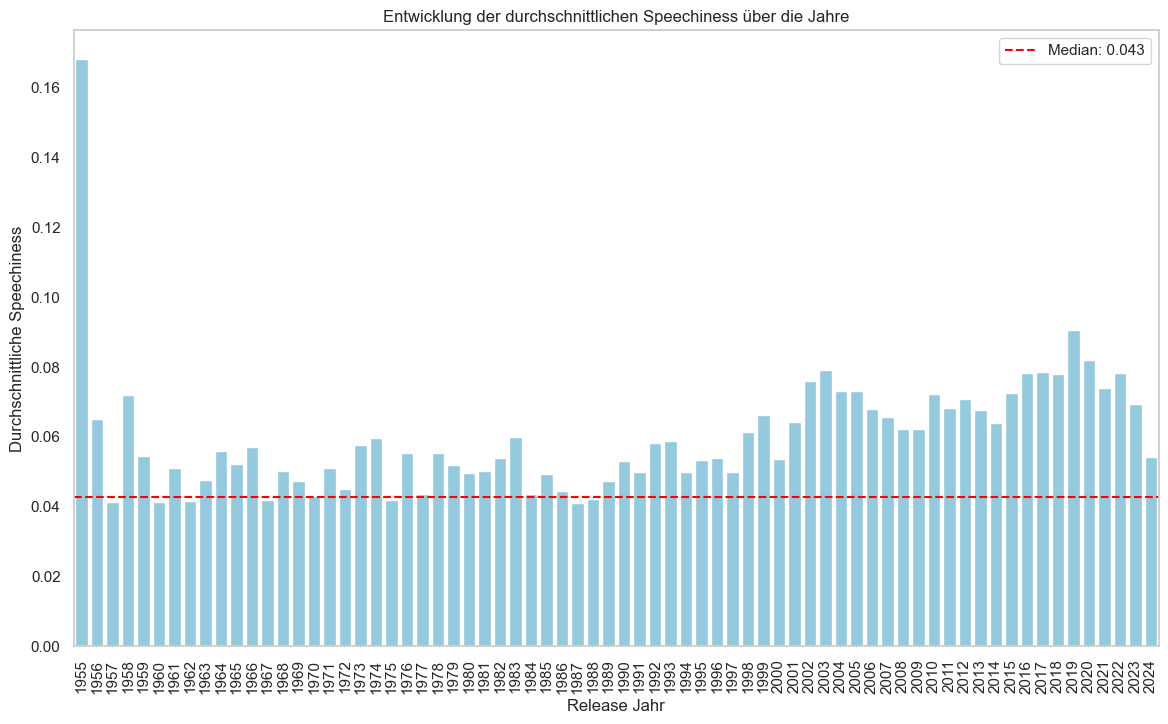

In [33]:
# Erstelle ein DataFrame mit den durchschnittlichen Speechiness-Werten pro Jahr

mean_speechiness_per_year = df1.groupby('Release Year')['Speechiness'].mean()

# Erstelle das Histogramm für die durchschnittliche Speechiness pro Jahr
plt.figure(figsize=(14, 8))
sns.barplot(x=mean_speechiness_per_year.index, y=mean_speechiness_per_year.values, color='skyblue')

# Berechne den Gesamtmittelwert der Speechiness
overall_median_speechiness = df1['Speechiness'].median()

# Füge die Mittelwertlinie hinzu
plt.axhline(y=overall_median_speechiness, color='red', linestyle='--', label=f'Median: {overall_median_speechiness:.3f}')

plt.title('Entwicklung der durchschnittlichen Speechiness über die Jahre')
plt.xlabel('Release Jahr')
plt.ylabel('Durchschnittliche Speechiness')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()


An diesem Diagramm sieht man, dass der gesprochene Wortanteil in den Songs seit den 2000ern stark zugenommen hat - meine Interpretation wäre hier, dass die Rapmusik und die moderne Popmusik zu diesem Zeitpunkt in der Gesellschaft so richtig angekommen ist.

Als nächstes untersuche ich die Entwicklung der Loudness, also der wahrgenommenen Lautstärke in dB über die Jahre.

### 3.7 Entwicklung von Loudness nach Releasejahr

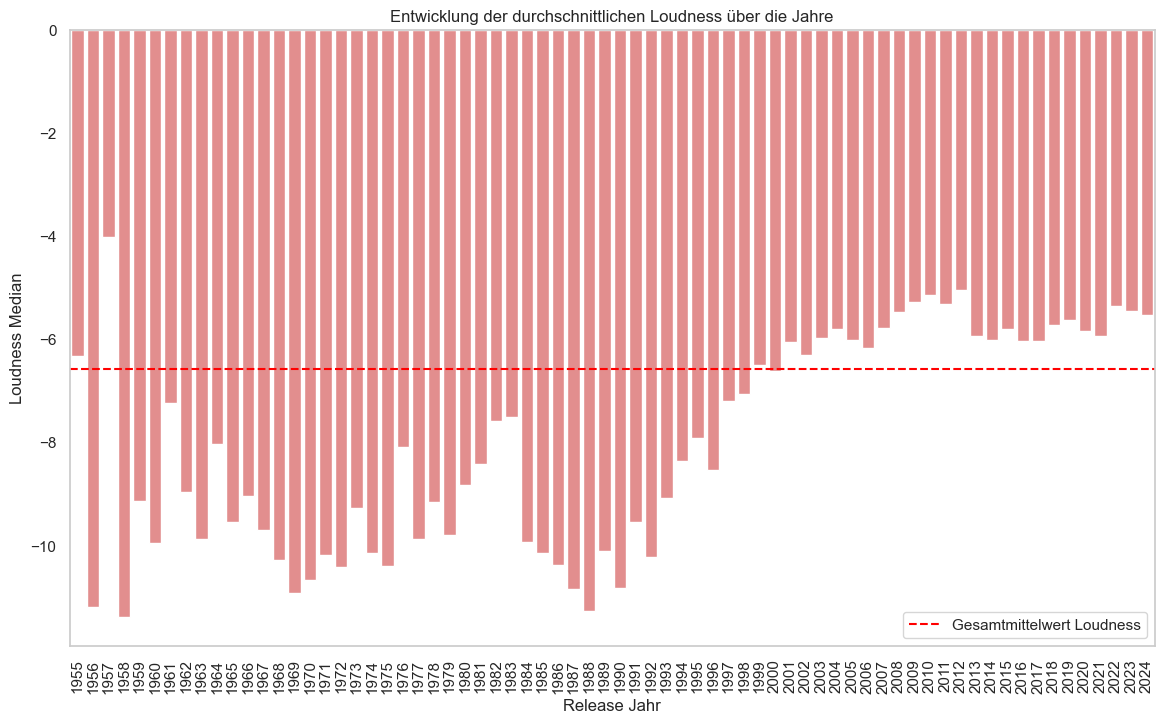

In [34]:
# Erstelle ein DataFrame mit den durchschnittlichen Loudness-Werten pro Jahr
median_loudness_per_year = df1.groupby('Release Year')['Loudness'].median()

# Erstelle das Histogramm für die durchschnittliche Loudness pro Jahr
plt.figure(figsize=(14, 8))
sns.barplot(x=median_loudness_per_year.index, y=median_loudness_per_year.values, color='lightcoral')

# Berechne den Gesamtmittelwert der Loudness
overall_median_loudness = df1['Loudness'].median()

# Füge die Mittelwertlinie hinzu
plt.axhline(y=overall_median_loudness, color='red', linestyle='--', label='Gesamtmittelwert Loudness')

plt.title('Entwicklung der durchschnittlichen Loudness über die Jahre')
plt.xlabel('Release Jahr')
plt.ylabel('Loudness Median')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()


Wie man sieht, lag der durchschnittliche Loudness-Wert (mit Schwankungen) bis etwa 1990 meist zwischen -8 und -10.

Seit 1990 bis 2012 ist die Loudness durchgängig gestiegen, was bedeutet, dass die Stücke lauter werden. 2012 gab es einen Höchststand. Das war die Zeit, in der Dubstep erfolgreich war. 

Danach waren die Stücke bis etwa 2020 wieder etwas leiser und pendelten sich bei etwa -6dB ein. Ab 2022 gibt es eine weitere Lautstärkezunahme.
Achtung: Die absolute Verteilung der Stücke muss hier berücksichtigt werden, nach 2022 werden es wieder weniger Samples (2022 bis 2024 nur noch 123 insgesamt).

Die Entwicklung seit den 1990ern hat auch mit der Entwicklung der digitalen Medien, der digitalen Aufnahme und der CD zu tun - durch die neuen Werkzeuge konnte eine höhere Lautstärke bei guter Qualität erzielt werden. Hier kann man auch wunderbar den sogenannten 'Loudness War' nachvollziehen. Das war eine Art Wettstreit, sich gegenseitig in der Lautstärke zu übertrumpfen. Ein als lauter empfundenes Lied fällt uns auf und gefällt uns meist auch besser. 
Stück für Stück wurden aber Standards in Radio und Fernsehen eingeführt und auch die Streamingdienste fingen an, alle Stücke zu normalisiern, als auf das gleiche Level zu bringen. So fielen die Vorteile und damit auch die Anreize weg, Stücke extrem laut zu produzieren. 

Als nächstes untersuche ich noch die Korrelationen zwischen den Werten.

### 3.8 Korrelationsmatrix

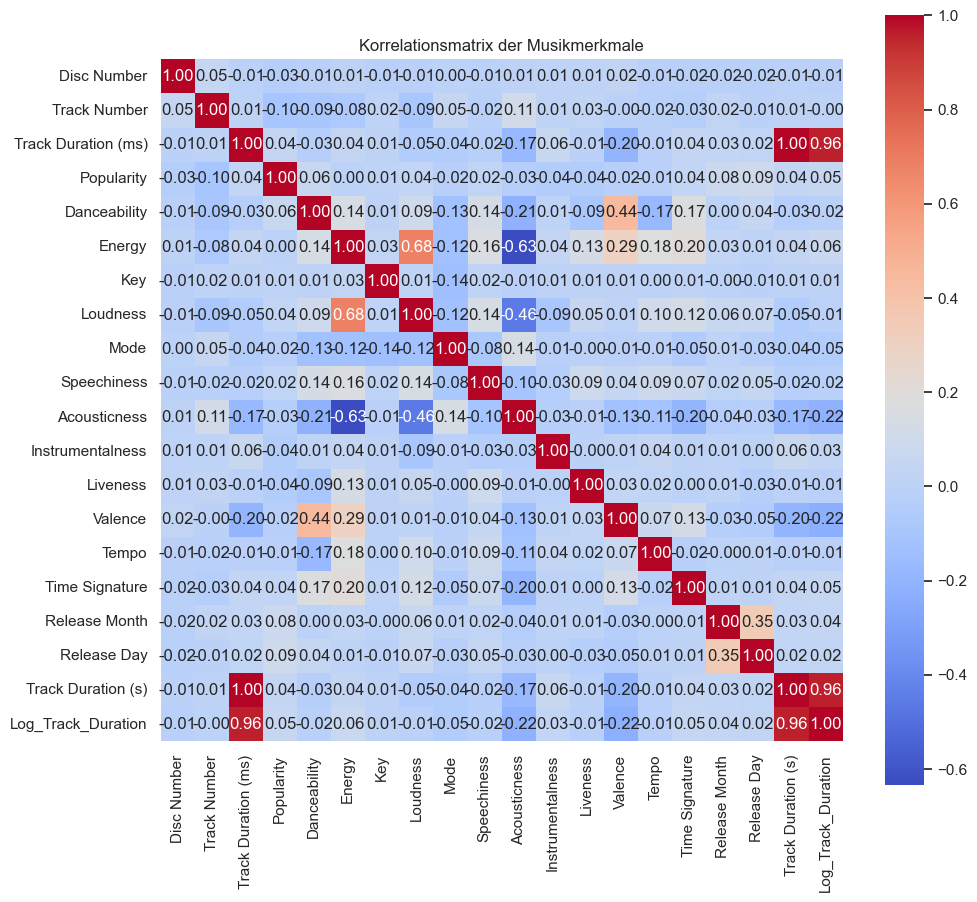

                     Disc Number  Track Number  Track Duration (ms)  \
Disc Number             1.000000      0.047990            -0.006323   
Track Number            0.047990      1.000000             0.008495   
Track Duration (ms)    -0.006323      0.008495             1.000000   
Popularity             -0.031153     -0.103605             0.037141   
Danceability           -0.013940     -0.091411            -0.033459   
Energy                  0.007694     -0.076130             0.035860   
Key                    -0.009747      0.015286             0.008974   
Loudness               -0.014904     -0.089534            -0.049350   
Mode                    0.003591      0.049401            -0.044958   
Speechiness            -0.005577     -0.019699            -0.023430   
Acousticness            0.007766      0.109436            -0.172539   
Instrumentalness        0.013708      0.010721             0.058701   
Liveness                0.014091      0.028928            -0.006852   
Valenc

In [35]:
# Nur numerische Spalten auswählen
numerical_df1 = df1.select_dtypes(include=['float64', 'int64'])

# Korrelationsmatrix berechnen
correlation_matrix = numerical_df1.corr()

# Heatmap erstellen
plt.figure(figsize=(11, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der Musikmerkmale')
plt.show()
print(correlation_matrix)

#### Betrachtung der Korrelationsmatrix 

Die Korrelationsmatrix zeigt einige recht stark miteinander korrelierende Werte.

Loudness und Energy stark miteinander mit einem Wert von 0.68.<br>
Ebenfalls stark korrelieren Acousticness und Energy negativ miteinander mit -0.63.<br>
Weiterhin mittelstark miteinander korrelieren Danceability und Valence mit 0.44, sowie und Loudness mit Release Year mit 0.43.<br>
Diese Werte schaue ich mir noch ein mal genauer an.

Den Zusammenhang zwischen Release Month und Release Day ignoriere ich.


#### statistische Tests auf Korrelationen

Nun führe ich statistische Tests auf die Korrelationen durch: 

Der Korrelations-Signifikanztest testet, ob die Korrelation statistisch bedeutsam ist.<br>
Das Konfidenzintervall für Korrelation schätzt ab, wie genau die Korrelationsschätzung ist.<br>
Einfache Lineare Regression testet, ob ein Zusammenhang den anderen vorhersagen kann.<br>

In [36]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Loudness'\n")

import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Energy'], df1['Loudness'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Loudness'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Loudness'

Korrelation: 0.6844
P-Wert: 0.000000
Signifikant (p<0.05): Ja
95% Konfidenzintervall: [0.6731, 0.6953]
Regressionsgerade: y = -15.3338 + 11.7359*x
R² = 0.4683
P-Wert der Regression: 0.000000
Standardfehler: 0.1326


Auswertung:

r = 0,679 ist eine starke positive Korrelation<br>
P-Wert < 0.00000 hochsignifikantes Ergebnis - dieser Zusammenhang existiert auch in der Spotify-Gesamtpopulation<br>
Konfidenzintervall [0,668 - 0,689] ist sehr schmal - die Einschätzung ist präzise

lineare Regression:

Es gibt einen Zusammenhang, über die Regression eine Formel gefunden werden: 

Loudness = -15,22 + 11.7352 * Energy<br>
Ein Song mit Energy = 0,5 hat etwa -9,4 dB Loudness<br>
Ein Song mit Energy = 0,8 hat etwa -5,9 dB Loudness<br>

Steigt Energy um 0,1 Punkte, wird der Song um 1,16 dB lauter

R² = 0,468 bedeutet: Energy erklärt 47% der Varianz in der Lautstärke<br>
Standardfehler = 0,13 ist klein - zuverlässige Schätzung der Regression.

Das bedeutet: Energiereichere Songs sind eindeutig lauter produziert! 

Das Ergebnis verwundert aber nur wenig, da die Spotify-Attribute für Energy die Loudness mit einbeziehen.

In [37]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Acousticness'\n")

import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Energy'], df1['Acousticness'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Acousticness'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Korrelationstests für den Zusammenhang zwischen 'Energy' und 'Acousticness'

Korrelation: -0.6347
P-Wert: 0.000000
Signifikant (p<0.05): Ja
95% Konfidenzintervall: [-0.6470, -0.6222]
Regressionsgerade: y = 0.7782 + -0.8288*x
R² = 0.4029
P-Wert der Regression: 0.000000
Standardfehler: 0.0107


Auswertung

r = -0,6347 ist eine starke negative Korrelation. <br>
P-Wert < 0.00000: hochsignifikantes Ergebnis. <br>
Konfidenzintervall [-0,638 bis -0,614] ist sehr schmal, die Einschätzung ist präzise.

Regression:
Es konnte ein linearer Zusammenhang gefunden werden:

Acousticness = 0,77 - 0,83 * Energy <br>
Steigt Energy um 0,1 Punkte, sinkt Acousticness um 0,082 Punkte<br>
R² = 0,4: Energy erklärt 40% der Varianz in der Akustik<br>
Standardfehler = 0,010 ist sehr klein zuverlässige Schätzung der Regression.

Ein Song mit Energy = 0,2 hat etwa Acousticness = 0,60 (sehr akustisch)<br>
Ein Song mit Energy = 0,8 hat etwa Acousticness = 0,11 (kaum akustisch)

Das bedeutet: 
Je energiegeladener ein Song, desto weniger akustisch ist er. Akustische Instrumente werden eher in ruhigeren, nicht sehr energiegeladenen Songs gespielt.

In [38]:
#Test für den Zusammenhang zwischen Energy und Loudness
print("Korrelationstests für den Zusammenhang zwischen 'Danceability' und 'Valence'\n")

from scipy.stats import pearsonr

# Für Energy ↔ Loudness (ersetze die Variablennamen für andere Tests)
correlation, p_value = pearsonr(df1['Danceability'], df1['Valence'])

print(f"Korrelation: {correlation:.4f}")
print(f"P-Wert: {p_value:.6f}")
print(f"Signifikant (p<0.05): {'Ja' if p_value < 0.05 else 'Nein'}")

# Fisher Z-Transformation für Konfidenzintervall
n = len(df1)
z = np.arctanh(correlation)
se = 1/np.sqrt(n-3)
ci_lower = np.tanh(z - 1.96*se)
ci_upper = np.tanh(z + 1.96*se)

print(f"95% Konfidenzintervall: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Lineare Regression (Energy als x, Loudness als y)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Danceability'], df1['Valence'])

print(f"Regressionsgerade: y = {intercept:.4f} + {slope:.4f}*x")
print(f"R² = {r_value**2:.4f}")
print(f"P-Wert der Regression: {p_value:.6f}")
print(f"Standardfehler: {std_err:.4f}")

Korrelationstests für den Zusammenhang zwischen 'Danceability' und 'Valence'

Korrelation: 0.4392
P-Wert: 0.000000
Signifikant (p<0.05): Ja
95% Konfidenzintervall: [0.4223, 0.4559]
Regressionsgerade: y = 0.1505 + 0.7203*x
R² = 0.1929
P-Wert der Regression: 0.000000
Standardfehler: 0.0156


Auswertung:

r = 0,44 ist eine moderate positive Korrelation<br>
P-Wert < 0.0000 bedeutet: hochsignifikant, es gibt auf jeden Fall einen Zusammenhang.<br>
Der Konfidenzintervall [0,422 bis 0,456] ist schmal, die Schätzung ist zuverlässig.

Regression:
Es konnte ein Zusammenhang gefunden werden:<br>
Valence = 0,15 + 0,72 * Danceability
Steigt Danceability um 0,1 Punkte, steigt Valence um 0,072 Punkte
R² = 0,193: Danceability erklärt 19,3% der Varianz in der Fröhlichkeit
Standardfehler = 0,016 ist klein, die Regression konnte zuverlässig vorhergesagt werden.

Ein Song mit Danceability = 0,3 hat etwa Valence = 0,36 (eher traurig)
Ein Song mit Danceability = 0,8 hat etwa Valence = 0,73 (sehr fröhlich)
Fazit: Tanzbare Songs sind eher fröhlicher.

Es gibt anscheinend fröhliche und traurige tanzbare Songs. Tendenziell sind mehr fröhlich. 
Außerdem gibt es noch fröhliche Songs, die nicht tanzbar sind, trotzdem ist die Tendenz da: Tanzbare Songs sind auch eher fröhlich.

Es folgt noch ein Residuen-Test, um zu sehen, ob die lineare Regression überhaupt sinnvolle Werte ergeben kann. 
Dazu schaue ich mir noch die Residualverteilung an und teste, ob die Daten normalverteilt sind und damit, ob die lineare Regression aussagekräftig ist.

ANALYSE 1: Energy → Loudness
----------------------------------------
R²: 0.4683
p-Wert: 0.000000
Mittlere Residuen: -0.000000
Std. Residuen: 2.4230
Shapiro-Wilk p-Wert: 0.000000 (Nicht normal)


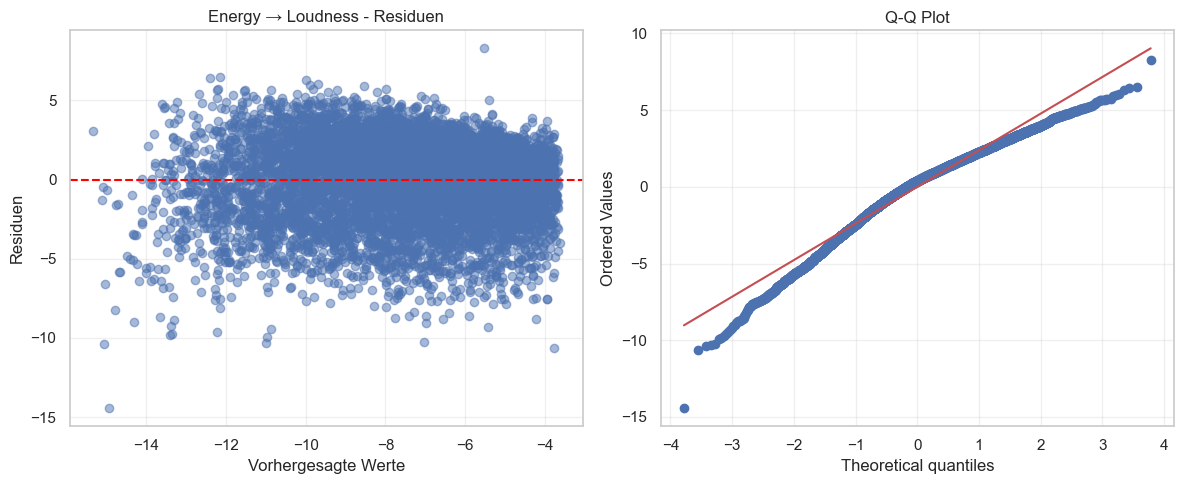


ANALYSE 2: Energy → Acousticness
----------------------------------------
R²: 0.4029
p-Wert: 0.000000
Mittlere Residuen: 0.000000
Std. Residuen: 0.1955
Shapiro-Wilk p-Wert: 0.000000 (Nicht normal)


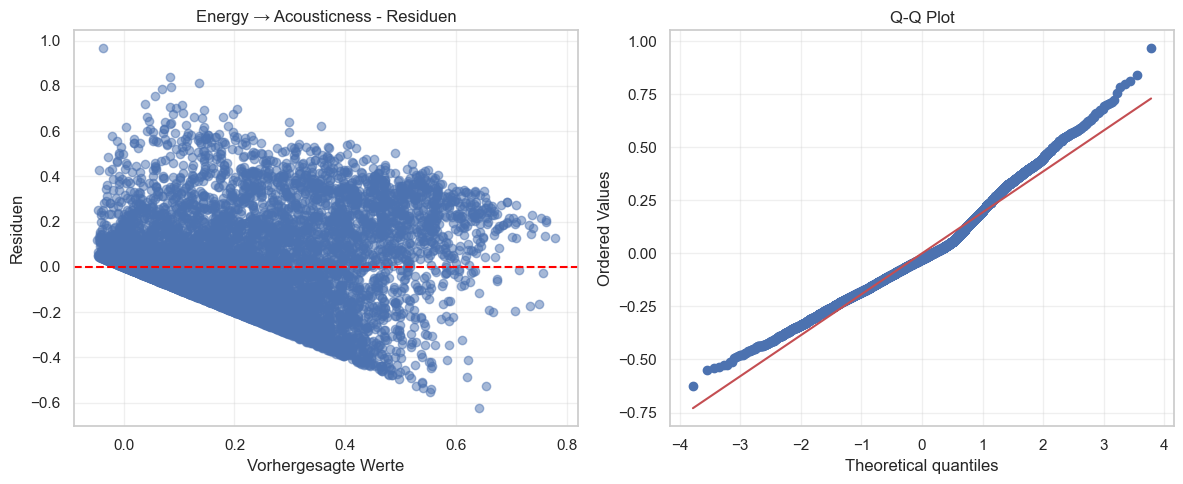


ANALYSE 3: Danceability → Valence
----------------------------------------
R²: 0.1929
p-Wert: 0.000000
Mittlere Residuen: -0.000000
Std. Residuen: 0.2150
Shapiro-Wilk p-Wert: 0.000000 (Nicht normal)


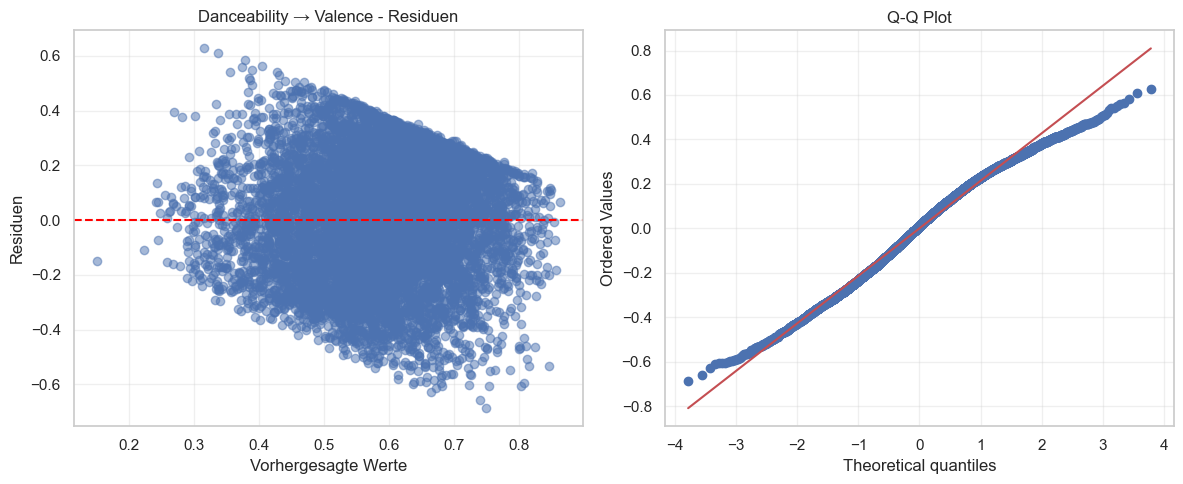

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# =============================================================================
# ANALYSE 1: Energy → Loudness
# =============================================================================
print("ANALYSE 1: Energy → Loudness")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Loudness'])
y_pred = slope * df1['Energy'] + intercept
residuals = df1['Loudness'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Energy → Loudness - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# ANALYSE 2: Energy → Acousticness
# =============================================================================
print("\nANALYSE 2: Energy → Acousticness")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Energy'], df1['Acousticness'])
y_pred = slope * df1['Energy'] + intercept
residuals = df1['Acousticness'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Energy → Acousticness - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# ANALYSE 3: Danceability → Valence
# =============================================================================
print("\nANALYSE 3: Danceability → Valence")
print("-" * 40)

# Regression berechnen
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['Danceability'], df1['Valence'])
y_pred = slope * df1['Danceability'] + intercept
residuals = df1['Valence'] - y_pred

# Werte ausgeben
print(f"R²: {r_value**2:.4f}")
print(f"p-Wert: {p_value:.6f}")
print(f"Mittlere Residuen: {np.mean(residuals):.6f}")
print(f"Std. Residuen: {np.std(residuals):.4f}")

# Normalverteilungstest
sample_size = min(5000, len(residuals))
sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk p-Wert: {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Nicht normal'})")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(y_pred, residuals, alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Vorhergesagte Werte')
ax1.set_ylabel('Residuen')
ax1.set_title('Danceability → Valence - Residuen')
ax1.grid(True, alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Fazit: Wir konnten drei recht stark korrelierende Werte finden und einen direkten Zusammenhang aufzeigen. Die Werte sind aber nicht normalverteilt, weshalb der lineare Zusammenhang fragwürdig ist. Der Zusammenhang kann also nur als Annäherung verstanden werden.

Was wir sagen können: Energy hängt mit Loudness positiv und mit Acousticness negativ zusammen. Die meisten Songs mit akustischen Instrumenten sind also eher ruhig und nicht energiegeladen. Und lautere Songs haben auch mehr Energie, bzw. energische Songs werden lauter gemischt. 
Außerdem hängen Danceability und Valence positiv zusammen, viele tanzbare Songs auch fröhlich.

### 3.9 Clusteranalyse

Ich habe mir noch die Frage gestellt, ob es einen Zusammenhang zwischen Danceability, Energy und Loudness gibt. Dazu habe ich eine Clusteranalyse durchgeführt.

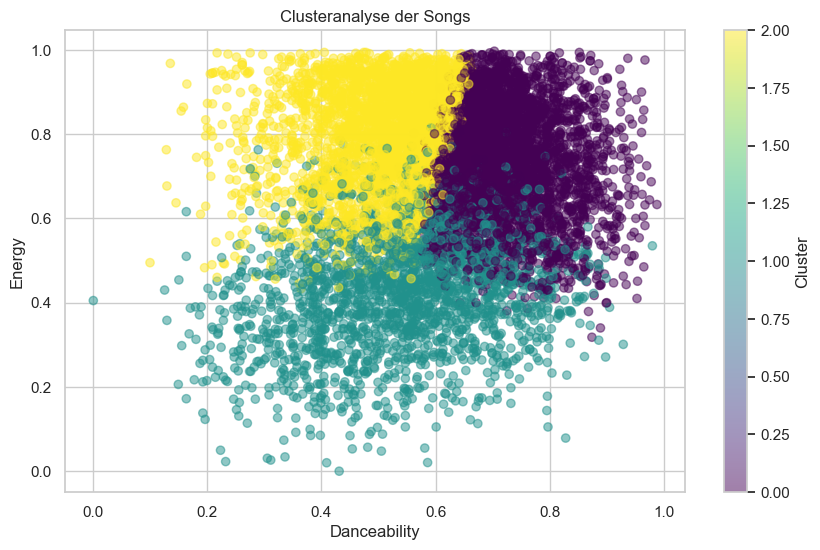

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Wähle die Variablen für die Clusteranalyse
X = df1[['Danceability', 'Energy', 'Loudness']]

# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means-Clusteranalyse durchführen
kmeans = KMeans(n_clusters=3, random_state=42)  # Anzahl der Cluster
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster visualisieren
plt.figure(figsize=(10, 6))
plt.scatter(df1['Danceability'], df1['Energy'], c=df1['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusteranalyse der Songs')
plt.colorbar(label='Cluster')
plt.show()


Ich sehe leider keine starke Clusterbildung, anscheinend hängen Danceability, Energy und Loudness nicht statistisch relevant zusammen.

### Fazit der Statistischen Auswertung von DF1

Ich konnte einige spannende Punkte bezüglich meiner Fragestellung herausfinden:

- Die Songs sind eher tanzbar und haben eine hohe Energie
- Das Tempo pegelt sich zwischen 120 und 140 ein
- Die meisten Songs sind im 4/4 Takt
- Die meisten Songs sind Studioproduktionen
- Die meisten Songs sind nicht akustisch
- Die Stimmung ist eher positiv
- Die häufigsten Tonarten sind: C-Dur, G:Dur, D-Dur und A-Dur
- Nur etwa ein Drittel der Songs sind in Moll

Entwicklungen:

- Die Länge der Songs nimmt über die Jahre ab
- Moll ist über die Jahre stärker vertreten
- Akustische Songs sind nur wenig vertreten
- Der Wortanteil hat seit 2001 zugenommen
- Die Loudness hat über die Jahre zugenommen

Korrelationen:

    -starke Korrelationen:
        - Energy und Loudness korrelieren stark (0.68)
        - Acousticness und Energy korrelieren stark negativ (-0.63)

    - mittelstarke Korrelationen:
        - Danceability und Valence mit (0.44)
        - Loudness und Release Year mit (0.43)

Diese Zusammenhänge lassen sich aber nicht mit einer linearen Regression vorhersagen.

# 4. Vergleiche zwischen den Datensätzen

In diesem Teil widme ich mich Gemeinsamkeiten und Unterschiede zwischen den Datensätzen. Ich teste die Ergebnisse aus Teil 1, indem ich sie an die große Menge von Daten aus df2 anlege und vergleiche.

Dieser Datensatz hat leider keine Release-Jahre, weshalb ich die Entwicklungen über die Zeit nicht nachvollziehen kann. Aber die Durchschnittswerte kann ich gut miteinander vergliechen.

In [41]:
# Schritt 1: Definiere die relevanten Spalten
df1['Track Duration (s)'] = df1['Track Duration (ms)']/1000
relevant_columns = ['Danceability','Energy','Key', 'Loudness', 'Mode', 'Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Track Duration (ms)', 'Track Duration (s)']
# Schritt 2: Erstelle das gefilterte DataFrame
filtered_df1 = df1[relevant_columns]
# Ausgabe des gefilterten DataFrames
filtered_df1.describe()


Danceability       Energy          Key     Loudness         Mode  \
count   8892.000000  8892.000000  8892.000000  8892.000000  8892.000000   
mean       0.605957     0.681209     5.183761    -7.339142     0.698605   
std        0.145956     0.193785     3.576717     3.323187     0.458889   
min        0.000000     0.000020     0.000000   -29.368000     0.000000   
25%        0.513000     0.554000     2.000000    -9.184500     0.000000   
50%        0.615000     0.710000     5.000000    -6.577000     1.000000   
75%        0.708000     0.836000     8.000000    -4.919000     1.000000   
max        0.988000     0.997000    11.000000     2.769000     1.000000   

       Speechiness  Acousticness  Instrumentalness     Liveness      Valence  \
count  8892.000000   8892.000000       8892.000000  8892.000000  8892.000000   
mean      0.064433      0.213593          0.030914     0.185976     0.586963   
std       0.060240      0.253028          0.127884     0.149422     0.239363   
min       0.000000      0.000003          0.000000     0.012000     0.000000   
25%       0.033000      0.018300          0.000000     0.089100     0.399000   
50%       0.042700      0.098500          0.000006     0.128000     0.599000   
75%       0.066600      0.332000          0.000650     0.246000     0.785000   
max       0.711000      0.991000          0.985000     0.989000     0.995000   

             Tempo  Track Duration (ms)  Track Duration (s)  
count  8892.000000         8.892000e+03         8892.000000  
mean    121.547076         2.234835e+05          223.483532  
std      26.371123         5.491778e+04           54.917782  
min       0.000000         6.009300e+04           60.093000  
25%     102.729500         1.906960e+05          190.696000  
50%     120.795500         2.183590e+05          218.359000  
75%     134.519750         2.494832e+05          249.483250  
max     217.913000         1.561133e+06         1561.133000

In [42]:
df2['Track Duration (s)'] = df2['Track Duration (ms)']/1000
df2.describe()

Danceability         Energy       Key       Loudness      Mode  \
count  725068.000000  725068.000000  725068.0  725068.000000  725068.0   
mean        0.551211       0.662144  5.280149      -7.656229   0.65595   
std         0.170964       0.235799  3.561978       3.705398  0.475058   
min         0.000000       0.000000       0.0     -60.000000       0.0   
25%         0.436000       0.496000       2.0      -9.487000       0.0   
50%         0.558000       0.697000       5.0      -6.873000       1.0   
75%         0.677000       0.864000       8.0      -5.052000       1.0   
max         0.993000       1.000000      11.0       4.882000       1.0   

         Speechiness   Acousticness  Instrumentalness       Liveness  \
count  725068.000000  725068.000000     725068.000000  725068.000000   
mean        0.086794       0.270209          0.083714       0.213084   
std         0.095994       0.305701          0.215244       0.183643   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.034900       0.009520          0.000000       0.098900   
50%         0.049100       0.128000          0.000039       0.136000   
75%         0.092400       0.488000          0.009210       0.279000   
max         0.966000       0.996000          1.000000       1.000000   

             Valence          Tempo  Track Duration (ms)  Track Duration (s)  
count  725068.000000  725068.000000         7.250680e+05       725068.000000  
mean        0.485661     122.512911         2.317569e+05          231.756910  
std         0.251735      29.686822         8.958136e+04           89.581356  
min         0.000000       0.000000         1.586000e+03            1.586000  
25%         0.280000      99.058000         1.837980e+05          183.798000  
50%         0.475000     120.691500         2.196530e+05          219.653000  
75%         0.687000     140.982000         2.632880e+05          263.288000  
max         1.000000     246.130000         5.764624e+06         5764.624000

Die Übersicht zeigt folgende Unterschiede: 

Folgende Werte sind in df1 höher als in df2:
Danceability, Energy, Loudness, Mode, Valence, Tempo, Track Duration

Folgende Werte sind in df1 niedriger als in df2:
Speechiness, Acousticness, Instrumentalness, Liveness

Da ich ja nach den herausstechenden Eigenschaften für Hits im Vergleich zu einer durchschnittlichen Menge von Songs suche, sind die Unterschiede besonders interessant. 

In [43]:
from matplotlib.colors import to_hex

cols = [
    'Danceability','Energy','Key','Loudness','Mode','Speechiness',
    'Acousticness','Instrumentalness','Liveness','Valence','Tempo',
    'Track Duration (s)'
]

s1 = df1[cols].agg(['mean','median']).T
s2 = df2[cols].agg(['mean','median']).T

means = pd.DataFrame({'df1 Mean': s1['mean'], 'df2 Mean': s2['mean']})
means['Mean Diff'] = means['df1 Mean'] - means['df2 Mean']
medians = pd.DataFrame({'df1 Median': s1['median'], 'df2 Median': s2['median']})
medians['Median Diff'] = medians['df1 Median'] - medians['df2 Median']
table = pd.concat([means, medians], axis=1)

# formatting
fmt = {col: '{:,.6f}'.format for col in table.columns}
for col in table.columns:
    if 'Track Duration' in col:
        fmt[col] = '{:,.2f}'.format

# color helpers
blue_bg = 'background-color: #cfefff'
orange_bg = 'background-color: #ffb3a7'

def highlight_cols(s):
    if s.name in ['df1 Mean','df1 Median']:
        return [blue_bg]*len(s)
    if s.name in ['df2 Mean','df2 Median']:
        return [orange_bg]*len(s)
    if 'Diff' in s.name:
        cmap = sns.diverging_palette(220, 20, as_cmap=True)
        vmin, vmax = table[s.name].min(), table[s.name].max()
        if vmax == vmin:
            return ['']*len(s)
        norm = (s - vmin) / (vmax - vmin)
        return [f'background-color: {to_hex(cmap(v))}' for v in norm.fillna(0)]
    return ['']*len(s)

display(table.style.format(fmt).apply(highlight_cols, axis=0))

Wie man sieht, sind die Unterschiede zwischen den Datensätzen nicht sehr groß. 

Am stärksten weicht Loudness ab, das ist um etwa 0.3 stärker in df1, die Songs sind also lauter. 
Auch Valence ist in df1 um etwa 0.1 stärker, die Songs sind also positiver.

Die anderen Unterschiede sind im zweiten Kommabereich, hier sind Danceability und Energy stärker in df1 und Acousticness schwächer.

Songlänge und Tempo weichen ein wenig voneinander ab, die Unterschiede sind im Median aber sehr klein, die Ausreißer sind in df2 einfach noch sehr viel weiter von den zentralen Werten entfernt. Das Tempo pendelt sich bei beiden Datensätzen um 120-121 bpm ein, die Songlänge (Median) ist etwas unter 220 Sekunden. 

Der Rest weicht kaum voneinander ab, was ich interessant finde. Anscheinend stechen die Spotify-Attribute der Hits nicht besonders hervor.

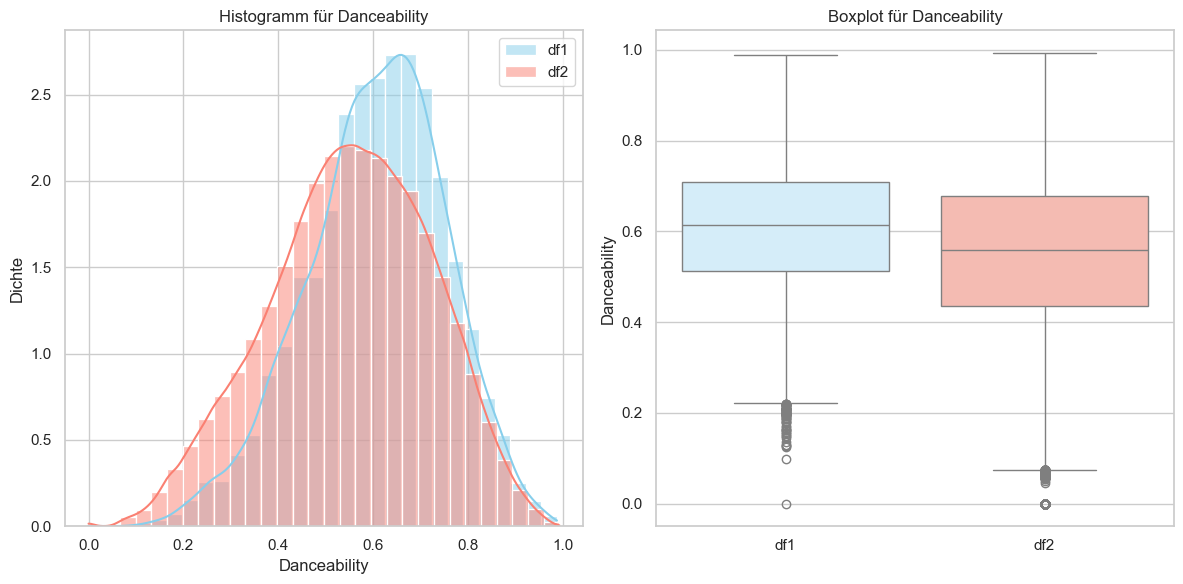

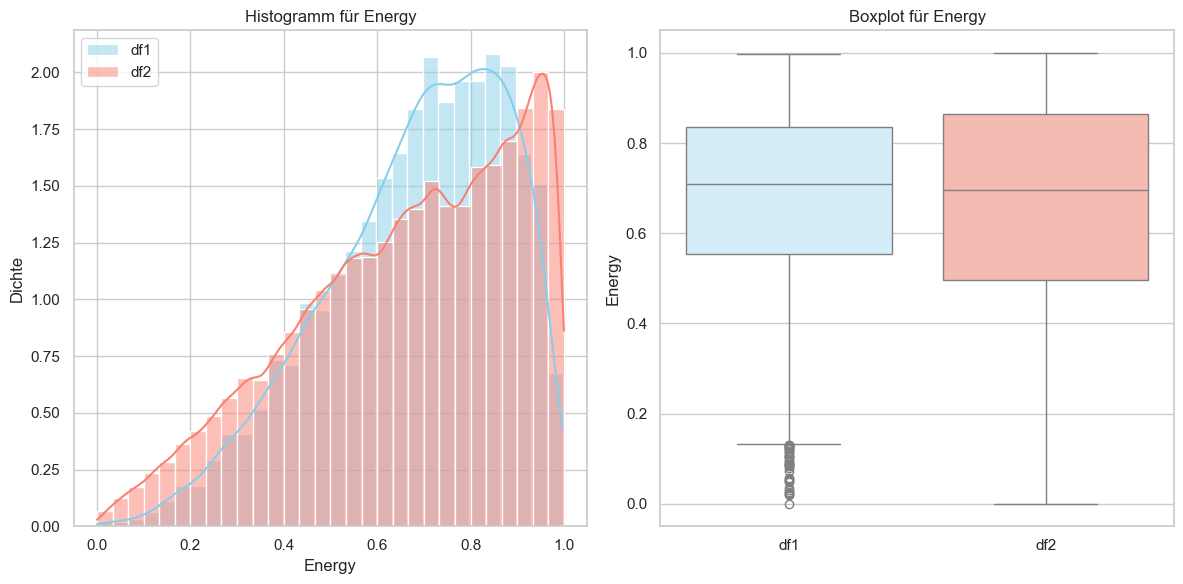

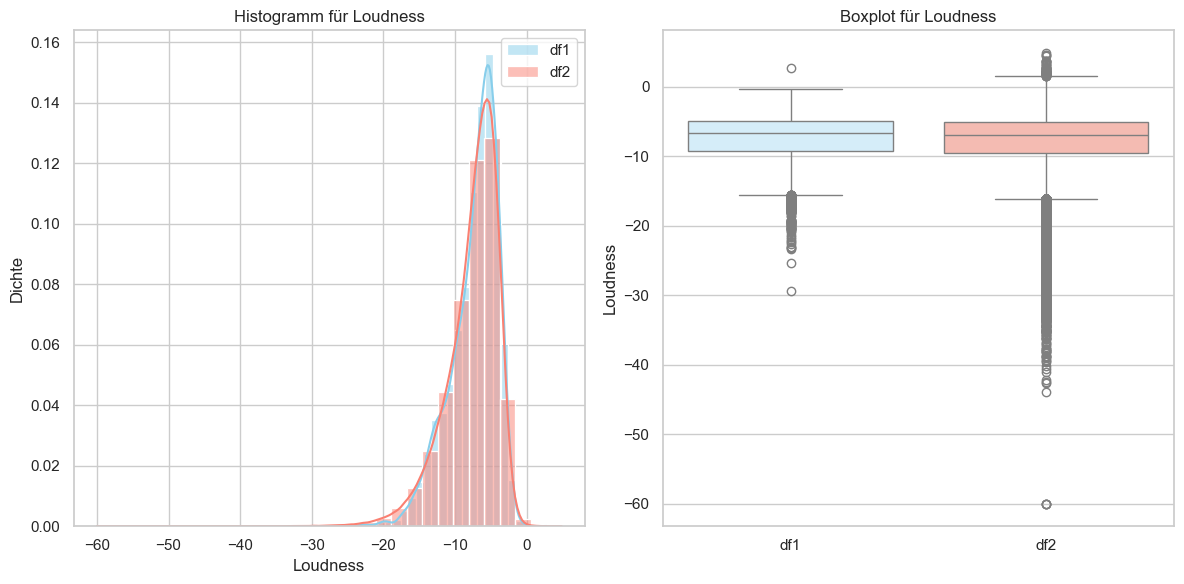

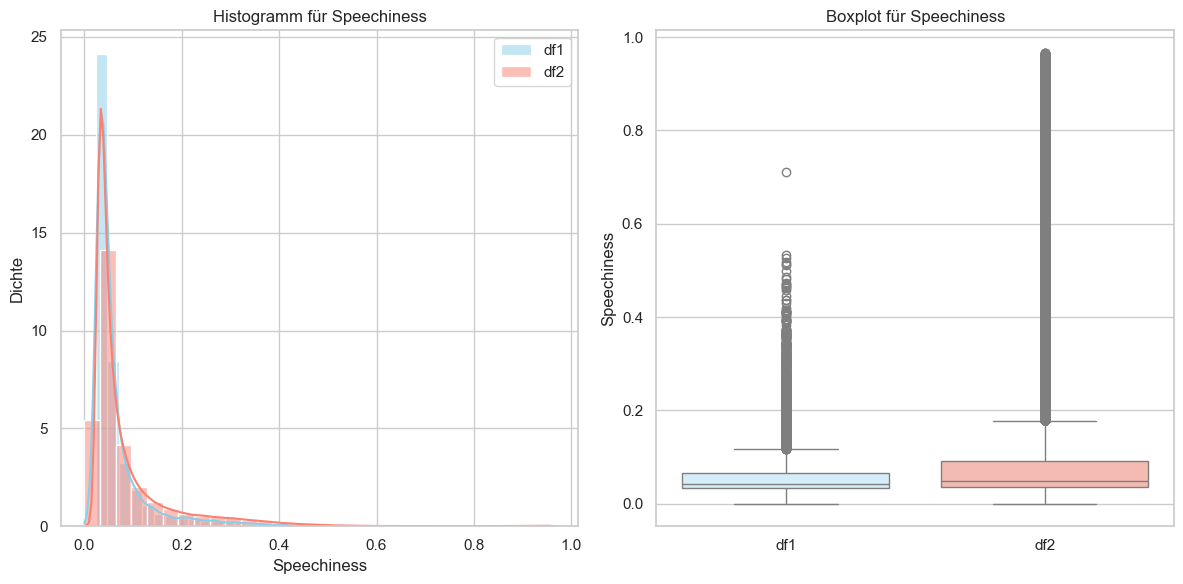

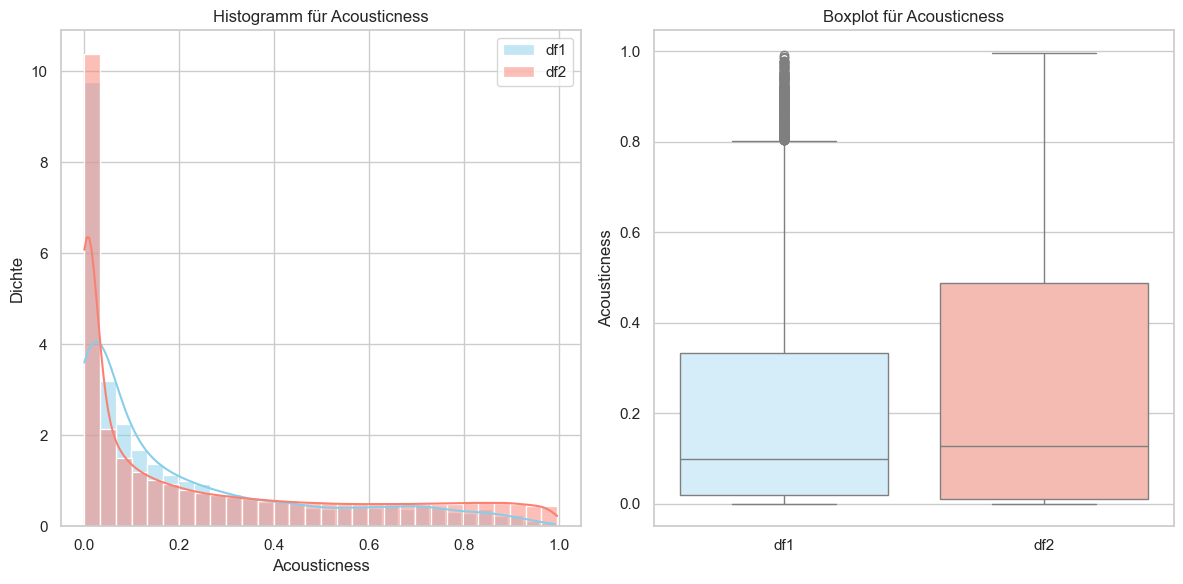

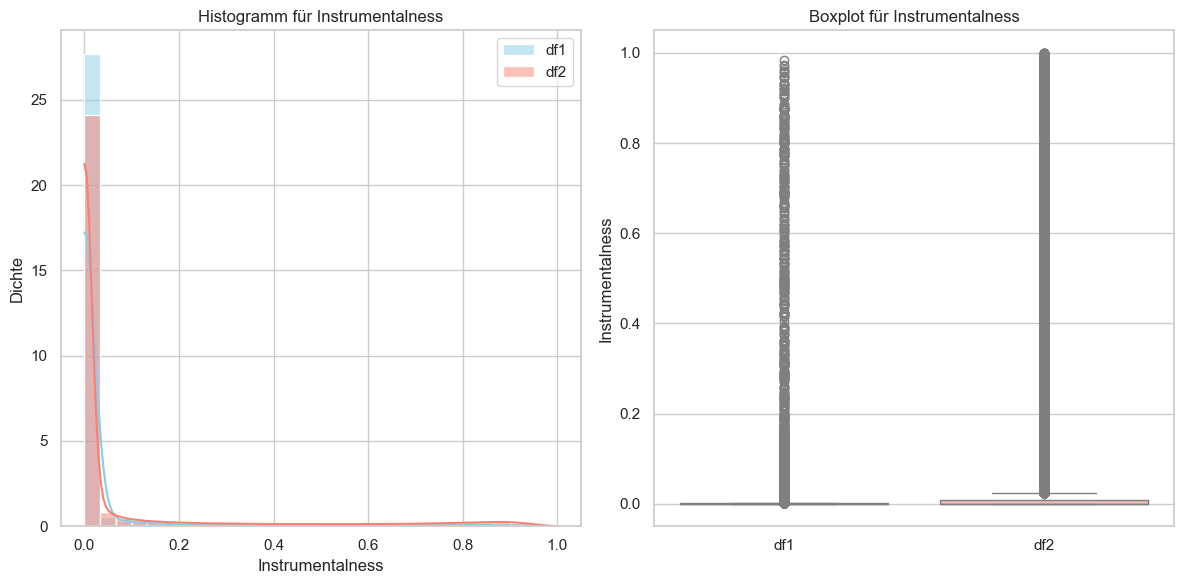

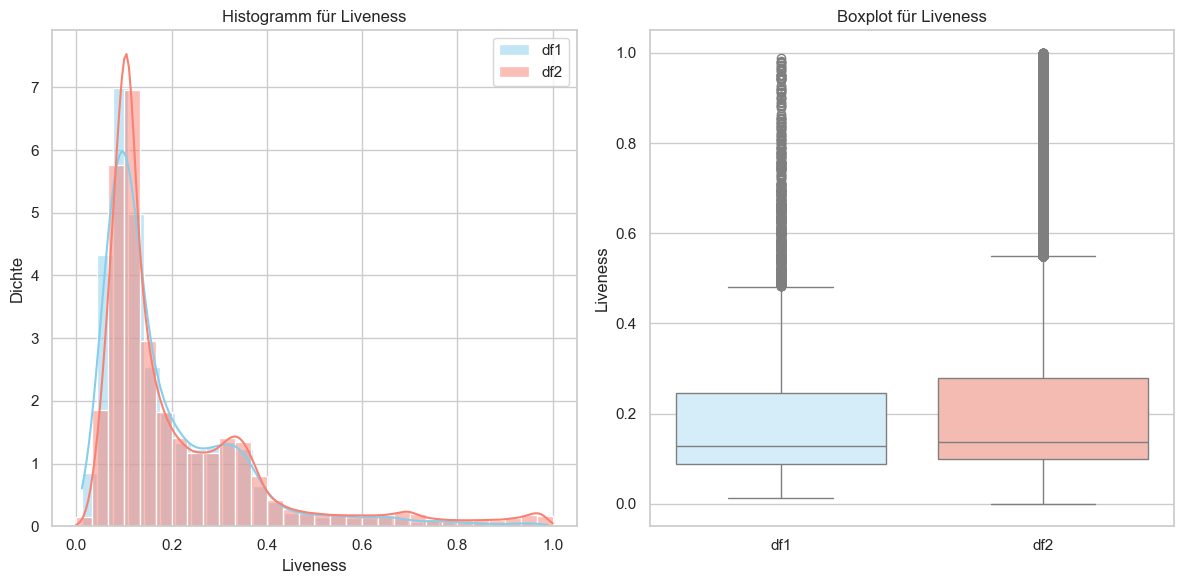

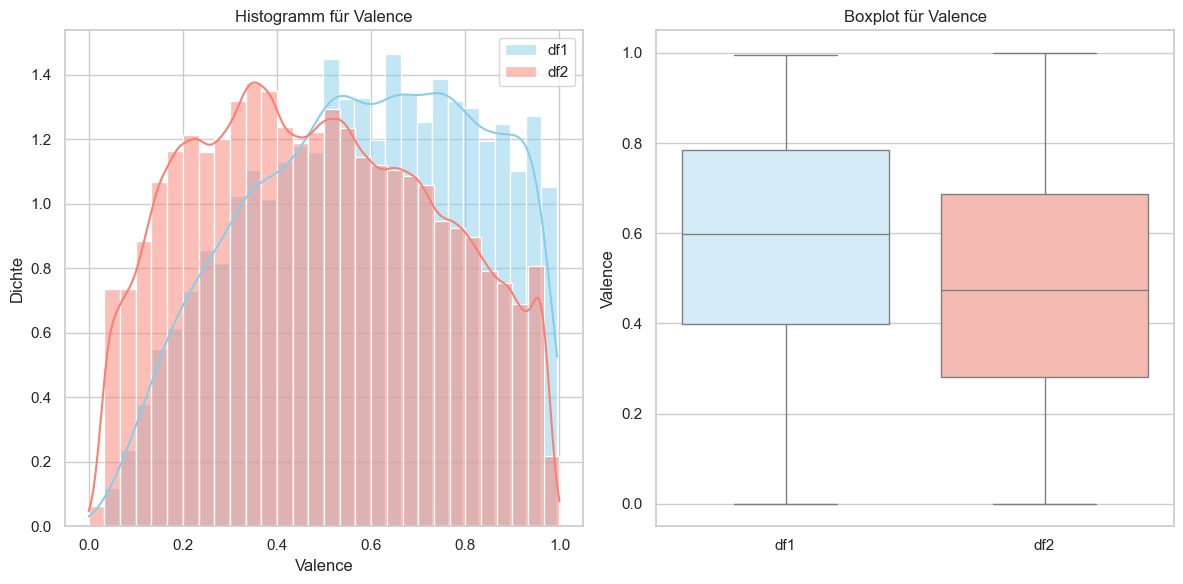

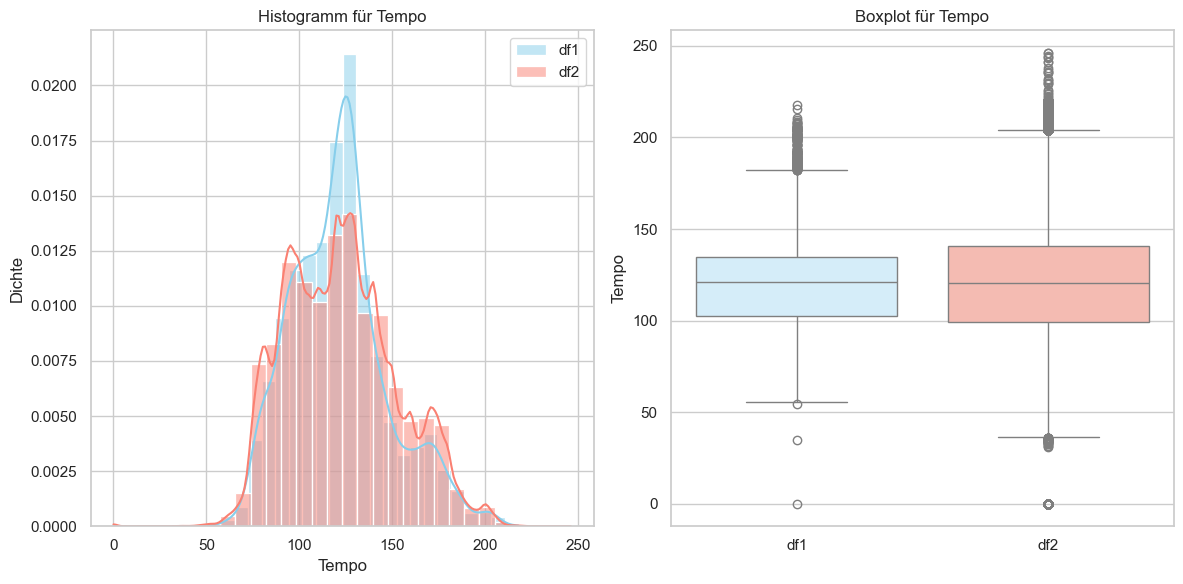

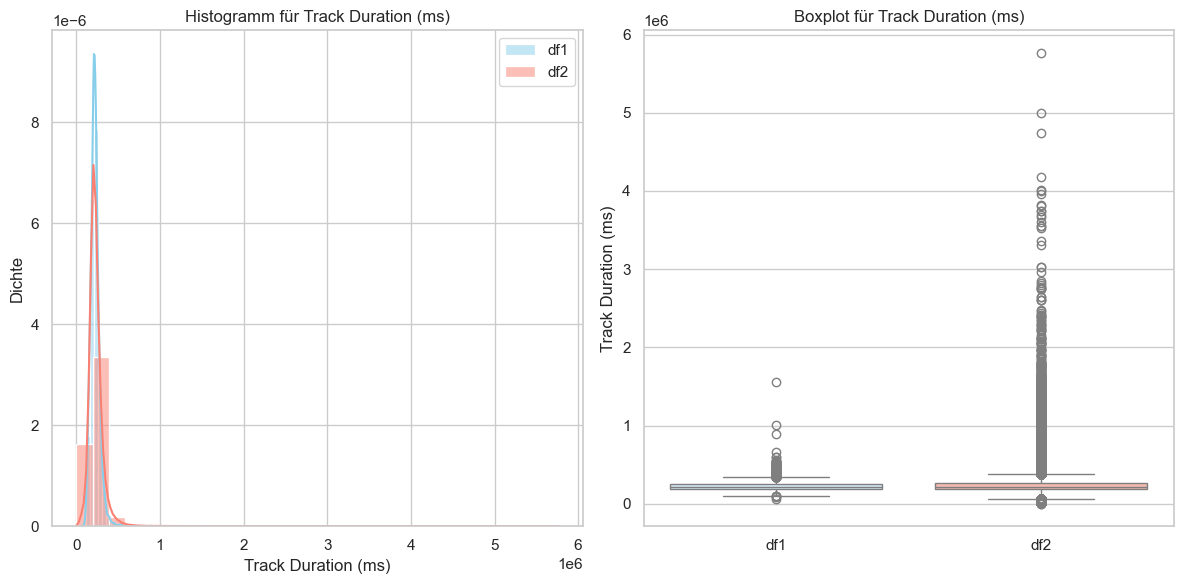

In [44]:
cols = [
    'Danceability','Energy','Loudness','Speechiness','Acousticness',
    'Instrumentalness','Liveness','Valence','Tempo','Track Duration (ms)'
]

for col in cols:
    a = df1[col]
    b = df2[col]

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.histplot(a, kde=True, color='skyblue', bins=30, stat='density', label='df1', alpha=0.5)
    sns.histplot(b, kde=True, color='salmon',  bins=30, stat='density', label='df2', alpha=0.5)
    plt.title(f'Histogramm für {col}'); plt.xlabel(col); plt.ylabel('Dichte'); plt.legend()

    plt.subplot(1,2,2)
    sns.boxplot(data=pd.DataFrame({'df1': a, 'df2': b}), palette=['#cfefff', '#ffb3a7'])
    plt.title(f'Boxplot für {col}'); plt.ylabel(col)

    plt.tight_layout()
    plt.show()

Die Dichteverteilung zeigt für Danceability und Valence eine höhere Dichte und Ansammlung in den höheren Bereichen als DF2. Energy ist in DF1 dichter um die Werte von 0.6 bis 0.8 gepackt, in DF2 breiter verteilt.  Loudness ist dichter um die Werte von -10. <br>
Speechiness, Instrumentalness und Track Duration sind dichter in den niedrigen Werten. Acousticness verteilt sich stärker in den positiven Bereich als in DF2.

Die Mittelwerte und Mediane liegen recht nah beieinander, jedoch kann man auch die Verteilung der Quartile miteinander vergleichen und hier ein paar Eigenschaften erkennen:

Eigenschaften der Hits:
- Der durchschnittliche Wert für Danceability ist etwas höher
- Energy konzentriert sich zwischen 0.6 und 0.8
- Loudness ist im Median höher, die Quartile aber ähnlich verteilt
- Speechiness ist niedriger
- Acousticness ist niedriger
- Instrumentalness ist deutlich niedriger
- Liveness ist etwas niedriger
- Valence ist etwas höher
- Tempo konzentriert sich mehr um die 120 herum

Instrumentalness und Track Duration sind schwer zu erkennen, deshalb schneide ich die größten Ausreißer ab und schaue sie mir noch mal an 

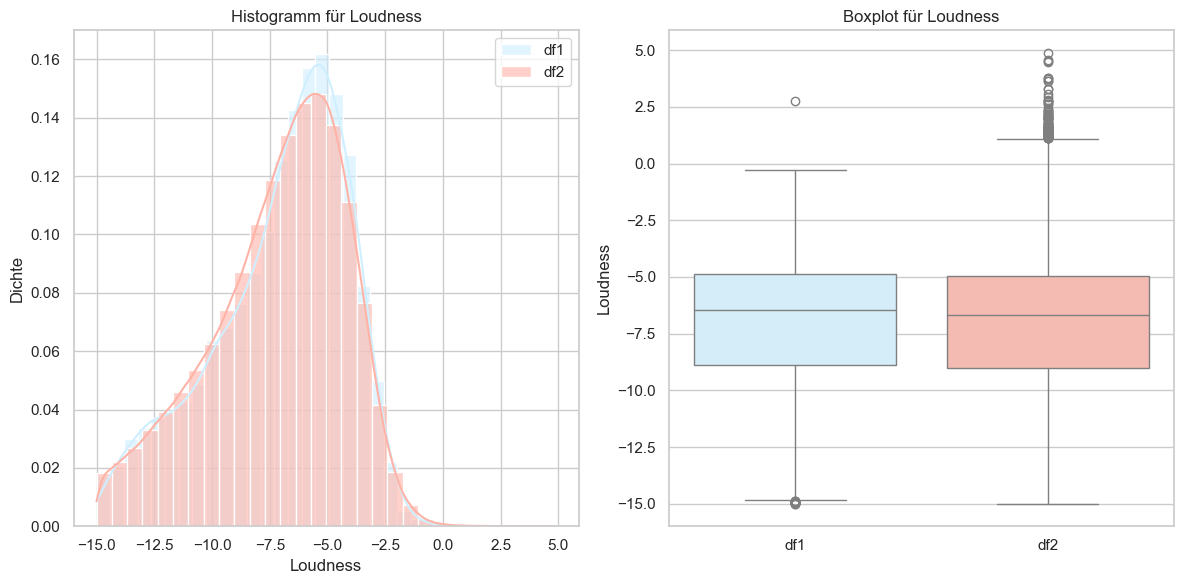

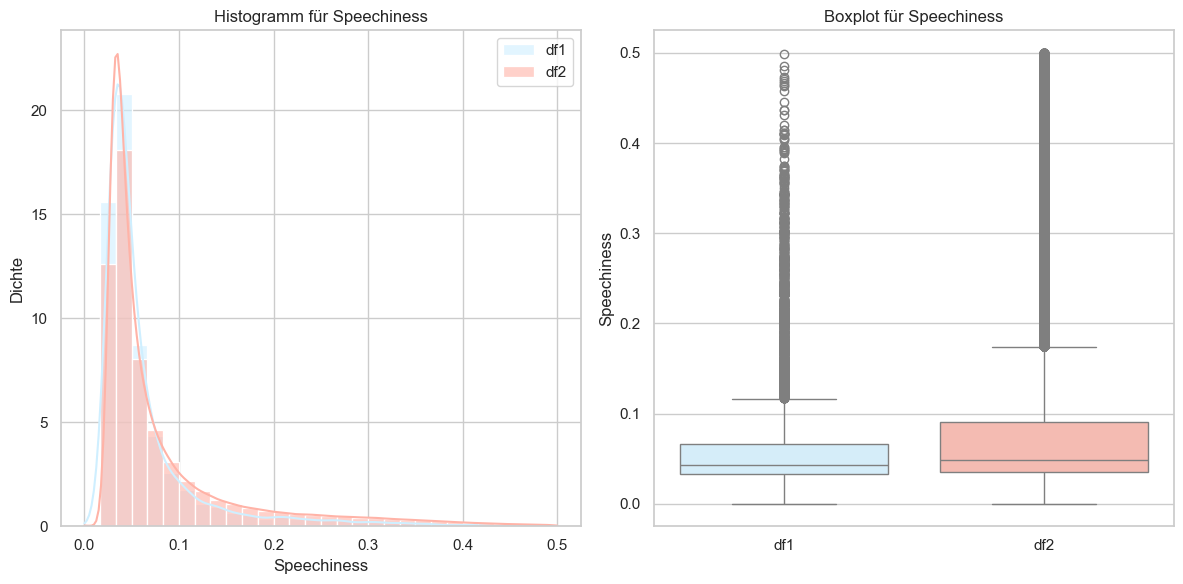

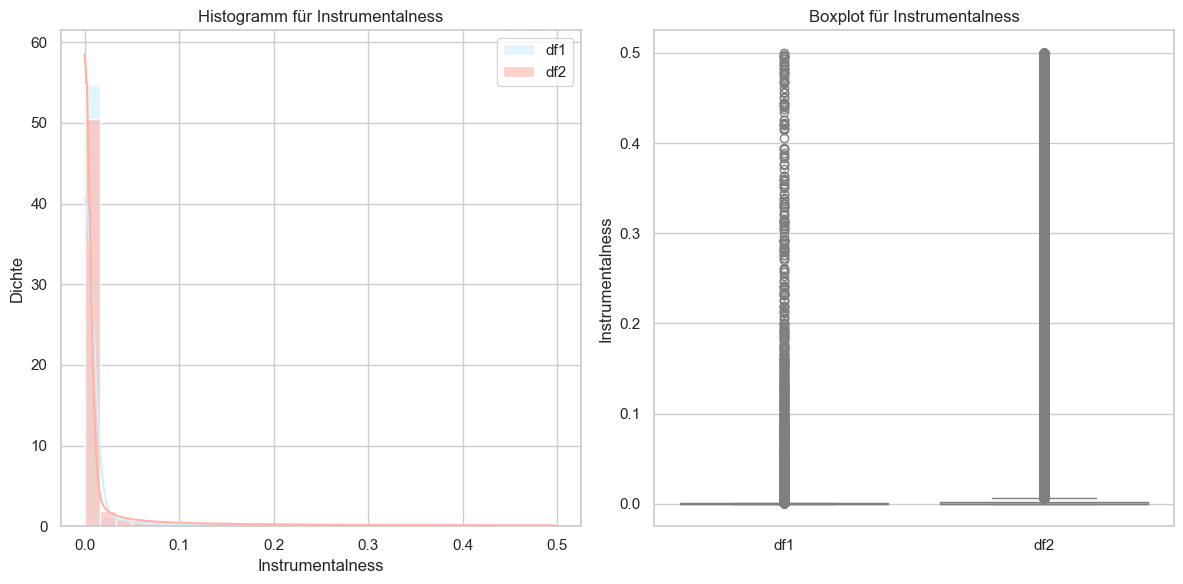

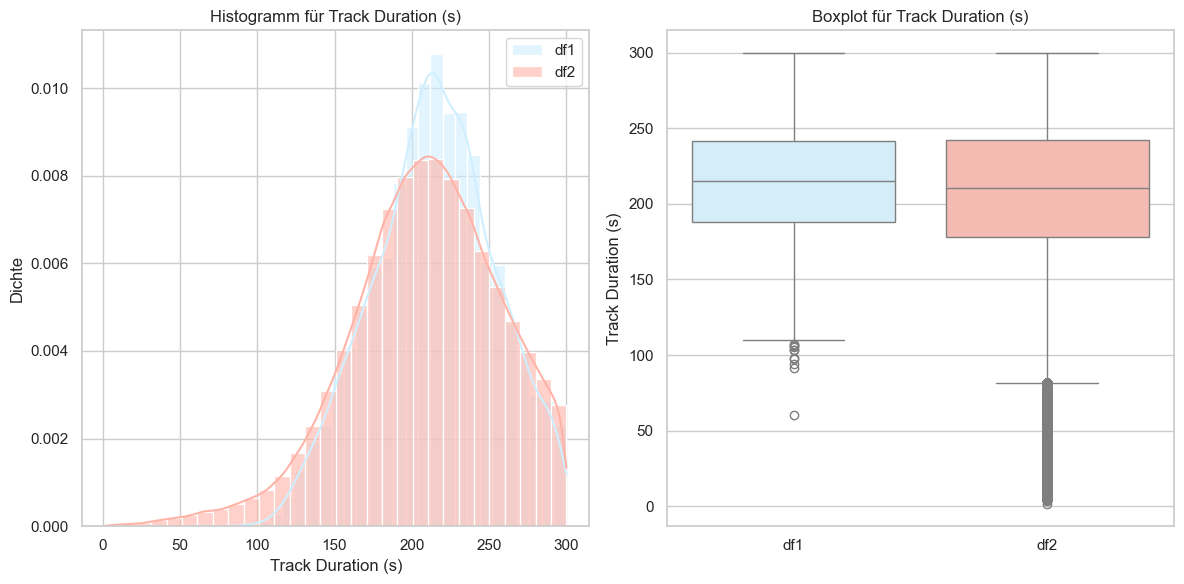

In [45]:
cols = [
    'Loudness', 'Speechiness', 'Instrumentalness', 'Track Duration (s)']

for col in cols:
    a = df1[col]
    b = df2[col]

    
     # für Speechiness: < 0.5
    if col == 'Speechiness':
        a = a[a <= 0.5]
        b = b[b <= 0.5]

    
    # für Loudness >= -15dB
    if col == 'Loudness':
        a = a[a >= -15]
        b = b[b >= -15]

    # für Instrumentalness: < 0.5
    if col == 'Instrumentalness':
        a = a[a <= 0.5]
        b = b[b <= 0.5]
    
    # für Track Duration nur <= 300 s
    if col == 'Track Duration (s)':
        a = a[a <= 300]
        b = b[b <= 300]

    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.histplot(a, kde=True, color='#cfefff', bins=30, stat='density', label='df1', alpha=0.6)
    sns.histplot(b, kde=True, color='#ffb3a7', bins=30, stat='density', label='df2', alpha=0.6)
    plt.title(f'Histogramm für {col}'); plt.xlabel(col); plt.ylabel('Dichte'); plt.legend()

    plt.subplot(1,2,2)
    sns.boxplot(data=pd.DataFrame({'df1': a, 'df2': b}), palette=['#cfefff', '#ffb3a7'])
    plt.title(f'Boxplot für {col}'); plt.ylabel(col)

    plt.tight_layout()
    plt.show()

Die nähere Betrachtung der Boxen hier bringt wenig neue Erkenntnis - 

Loudness ist bei den Hits sehr ähnlich verteilt, Speechiness insgesamt geringer, Instrumentalness ist mehr oder weniger bei 0 mit einigen Ausreißern und die Songlänge ist etwas klarer nach oben und unten eingegrenzt, liegt ein kleines bisschen höher als bei der größeren Menge an Songs.

## 4.1 Betrachtung der Werte im Vergleich zwischen df1 und df2

## 4.1 Tonarten

In [46]:
# Anzahl der Songs für jede Tonart
key_counts = df2['Key'].value_counts().sort_index()

# Erstelle DataFrame
df_plot = pd.DataFrame({
    'Tonart': key_counts.index,
    'Anzahl der Songs': key_counts.values
})

# Definiere die Zuordnung von Zahlen zu Tonarten
key_mapping = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'H'}
df_plot['Tonart'] = df_plot['Tonart'].map(key_mapping)

# Erstelle das Balkendiagramm mit Plotly
fig = px.bar(df_plot, x='Tonart', y='Anzahl der Songs',
             title='Verteilung der Tonarten (Keys)',
             labels={'Tonart': 'Tonart', 'Anzahl der Songs': 'Anzahl der Songs'},
             text='Anzahl der Songs',
             color='Tonart',  # Färbe die Balken nach Tonart
             color_discrete_sequence=px.colors.qualitative.Set2)  # Verwende eine kategorische Farbpalette

# Füge Mouseover-Informationen hinzu
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Setze die y-Achse auf einen Maximalwert von 1500
fig.update_layout(yaxis=dict(range=[0, 100000]), 
                  width=1200, height=400)
fig.update_layout(showlegend=False)

# Diagramm anzeigen
fig.show()

Auch in df2 kommen am häufigsten G, C, A und D vor. Auch hier ist D# die seltenste Tonart und der Rest sammelt sich dazwischen, interessant ist, dass hier C und G die Plätze tauschen und dass C# recht häufig vorkommt. Trotzdem sind die Ergebnisse denen von DF1 ziemlich ähnlich.

## 4.2 Dur und Moll

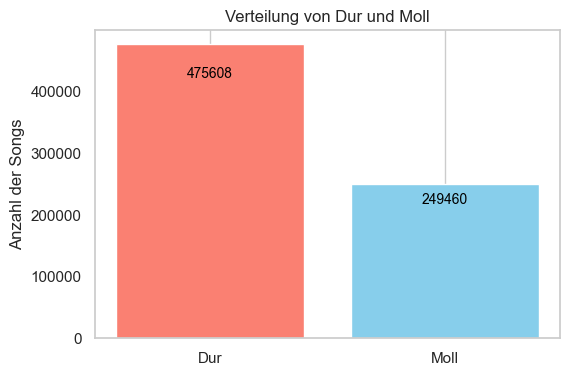

Dur: 65.59%
Moll: 34.41%


In [47]:
counts = df2['Mode'].value_counts().reindex([1, 0])  # 1=Dur, 0=Moll in dieser Reihenfolge

plt.figure(figsize=(6, 4))
bars = plt.bar(['Dur', 'Moll'], counts, color=['salmon', 'skyblue'])
plt.title('Verteilung von Dur und Moll')
plt.ylabel('Anzahl der Songs')
#plt.ylim(0, 8000)
plt.grid(axis='y')

for bar in bars:
    h = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width()/2, h-h*0.1, f'{h}', ha='center', va='center', color='black', fontsize=10)

plt.show()

for name, count in zip(["Dur","Moll"], counts/df2.shape[0]*100):
    print(f"{name}: {count:.2f}%")

Auch in DF2 sind deutlich mehr Stücke in Dur- als Moll. Hier ist jedoch der Anteil der Moll-Stücke etwas höher. 

DF1: Moll: 30.14%<br>
DF2: Moll: 34.41%

## 4.3 Verteilung der Tonarten

In [48]:
# Zähle die Anzahl der Songs für jede Tonart
key_counts = df1['Key'].value_counts().sort_index()

# Erstelle DataFrame
df_plot = pd.DataFrame({
    'Tonart': key_counts.index,
    'Anzahl der Songs': key_counts.values
})

# Definiere die Zuordnung von Zahlen zu Tonarten
key_mapping = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'H'}
df_plot['Tonart'] = df_plot['Tonart'].map(key_mapping)

# Erstelle das Balkendiagramm mit Plotly
fig = px.bar(df_plot, x='Tonart', y='Anzahl der Songs',
             title='Verteilung der Tonarten (Keys) in DF1',
             labels={'Tonart': 'Tonart', 'Anzahl der Songs': 'Anzahl der Songs'},
             text='Anzahl der Songs',
             color='Tonart',  # Färbe die Balken nach Tonart
             color_discrete_sequence=px.colors.qualitative.Set2)  # Verwende eine kategorische Farbpalette

# Füge Mouseover-Informationen hinzu
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Setze die y-Achse auf einen Maximalwert von 1500
fig.update_layout(yaxis=dict(range=[0, 1500]), 
                  width=1200, height=400)
fig.update_layout(showlegend=False)

# Diagramm anzeigen
fig.show()


#####
#DF2
####

# Zähle die Anzahl der Songs für jede Tonart
key_counts = df2['Key'].value_counts().sort_index()

# Erstelle DataFrame
df_plot = pd.DataFrame({
    'Tonart': key_counts.index,
    'Anzahl der Songs': key_counts.values
})

# Definiere die Zuordnung von Zahlen zu Tonarten
key_mapping = {0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F', 6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'H'}
df_plot['Tonart'] = df_plot['Tonart'].map(key_mapping)

# Erstelle das Balkendiagramm mit Plotly
fig = px.bar(df_plot, x='Tonart', y='Anzahl der Songs',
             title='Verteilung der Tonarten (Keys) in DF2',
             labels={'Tonart': 'Tonart', 'Anzahl der Songs': 'Anzahl der Songs'},
             text='Anzahl der Songs',
             color='Tonart',  # Färbe die Balken nach Tonart
             color_discrete_sequence=px.colors.qualitative.Set2)  # Verwende eine kategorische Farbpalette

# Füge Mouseover-Informationen hinzu
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Setze die y-Achse auf einen Maximalwert von 1500
fig.update_layout(yaxis=dict(range=[0, 100000]), 
                  width=1200, height=400)
fig.update_layout(showlegend=False)

# Diagramm anzeigen
fig.show()

Die Verteilung der Tonarten zwischen DF1 und DF2 ist grundsätzlich ähnlich. <br>
Die am meisten vorkommenden Tonarten sind bei beiden C, G, D, und A. 

Die Verteilung ist etwas anders, in DF2 ist G die häufigste Tonart (mit 86301 Songs), gefolgt von C und dann D und A fast gleich auf. D ist hier deutlich stärker als in DF1.
Ähnlich stark sind C# und D# und F#, G# und A#, die ungefähr gleichauf sind. 

E und F tauschen die Positionen in DF2.

Insgesamt keine allzustarken Unterschiede, am stärksten fällt auf, dass G und D in DF2 deutlich stärker sind, als in DF1.

## 4.4 Verteilung von Dur und Moll in den Tonarten

In [49]:
####################################################################
#DF1
####################################################################

# Erstelle einen neuen DataFrame mit den benötigten Spalten
df_temp = df1[['Key', 'Mode']].copy()

# Zähle die Anzahl der Songs für jede Tonart und den Modus (Dur/Moll)
key_mode_counts = df_temp.groupby(['Key', 'Mode']).size().reset_index(name='Count')

# Umbenennen der Key-Werte
key_mode_counts['Key'] = key_mode_counts['Key'].map({
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 
    4: 'E', 5: 'F', 6: 'F#', 7: 'G', 
    8: 'G#', 9: 'A', 10: 'A#', 11: 'H'
})

# Umbenennen der Modus-Werte
key_mode_counts['Mode'] = key_mode_counts['Mode'].map({0: 'Moll', 1: 'Dur'})  # Umbenennen der Modus-Werte

# Berechne die Gesamtanzahl der Songs pro Tonart
total_counts = key_mode_counts.groupby('Key')['Count'].transform('sum')
key_mode_counts['Percentage'] = (key_mode_counts['Count'] / total_counts) * 100

# Erstelle Plotly-Balkendiagramm
fig = px.bar(key_mode_counts, 
             x='Key', 
             y='Count', 
             color='Mode', 
             text='Percentage',
             labels={'Count': 'Anzahl der Songs', 'Key': 'Tonart'},
             title='Verteilung der Tonarten (Keys) in Dur und Moll in DF1',
             hover_data={'Percentage': ':.2f'},
             color_discrete_map={'Dur': 'salmon', 'Moll': 'skyblue'})  # Benutzerdefinierte Farben

# Layout anpassen
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(barmode='stack', xaxis_title='Tonart', yaxis_title='Anzahl der Songs',
                  yaxis=dict(range=[0, 1500]),
                 width=1200, height=400)  # Setze den Bereich der Y-Achse

# Diagramm anzeigen
fig.show()

# Lösche den temporären DataFrame
del df_temp


####################################################################
#DF2
####################################################################

# DataFrame für Tonarten
df2_temp = df2[['Key', 'Mode']].copy()

# Zähle die Anzahl der Songs für jede Tonart und deren Modus (Dur/Moll)
df2_key_mode_counts = df2_temp.groupby(['Key', 'Mode']).size().reset_index(name='Count')

# Umbenennen der Keys
df2_key_mode_counts['Key'] = df2_key_mode_counts['Key'].map({
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 
    4: 'E', 5: 'F', 6: 'F#', 7: 'G', 
    8: 'G#', 9: 'A', 10: 'A#', 11: 'H'
})

# Umbenennen von Modus Dur/Moll
df2_key_mode_counts['Mode'] = df2_key_mode_counts['Mode'].map({0: 'Moll', 1: 'Dur'})  # Umbenennen der Modus-Werte

# Gesamtzahl der Songs pro Tonart
df2_total_counts = df2_key_mode_counts.groupby('Key')['Count'].transform('sum')

# Prozentuelle Verteilung
df2_key_mode_counts['Percentage'] = (df2_key_mode_counts['Count'] / df2_total_counts) * 100
df2_prozent = (df2_key_mode_counts['Count'] / df2_total_counts) * 100

# Erstelle den Plotly-Balkendiagramm mit benutzerdefinierten Farben
fig = px.bar(df2_key_mode_counts, 
             x='Key', 
             y='Count', 
             color='Mode', 
             text='Percentage',
             labels={'Count': 'Anzahl der Songs', 'Key': 'Tonart'},
             title='Verteilung der Tonarten (Keys) in Dur und Moll in DF2',
             hover_data={'Percentage': ':.2f'},
             color_discrete_map={'Dur': 'salmon', 'Moll': 'skyblue'})  # Benutzerdefinierte Farben

# Anpassungen für das Layout
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(barmode='stack', xaxis_title='Tonart', yaxis_title='Anzahl der Songs',
                  yaxis=dict(range=[0, 100000]),
                 width=1200, height=400)  # Setze den Bereich der Y-Achse

# Diagramm anzeigen
fig.show()

# Lösche den temporären DataFrame
del df2_temp

Auch in der Dur-Moll-Verteilung gibt es zwischen den beiden Datensätzen keine extremen Unterschiede. 

Insgesamt ist Moll auf beinahe allen Tonarten (außer c#) in DF2 stärker vertreten. Besonders e-Moll und a#-Moll sind etwa 10% stärker vertreten und erreichen in DF2 knapp die Hälfte aller Songs in ihrer Tonart.
Auch d-Moll, d#-Moll und a-Moll, f-Moll sind in DF2 deutlich stärker als in DF1.

h scheint grundsätzlich eher als Moll- denn als Dur-Tonart vorzukommen. Dass h-Moll die Paralleltonart von D-Dur ist und damit auch in typischen Akkordentwicklungen im Zusammenhang mit C und G vorkommt, spielt hier sicher eine Rolle.

Man kann also festhalten, dass bei den Hits Dur stärker vertreten ist. 

## 4.5 Top Artists

Aus Interesse und für die Übersicht - hier die häufigsten Künstler mit ihren Songs. Es fällt auf, dass die beiden Listen sich nur wenig überschneiden, was aber nicht wirklich viel aussagt. 

In DF1 sind ja nur die Hits auch der bekannteren Künstler vertreten, in DF2 hingegen einfach sehr viele Songs gesammelt, Künstler mit hohem Output haben dann auch mehr vertretene Songs. 

In [50]:
def top50_with_rank(s):
    top = s.str.strip().value_counts().head(50).reset_index()
    top.columns = ['artist', ' count']
    top.insert(0, 'rank', range(1, len(top) + 1))
    return top

a = top50_with_rank(df1['Artist Name(s)'])
b = top50_with_rank(df2['artists_normalized'])

side_by_side = a.merge(b, on='rank', how='outer', suffixes=(' df1',' df2'))

print(side_by_side.to_string(index=False))

 rank            artist df1   count df1             artist df2   count df2
    1         Elvis Presley          41        various artists        3217
    2           The Beatles          38          elvis presley         580
    3                  P!nk          37              bob dylan         518
    4          Taylor Swift          37           dolly parton         473
    5            Ed Sheeran          34          willie nelson         470
    6               Madonna          34       guided by voices         459
    7    The Rolling Stones          32        aretha franklin         429
    8         Kylie Minogue          28            vybz kartel         428
    9            Elton John          27                                406
   10              Bee Gees          26            johnny cash         389
   11                    U2          25                 prince         356
   12            Katy Perry          24              glee cast         355
   13        Britney Spea

## 4.6 Statistische Berechnung der Unterschiede

Da die Daten nicht normalverteilt sind, nutzen ich den Mann-Whitney U-Test, um die Mediane zu vergleichen, zusätzlich messe ich die Effektgröße.

In [51]:
# zu untersuchende Spalten
features = ['Danceability','Energy','Loudness','Speechiness','Acousticness',
            'Instrumentalness','Liveness','Valence','Tempo','Track Duration (ms)']

results = []
# Pro Spalte Berechnungen durchführen
for col in features:
    a = df1[col].dropna()
    b = df2[col].dropna()
    u_stat, p_value = stats.mannwhitneyu(a, b, alternative='two-sided')
    n1, n2 = len(a), len(b)
    N = n1 + n2
    z = (u_stat - (n1 * n2 / 2)) / np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)
    r = z / np.sqrt(N)
    mean_diff = a.mean() - b.mean()
    median_diff = a.median() - b.median()
    results.append({'Column': col, 'U-statistic': u_stat, 'p-value': p_value, 'Effect Size (r)': r, 'mean_diff': mean_diff, 'median_diff': median_diff})

results_df = pd.DataFrame(results)
results_df

Column   U-statistic        p-value  Effect Size (r)  \
0         Danceability  3.825083e+09  1.719445e-201         0.035352   
1               Energy  3.279192e+09   5.160533e-03         0.003265   
2             Loudness  3.361470e+09   3.916042e-12         0.008101   
3          Speechiness  2.776615e+09  3.182883e-112        -0.026277   
4         Acousticness  3.125436e+09   7.577407e-07        -0.005773   
5     Instrumentalness  2.752630e+09  6.166318e-129        -0.027687   
6             Liveness  2.950543e+09   4.869195e-43        -0.016053   
7              Valence  3.964476e+09  1.305076e-304         0.043546   
8                Tempo  3.179714e+09   2.692460e-02        -0.002583   
9  Track Duration (ms)  3.158129e+09   9.682738e-04        -0.003851   

     mean_diff  median_diff  
0     0.054746     0.057000  
1     0.019065     0.013000  
2     0.317087     0.296000  
3    -0.022361    -0.006400  
4    -0.056616    -0.029500  
5    -0.052800    -0.000033  
6    -0.027108    -0.008000  
7     0.101302     0.124000  
8    -0.965835     0.104000  
9 -8273.377617 -1294.000000

U-Werte: Höhere Werte = größere Unterschiede zwischen den Gruppen
p-Werte: sind alle sehr niedrig, die Unterschiede zwischen den Gruppen sind statistisch relevant<br>
Die Ergebnisse deuten darauf hin, dass es signifikante Unterschiede in der Verteilung der Werte zwischen df1 und df2 in allen getesteten Spalten gibt. 

Die Unterschiede in den Datensätzen sind signifikant, aber sehr gering. Die Daten unterscheiden sich also nur sehr wenig voneinander. Im Mittelwert noch ein wenig stärker, als im Median.

Die Hits sind tendenziell etwas tanzbarer, haben mehr Energie, sind lauter und fröhlicher. Diese Songs sind etwas schneller (nach Median, nach Mittelwert etwas langsamer) und etwas kürzer als die große Vergleichsmenge. <br>
Dafür haben die Hits etwas weniger Sprachanteil, sind weniger "akustisch", also mit klassischen, unveränderten Instrumenten gespielt, haben weniger rein instrumentelle Teile und der Anteil der Live-Songs ist geringer.

## 4.7 Übersicht: Vergleich der Spotify-Features zwischen DF1 und DF2

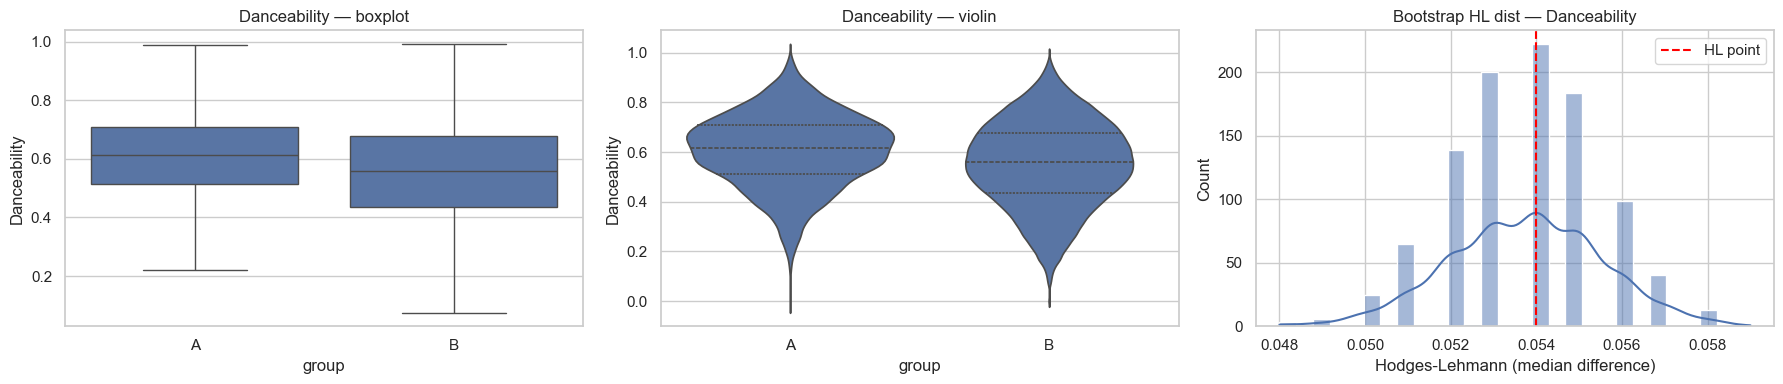

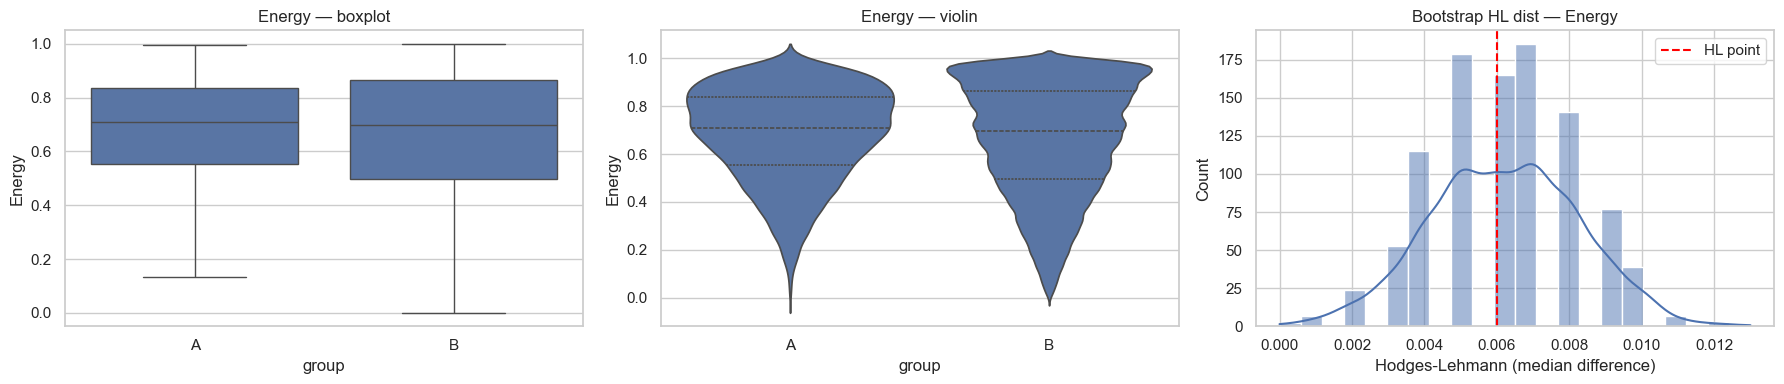

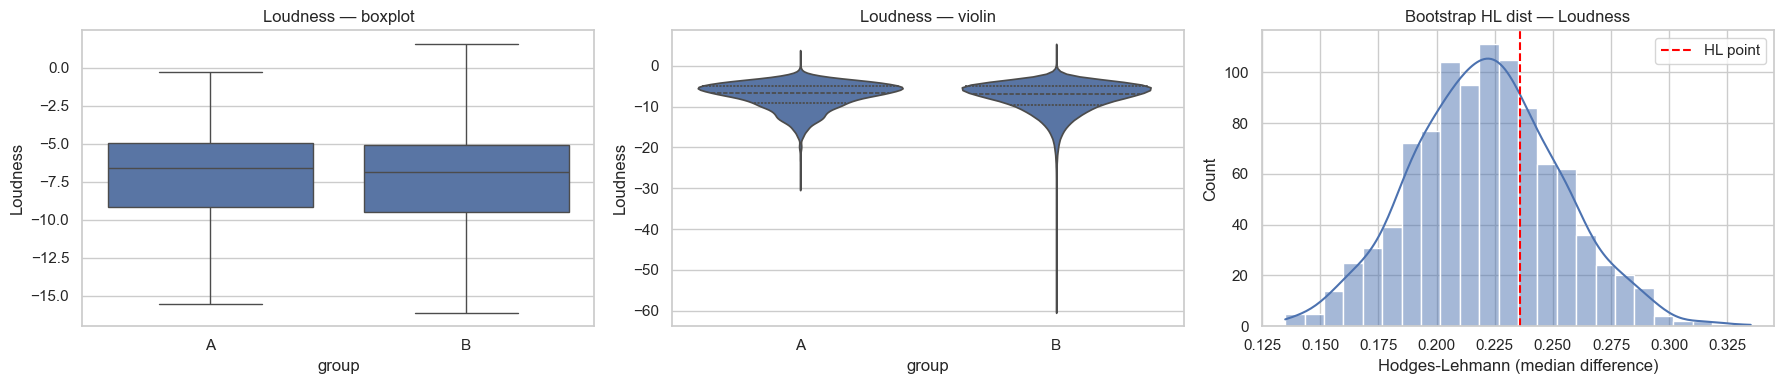

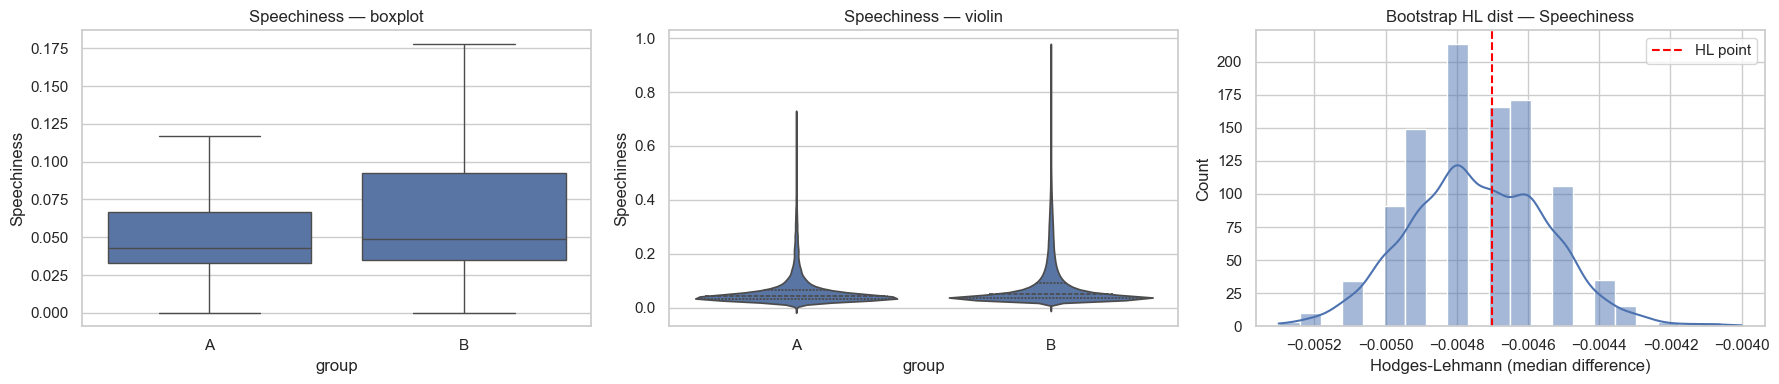

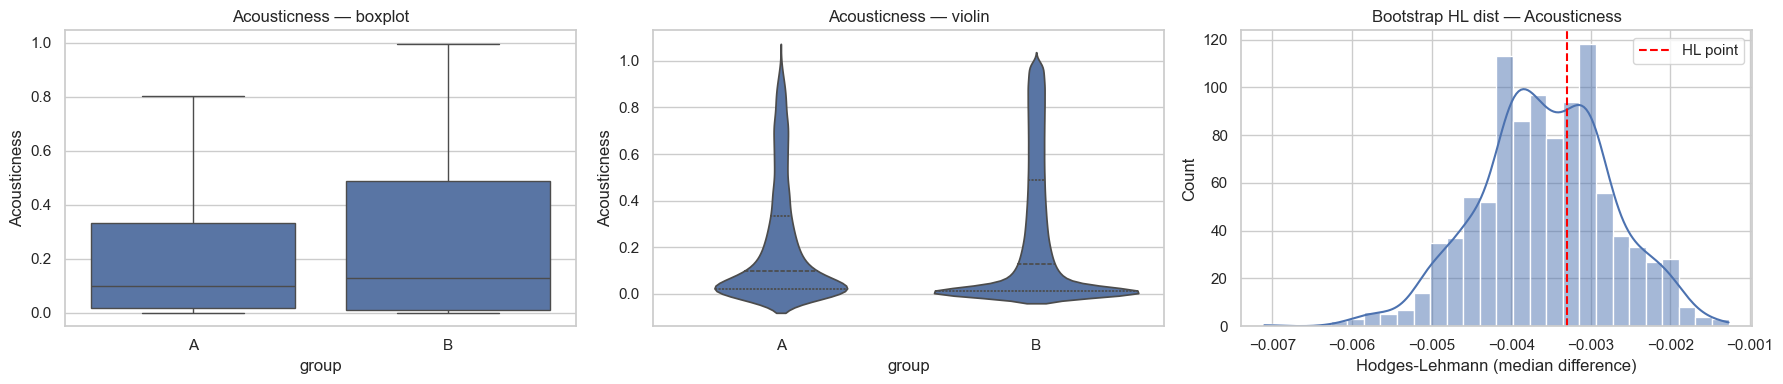

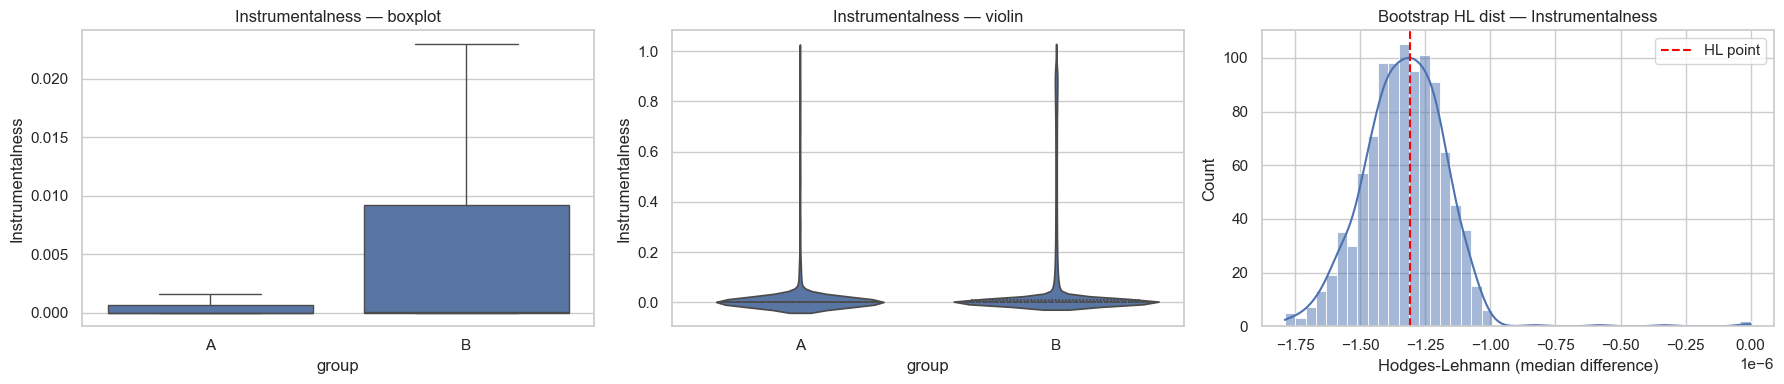

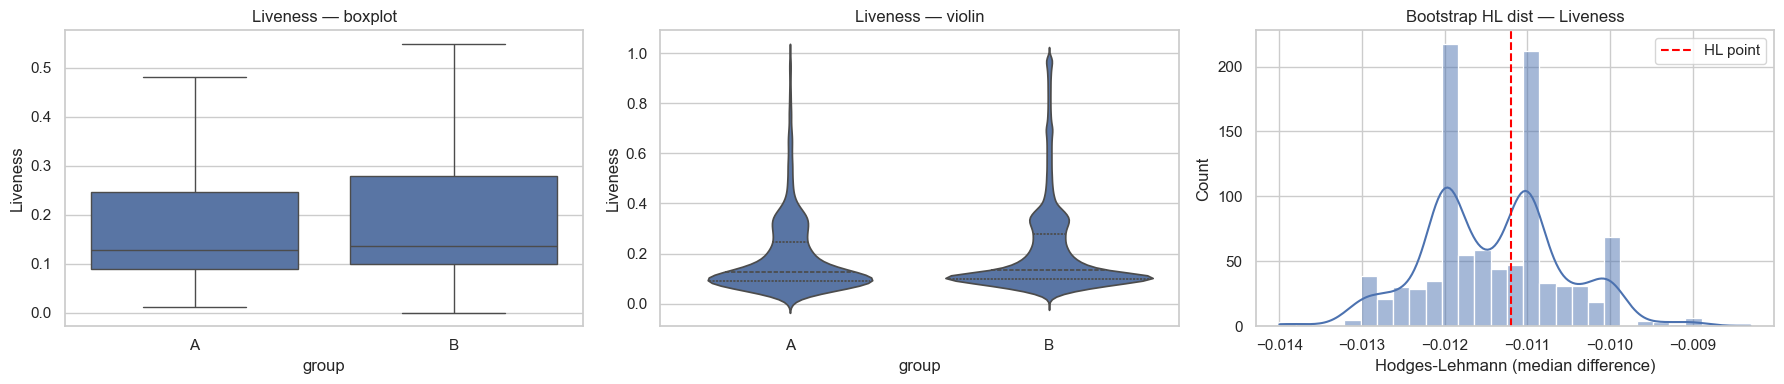

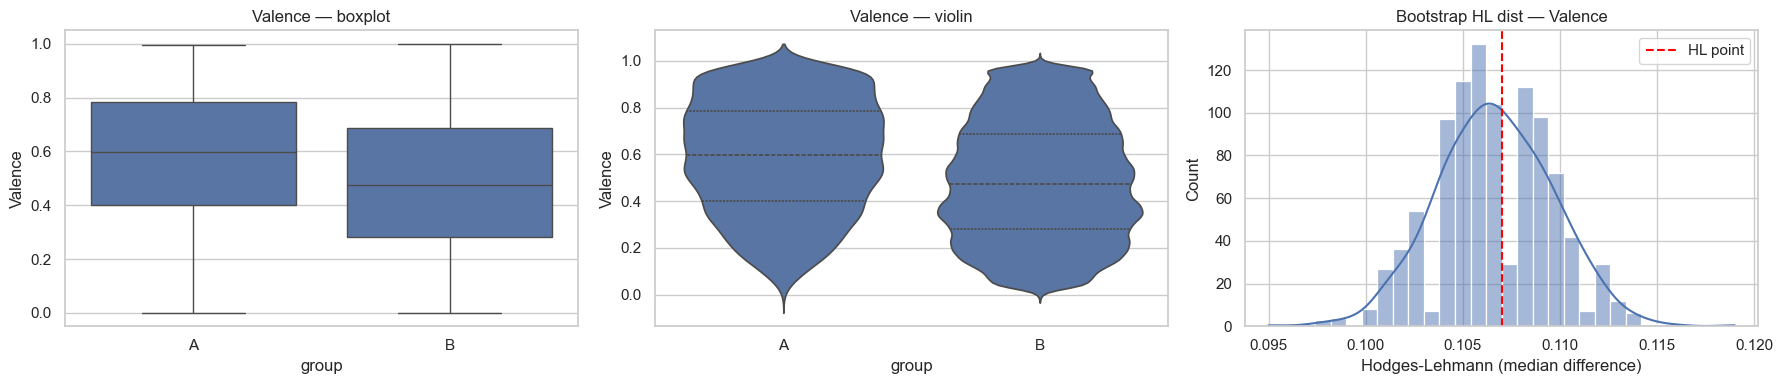

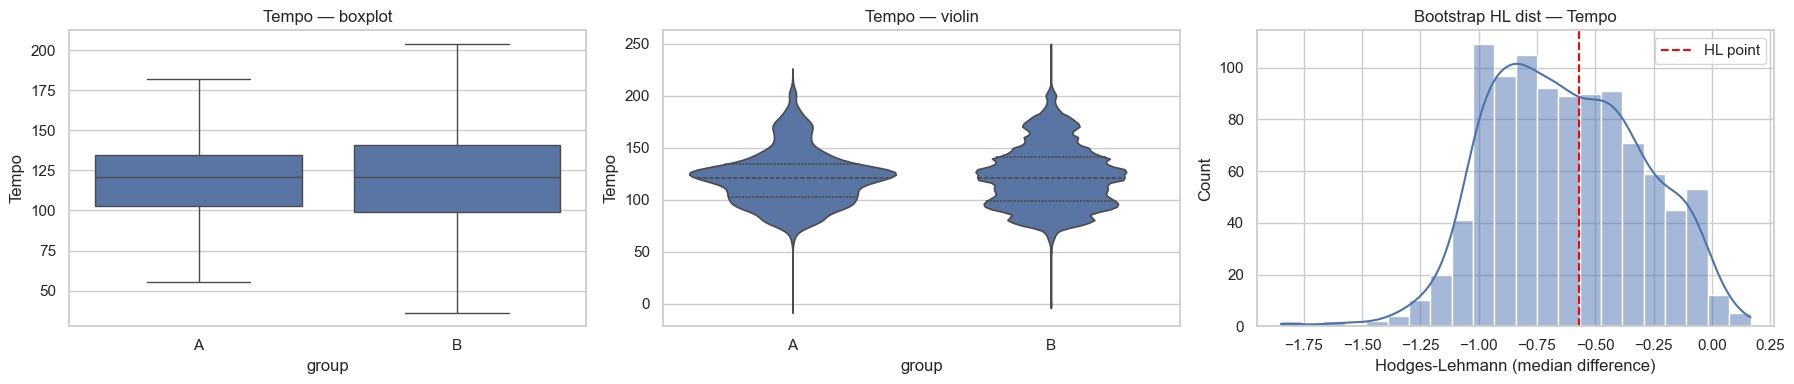

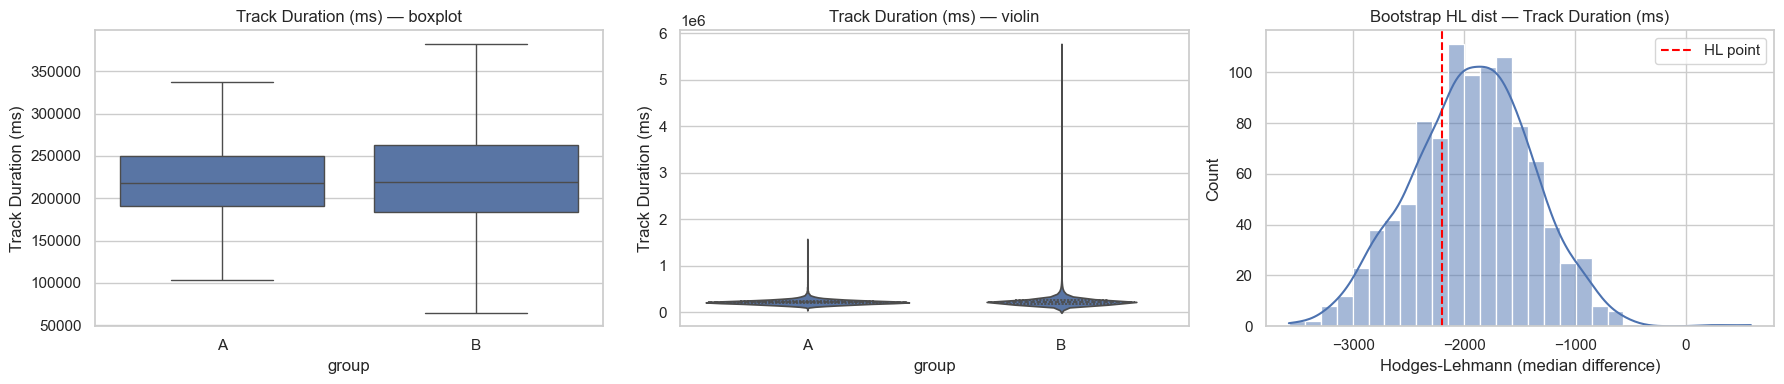

In [53]:
from statsmodels.stats.multitest import multipletests

# --- CONFIG: setze df1, df2 und Spaltenliste ---
# Beispiel: df1 = pd.read_csv('df1.csv'); df2 = pd.read_csv('df2.csv')
columns_to_test = [
    'Danceability',
    'Energy',
    'Loudness',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence',
    'Tempo',
    'Track Duration (ms)'
]

# label1/label2: Beschriftung für Plots
# ----------------------------------------------------------------

def hl_mc(a, b, n_samples=200000, random_state=None):
    rng = np.random.default_rng(random_state)
    n = len(a); m = len(b)
    if n * m <= n_samples:
        diffs = np.subtract.outer(a, b).ravel()
        return np.median(diffs)
    k = n_samples
    ia = rng.integers(0, n, size=k)
    ib = rng.integers(0, m, size=k)
    diffs = a[ia] - b[ib]
    return np.median(diffs)

def cliffs_delta_efficient(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    a_sort = np.sort(a)
    b_sort = np.sort(b)
    n = a_sort.size; m = b_sort.size
    idx_left = np.searchsorted(b_sort, a_sort, side='left')
    idx_right = np.searchsorted(b_sort, a_sort, side='right')
    eq_counts = (idx_right - idx_left).sum()
    gt_counts = idx_left.sum()
    p_gt = gt_counts / (n * m)
    p_lt = (n * m - gt_counts - eq_counts) / (n * m)
    delta = p_gt - p_lt
    return delta

def bootstrap_hl_ci(a, b, n_boot=1000, mc_samples=200000, ci=0.95, random_state=None):
    rng = np.random.default_rng(random_state)
    n = len(a); m = len(b)
    boots = np.empty(n_boot)
    for i in range(n_boot):
        sa = rng.choice(a, n, replace=True)
        sb = rng.choice(b, m, replace=True)
        boots[i] = hl_mc(sa, sb, n_samples=mc_samples, random_state=rng)
    lo = np.percentile(boots, (1-ci)/2*100)
    hi = np.percentile(boots, (1+(ci))/2*100)
    return np.mean(boots), (lo, hi), boots  # return boots for plotting

def bootstrap_cd_ci(a, b, n_boot=1000, ci=0.95, random_state=None):
    rng = np.random.default_rng(random_state)
    n = len(a); m = len(b)
    boots = np.empty(n_boot)
    for i in range(n_boot):
        sa = rng.choice(a, n, replace=True)
        sb = rng.choice(b, m, replace=True)
        boots[i] = cliffs_delta_efficient(sa, sb)
    lo = np.percentile(boots, (1-ci)/2*100)
    hi = np.percentile(boots, (1+(ci))/2*100)
    return np.mean(boots), (lo, hi)

def cliffs_interpretation(d):
    d = abs(d)
    if d < 0.147: return 'negligible'
    if d < 0.33: return 'small'
    if d < 0.474: return 'medium'
    return 'large'

def compare_medians_df1_df2(df1, df2, columns, label1='df1', label2='df2',
                            n_boot=1000, hl_mc_samples=200000, alpha=0.05,
                            plot=True):
    results = []
    for col in columns:
        a = df1[col].dropna().to_numpy()
        b = df2[col].dropna().to_numpy()
        if a.size == 0 or b.size == 0:
            results.append({'Column': col, 'error': 'empty group'})
            continue

        med1 = np.median(a); med2 = np.median(b)
        iqr1 = np.percentile(a, [25,75])
        iqr2 = np.percentile(b, [25,75])

        try:
            u_res = stats.mannwhitneyu(a, b, alternative='two-sided')
            U = int(u_res.statistic)
            p = float(u_res.pvalue)
        except MemoryError:
            U = None
            p = None

        hl = hl_mc(a, b, n_samples=min(hl_mc_samples, a.size * b.size), random_state=0)
        hl_mean, hl_ci, hl_boots = bootstrap_hl_ci(a, b, n_boot=n_boot, mc_samples=hl_mc_samples, random_state=1)

        cd = cliffs_delta_efficient(a, b)
        cd_mean, cd_ci = bootstrap_cd_ci(a, b, n_boot=n_boot, random_state=2)

        results.append({
            'Column': col,
            'n1': int(a.size), 'n2': int(b.size),
            'median1': float(med1), 'median2': float(med2),
            'IQR1': (float(iqr1[0]), float(iqr1[1])),
            'IQR2': (float(iqr2[0]), float(iqr2[1])),
            'U_statistic': U, 'p_value': p,
            'hodges_lehmann': float(hl),
            'HL_boot_mean': float(hl_mean),
            'HL_CI': (float(hl_ci[0]), float(hl_ci[1])),
            'cliffs_delta': float(cd),
            'CD_boot_mean': float(cd_mean),
            'CD_CI': (float(cd_ci[0]), float(cd_ci[1])),
            'CD_interpretation': cliffs_interpretation(cd)
        })

        if plot:
            plot_df = pd.concat([
                pd.DataFrame({col: a, 'group': label1}),
                pd.DataFrame({col: b, 'group': label2})
            ], ignore_index=True)

            fig, axes = plt.subplots(1, 3, figsize=(18, 4))
            # boxplot
            sns.boxplot(x='group', y=col, data=plot_df, showfliers=False, ax=axes[0])
            axes[0].set_title(f'{col} — boxplot')
            # violin
            sns.violinplot(x='group', y=col, data=plot_df, inner='quartile', ax=axes[1])
            axes[1].set_title(f'{col} — violin')
            # bootstrap HL histogram
            sns.histplot(hl_boots, kde=True, ax=axes[2])
            axes[2].axvline(x=hl, color='red', linestyle='--', label='HL point')
            axes[2].set_title(f'Bootstrap HL dist — {col}')
            axes[2].set_xlabel('Hodges-Lehmann (median difference)')
            axes[2].legend()
            plt.tight_layout()
            plt.show()

    pvals = [r['p_value'] for r in results if r.get('p_value') is not None]
    if len(pvals) > 0:
        _, p_adj, _, _ = multipletests(pvals, alpha=alpha, method='fdr_bh')
        idx = 0
        for r in results:
            if r.get('p_value') is not None:
                r['p_value_adj'] = float(p_adj[idx])
                idx += 1

    return pd.DataFrame(results)

# --- Beispielaufruf ---
results_df = compare_medians_df1_df2(df1, df2, columns_to_test, label1='A', label2='B',
                                     n_boot=1000, hl_mc_samples=200000, plot=True)
# results_df.to_csv('median_compare_results.csv', index=False)


Die Übersichtsplots zeigen noch mal, dass es trotz ähnlicher Median und Mittelwerte kleine Abweichungen gibt: 

In den Boxplots sieht man, dass die Quartile der Hits enger beeinander liegen und meist stärker in eine Richtung ausgedehnt oder verschoben sind - zum Beispiel sind Acousticness und Speechiness nach oben deutlich begrenzter, als bei der Vergleichsmenge. Danceability ist insgesamt etwas nach oben verschoben. Instrumentalness ist fast komplett bei 0.0, während sich die Box der Vergleichsmenge etwas weiter ausdehnt.

Die Violinenplots zeigen, dass die Verteilung, und damit die Form, grundsätzlich ähnlich ist. Die Werte der Hits sind jedoch stärker innerhalb der Quartile verteilt sind, was zu einer breiteren, bauchigeren und nach unten und oben abgegrenzteren Form der Violine führt. 

Der Hodges-Lehmann-Schätzer zeigt den mittleren Unterschied zwischen den Medianen. Hieraus kann man ablesen, dass die Hits etwas fröhlicher, tanzbarer und lauter sind. Unter ihnen sind weniger Live-Songs vertreten, das Tempo ist etwas niedriger und die Dauer etwas kürzer.

Energy, Speechiness, Acousticness und Instrumentalness sind in einem sehr kleinen Unterschiedsbereich, so dass wir sie ignorieren können.

## Fazit

Es gibt statistisch relevante Unterschiede zwischen df1 und df2, aber sie sind nur sehr klein. 

Man kann festhalten, dass die Stimmung (Valence) bei df1 positiver ist, Danceability, Loudness und Energy sind etwas stärker.
Dafür sind Speechiness, Acousticness, Instrumentalness und Liveness weniger stark. 
Die Songlänge (Track Duration) und das Tempo sind ebenfalls ein wenig niedriger, allerdings auch hier in einem Bereich, der kaum einen Unterschied macht.
Außerdem ist bei den Hits Dur ein bisschen stärker vertreten (vor Allem C-Dur) und es gibt leichte Unterschiede in der Verteilung der Tonarten. Aber auch hier handelt es sich um nur kleine Unterschiede in einem einstelligen Prozentbereich.

Die Unterschiede zwischen den Datensätzen sind nicht sehr stark, somit lassen sich kaum Regeln ableiten, wie man einen Hit anhand der Spotify-Attribute erkennt. 

Aus dem Datensatz DF1 konnte ich einige interessante Informationen herauslesen - über die Entwicklung der 
Die Erkenntnis aus dem Vergleich der